# Food Demand Prediction Case Study
## The following analysis is focused on implementing a demand predictor. We are using a free dataset from Kaggle containing the data from a company having multiple centers (restaurants), where each center sells a variety of different meals.
## The dataset contains entries specifying the number of orders sold by each center for each individual meal, and for every week since the business started, beginning with week 1 and going up to week 145.
## The main flow of each machine learning project can be simplified to the following:
1. Frame the problem and look at the big picture.
2. Get the data.
3. Explore the data to gain insights.
4. Prepare the data to better expose the underlying data patterns to Machine Learning algorithms.
5. Explore many different models and short-list the best ones.
6. Fine-tune your models and combine them into a great solution.
7. Present your solution.
8. Launch, monitor, and maintain your system.

# Loading the data

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from sklearn.metrics import mean_squared_error

FOLDER_PATH = path = os.path.join("datasets", "food_demand")


def load_data(filename):
    file_path = os.path.join(FOLDER_PATH, filename)
    return pd.read_csv(file_path)

In [150]:
center_info = load_data("fulfilment_center_info.csv")
meal_info = load_data("meal_info.csv")
data = load_data("train.csv")

# First look over the data

In [151]:
center_info

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6
...,...,...,...,...,...
72,53,590,56,TYPE_A,3.8
73,30,604,56,TYPE_A,3.5
74,76,614,85,TYPE_A,3.0
75,68,676,34,TYPE_B,4.1


In [152]:
meal_info

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian
5,1311,Extras,Thai
6,1062,Beverages,Italian
7,1778,Beverages,Italian
8,1803,Extras,Thai
9,1198,Extras,Thai


In [153]:
data

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40
...,...,...,...,...,...,...,...,...,...
456543,1271326,145,61,1543,484.09,484.09,0,0,68
456544,1062036,145,61,2304,482.09,482.09,0,0,42
456545,1110849,145,61,2664,237.68,321.07,0,0,501
456546,1147725,145,61,2569,243.50,313.34,0,0,729


# Checking for null values

In [154]:
center_info.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   center_id    77 non-null     int64  
 1   city_code    77 non-null     int64  
 2   region_code  77 non-null     int64  
 3   center_type  77 non-null     object 
 4   op_area      77 non-null     float64
dtypes: float64(1), int64(3), object(1)
memory usage: 3.1+ KB


In [155]:
meal_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   meal_id   51 non-null     int64 
 1   category  51 non-null     object
 2   cuisine   51 non-null     object
dtypes: int64(1), object(2)
memory usage: 1.3+ KB


In [156]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456548 entries, 0 to 456547
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 31.3 MB


There do not seem to be null values in the dataset.

# Check if every meal and center in the dataset have entries

In [157]:
data["center_id"].value_counts()


center_id
13     7046
10     7015
52     6993
43     6970
67     6915
       ... 
139    4627
57     4501
162    4366
41     4083
91     3432
Name: count, Length: 77, dtype: int64

In [158]:
data['center_id'].isin(center_info['center_id']).value_counts()

center_id
True    456548
Name: count, dtype: int64

All center ids in the data set exist

In [159]:
data['meal_id'].isin(meal_info['meal_id']).value_counts()


meal_id
True    456548
Name: count, dtype: int64

All meal ids in the dataset exist

# Splitting data set into train/test sets

Normally, we'd want to split the data randomly and balanced. As such:

In [160]:
# from sklearn.model_selection import train_test_split

# train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)

However, in our situation, we're working with a data set that has information for each week and the final purpose is to use information from previous weeks to predict the demand for future weeks. As such, the split above is not correct as it will result in gaps of info in the training set and past week data in the test set. We should keep the data of the last 20% (or less) of weeks in the set as the test set. EX: We will train on weeks 1-125 and predict weeks 126-145.
We will try and keep in the test set the last 10 weeks of data.

It is worth noting that in this example we will not be splitting the data and separate a part for the testing set as there is a very small set. For the purposes of training, we do not need it. The main use of the test set is to be able to see how the trained model generalizes on new data. It is a highly important step to perform.

In our case we will be using validation sets to compare model performance on new data

In [161]:
data['week'].value_counts()

week
122    3359
105    3348
106    3347
140    3332
123    3331
       ... 
13     2838
12     2831
14     2830
7      2795
8      2786
Name: count, Length: 145, dtype: int64

C:\Users\Devy\anaconda3\envs\handson-ml2\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Devy\anaconda3\envs\handson-ml2\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Devy\anaconda3\envs\handson-ml2\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='week', ylabel='count'>

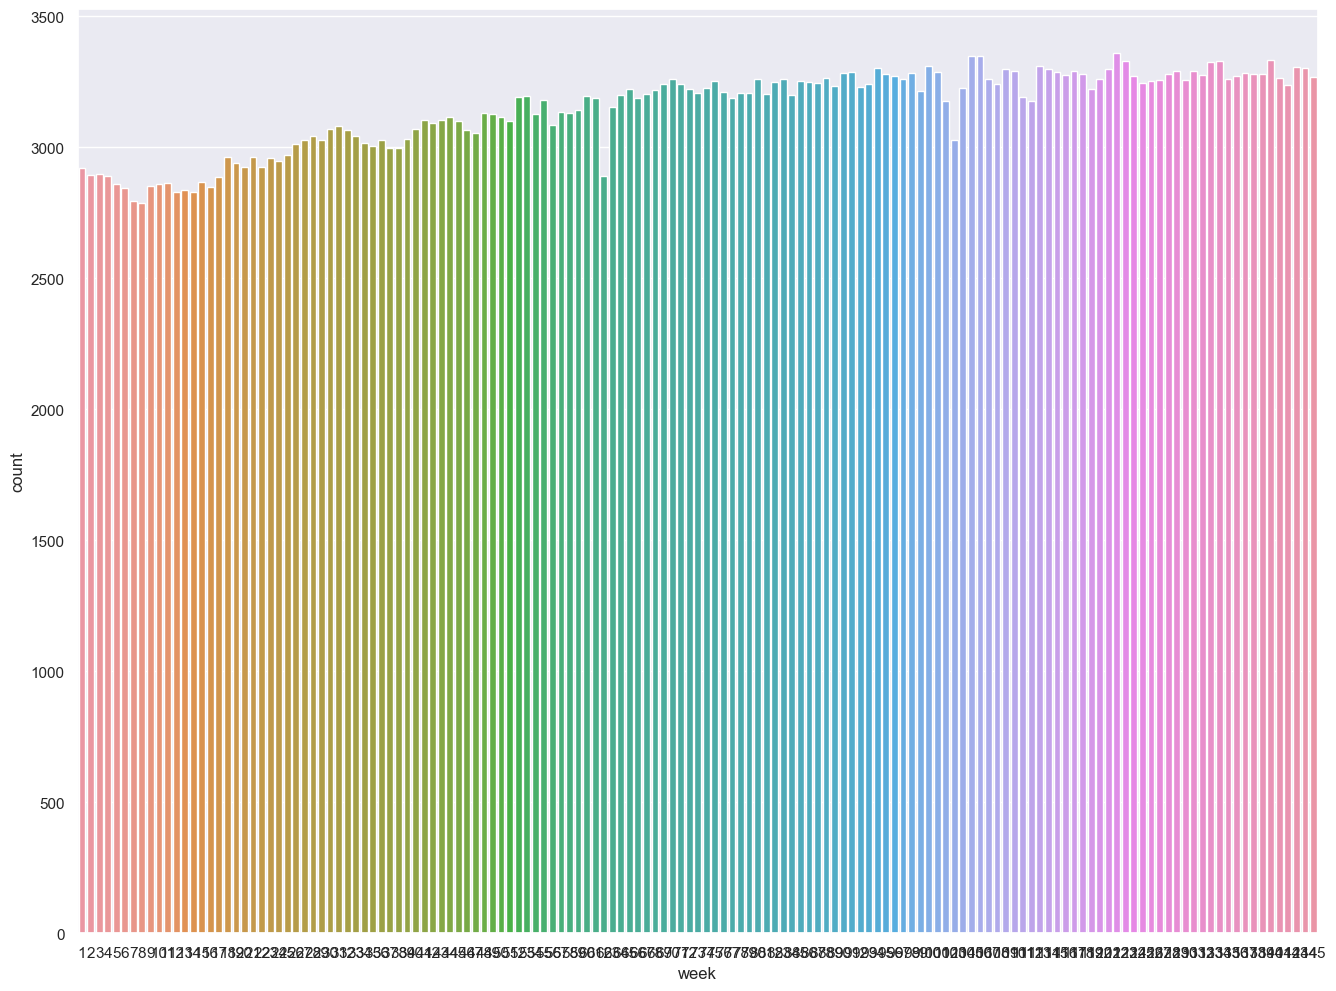

In [162]:
import seaborn as sns

sns.countplot(x="week", data=data)

Looks fine, every week has similar amounts of data.

Let's include in the test set weeks 131-145

In [163]:
train_set = data[data["week"] <= 135]
test_set = data[data["week"] > 135]

# Merging the train into one data frame by joining with the centers and meals

In [164]:
full_train_data = train_set.merge(center_info, on="center_id", how="inner")
full_train_data = full_train_data.merge(meal_info, on="meal_id", how="inner")

In [165]:
full_train_data

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai
1,1018704,2,55,1885,135.83,152.29,0,0,323,647,56,TYPE_C,2.0,Beverages,Thai
2,1196273,3,55,1885,132.92,133.92,0,0,96,647,56,TYPE_C,2.0,Beverages,Thai
3,1116527,4,55,1885,135.86,134.86,0,0,163,647,56,TYPE_C,2.0,Beverages,Thai
4,1343872,5,55,1885,146.50,147.50,0,0,215,647,56,TYPE_C,2.0,Beverages,Thai
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423722,1282954,131,61,2104,445.29,630.53,0,1,270,473,77,TYPE_A,4.5,Fish,Continental
423723,1094245,132,61,2104,435.53,630.53,0,1,339,473,77,TYPE_A,4.5,Fish,Continental
423724,1380866,133,61,2104,601.43,630.53,0,1,107,473,77,TYPE_A,4.5,Fish,Continental
423725,1111394,134,61,2104,600.43,631.53,0,1,41,473,77,TYPE_A,4.5,Fish,Continental


# Checking numerical values

In [166]:
full_train_data.describe()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,op_area
count,4.237270e+05,423727.000000,423727.000000,423727.000000,423727.000000,423727.000000,423727.000000,423727.000000,423727.000000,423727.000000,423727.000000,423727.000000
mean,1.249964e+06,69.677332,82.109469,2023.956295,331.526166,353.732761,0.083353,0.111315,264.550536,601.562478,56.609468,4.083245
std,1.443431e+05,38.686607,45.977420,547.370379,153.085823,160.919513,0.276416,0.314522,403.573030,66.206777,17.641225,1.091407
min,1.000000e+06,1.000000,10.000000,1062.000000,2.970000,55.350000,0.000000,0.000000,13.000000,456.000000,23.000000,0.900000
25%,1.124878e+06,37.000000,43.000000,1558.000000,228.010000,243.500000,0.000000,0.000000,54.000000,553.000000,34.000000,3.600000
50%,1.249955e+06,70.000000,76.000000,1971.000000,292.030000,309.490000,0.000000,0.000000,136.000000,596.000000,56.000000,4.000000
75%,1.374949e+06,103.000000,110.000000,2539.000000,444.290000,458.870000,0.000000,0.000000,324.000000,651.000000,77.000000,4.500000
max,1.499999e+06,135.000000,186.000000,2956.000000,866.270000,866.270000,1.000000,1.000000,24299.000000,713.000000,93.000000,7.000000


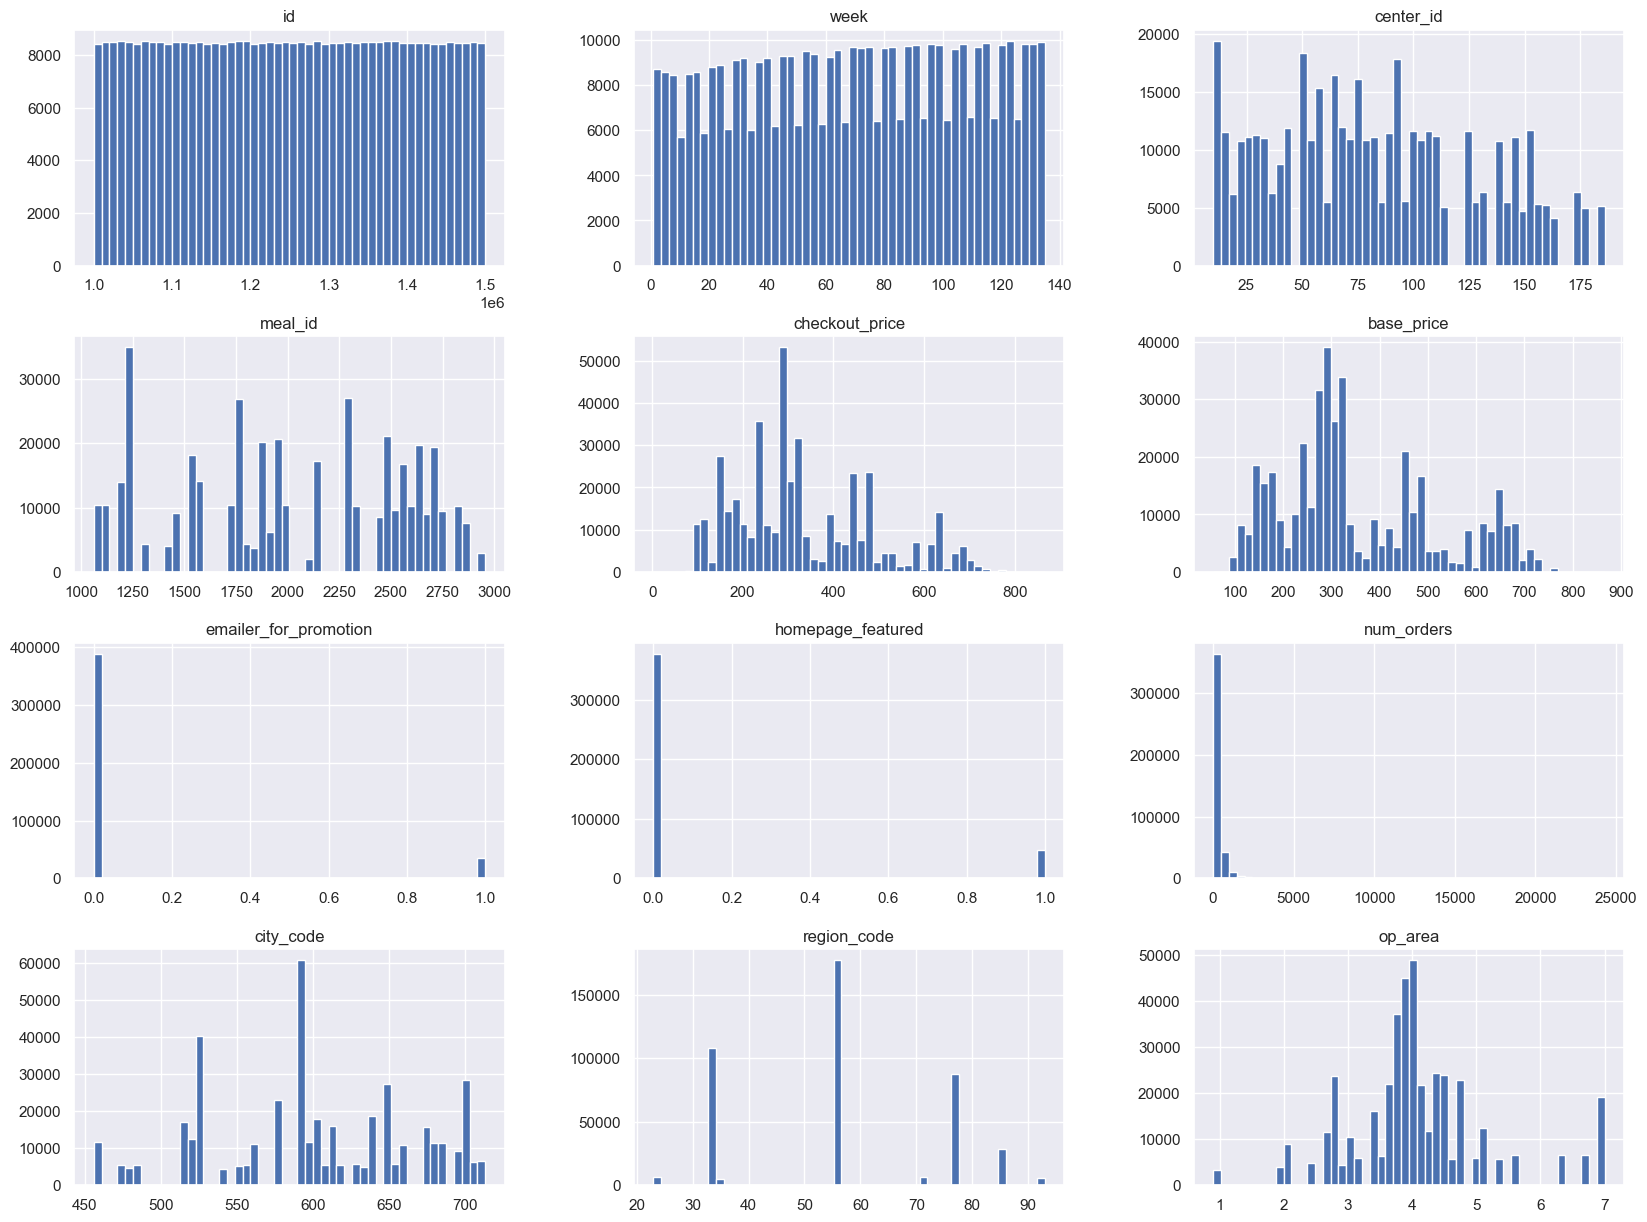

In [167]:
full_train_data.hist(bins=50, figsize=(20, 15))
plt.show()


# Check correlations with number of sales

In [168]:
correlations = full_train_data.corr(numeric_only=True)

In [169]:
correlations["num_orders"]

id                       0.000882
week                    -0.007385
center_id               -0.051274
meal_id                  0.012068
checkout_price          -0.283021
base_price              -0.221294
emailer_for_promotion    0.283221
homepage_featured        0.299080
num_orders               1.000000
city_code                0.041156
region_code              0.029848
op_area                  0.174464
Name: num_orders, dtype: float64

# Insights:
Highest positive correlations are with homepage_features and emails_for promotion.
Makes sense, if the meal is marketed either on the website or through an email, the nr of orders increases.
Op Area also makes sense. If the center covers a bigger area, the nr of orders increases.

Best negative correlations are for the base_price and the checkout_price.
Self-explanatory,  if prices are cheaper, more orders appear.

array([[<Axes: xlabel='num_orders', ylabel='num_orders'>,
        <Axes: xlabel='base_price', ylabel='num_orders'>,
        <Axes: xlabel='checkout_price', ylabel='num_orders'>],
       [<Axes: xlabel='num_orders', ylabel='base_price'>,
        <Axes: xlabel='base_price', ylabel='base_price'>,
        <Axes: xlabel='checkout_price', ylabel='base_price'>],
       [<Axes: xlabel='num_orders', ylabel='checkout_price'>,
        <Axes: xlabel='base_price', ylabel='checkout_price'>,
        <Axes: xlabel='checkout_price', ylabel='checkout_price'>]],
      dtype=object)

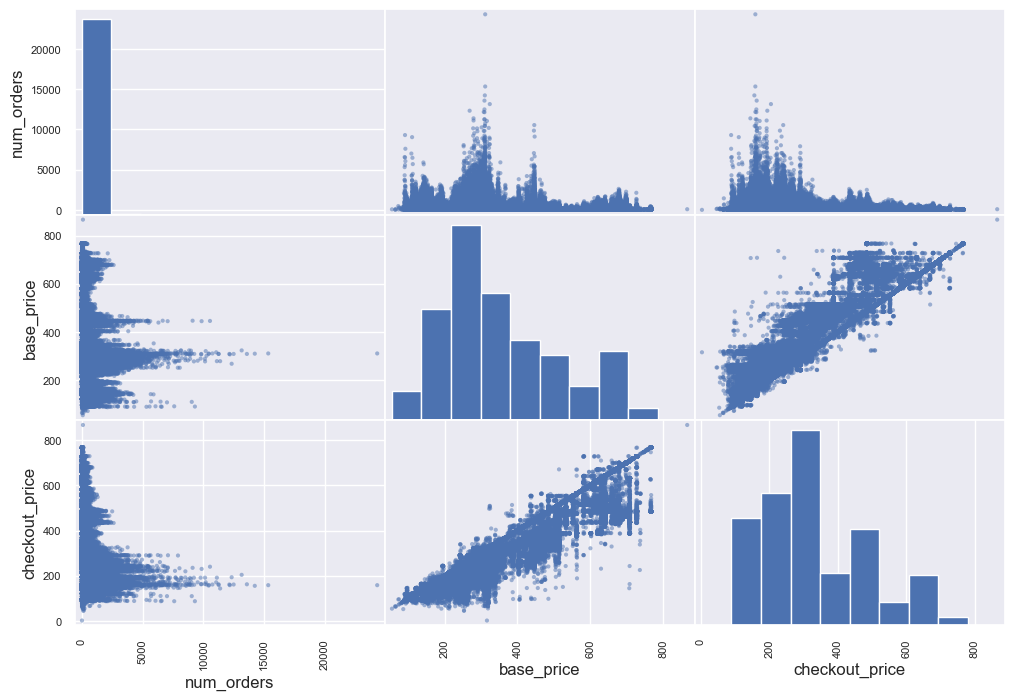

In [170]:
from pandas.plotting import scatter_matrix

attributes = ["num_orders", "base_price", "checkout_price"]
scatter_matrix(full_train_data[attributes], figsize=(12, 8))

In [171]:
nr_order_by_week = full_train_data.groupby(["week"])["num_orders"].sum()
nr_order_by_week

week
1       792261
2       787084
3       695262
4       743529
5      1198675
        ...   
131     899953
132     939374
133     835583
134     975072
135     777106
Name: num_orders, Length: 135, dtype: int64

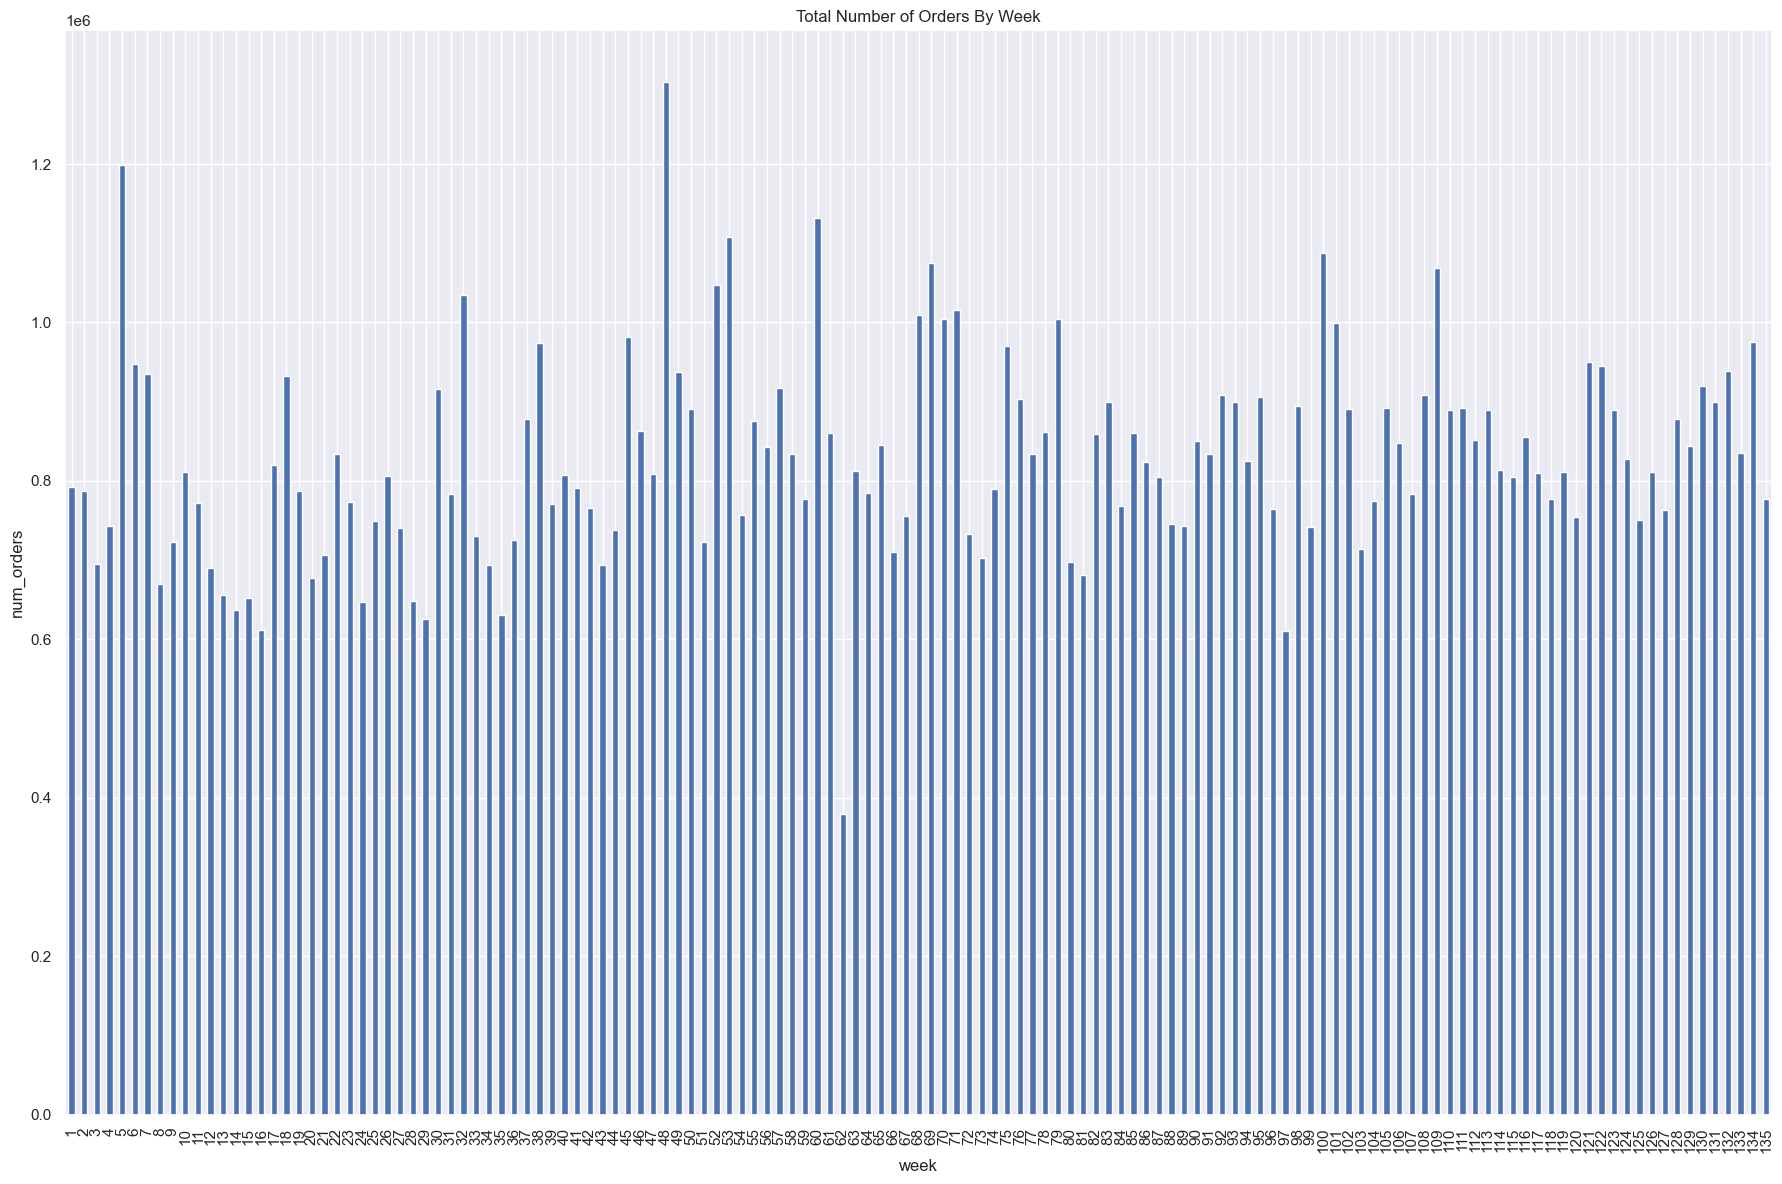

In [172]:
#plot the total profit over the years
plt.figure(figsize=(18, 12))
nr_order_by_week.plot(kind='bar')
plt.title('Total Number of Orders By Week')
plt.xlabel('week')
plt.ylabel('num_orders')
plt.xticks(rotation=90)  # text rotation on the x axis
plt.tight_layout()
plt.show()


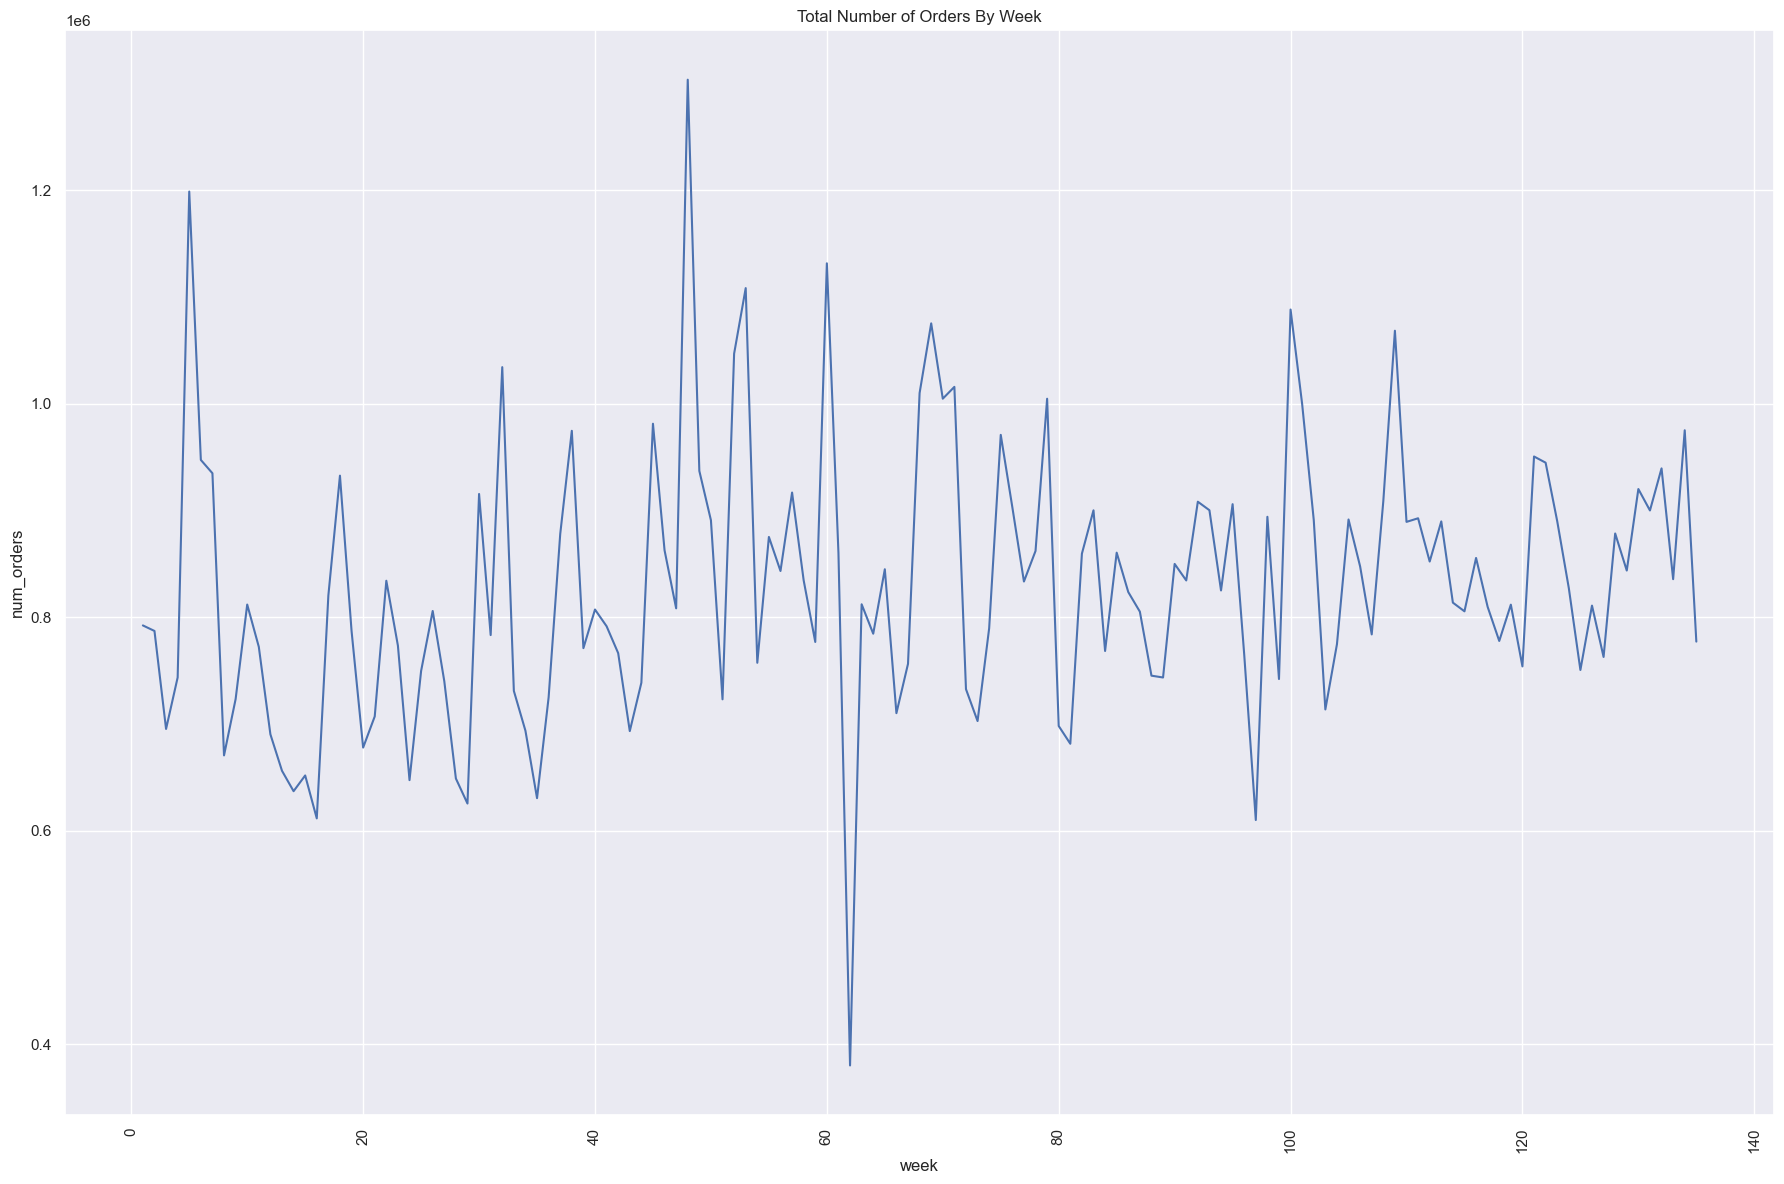

In [173]:
plt.figure(figsize=(18, 12))
nr_order_by_week.plot(kind='line')
plt.title('Total Number of Orders By Week')
plt.xlabel('week')
plt.ylabel('num_orders')
plt.xticks(rotation=90)  # text rotation on the x axis
plt.tight_layout()
plt.show()


In [174]:
full_train_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423727 entries, 0 to 423726
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     423727 non-null  int64  
 1   week                   423727 non-null  int64  
 2   center_id              423727 non-null  int64  
 3   meal_id                423727 non-null  int64  
 4   checkout_price         423727 non-null  float64
 5   base_price             423727 non-null  float64
 6   emailer_for_promotion  423727 non-null  int64  
 7   homepage_featured      423727 non-null  int64  
 8   num_orders             423727 non-null  int64  
 9   city_code              423727 non-null  int64  
 10  region_code            423727 non-null  int64  
 11  center_type            423727 non-null  object 
 12  op_area                423727 non-null  float64
 13  category               423727 non-null  object 
 14  cuisine                423727 non-nu

In [175]:
nr_order_by_center = full_train_data.groupby(["center_id"])["num_orders"].sum()
nr_order_by_center

center_id
10     3142082
11     2630927
13     4011441
14     1116908
17     1145302
        ...   
161     762965
162     635346
174    2612825
177     961134
186     790966
Name: num_orders, Length: 77, dtype: int64

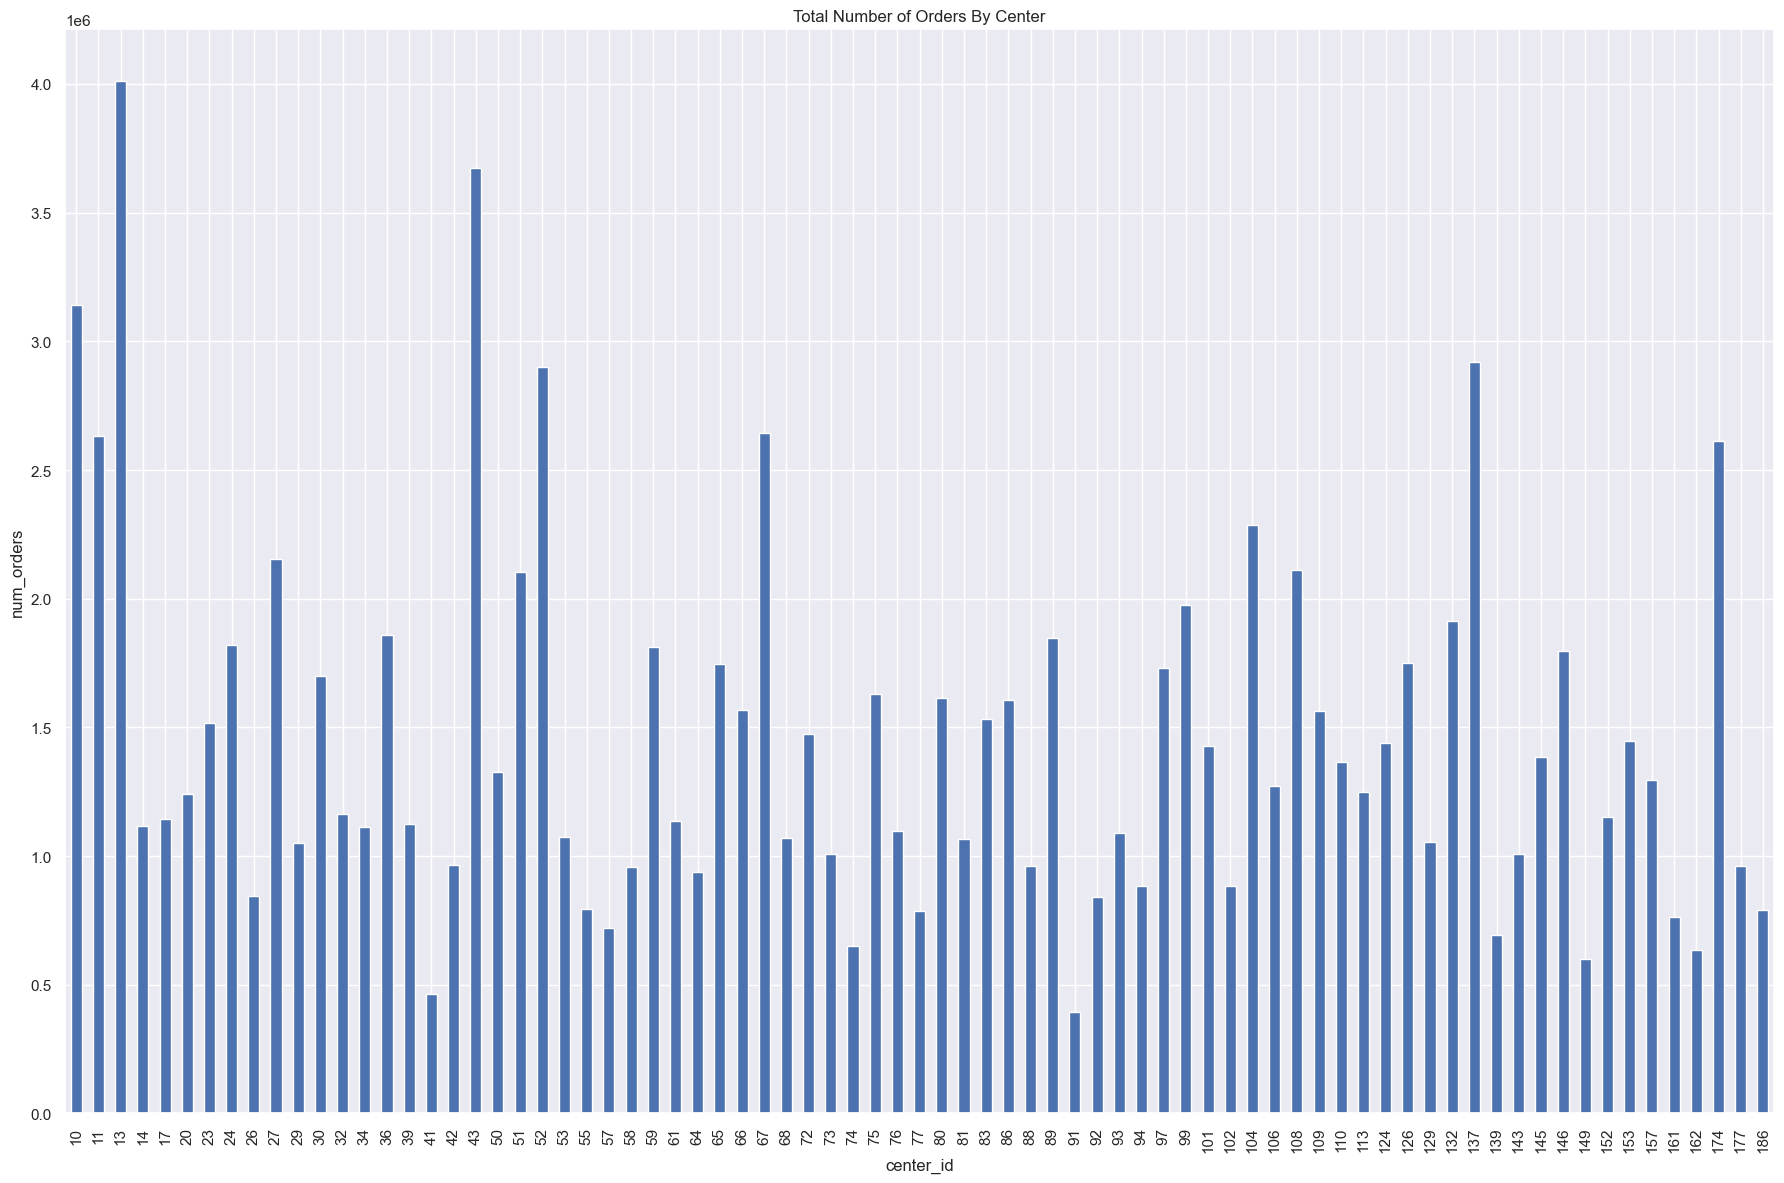

In [176]:
plt.figure(figsize=(18, 12))
nr_order_by_center.plot(kind='bar')
plt.title('Total Number of Orders By Center')
plt.xlabel('center_id')
plt.ylabel('num_orders')
plt.xticks(rotation=90)  # text rotation on the x axis
plt.tight_layout()
plt.show()

In [177]:
nr_order_by_center_type = full_train_data.groupby(["center_type"])["num_orders"].sum()
nr_order_by_center_type

center_type
TYPE_A    64774805
TYPE_B    27991808
TYPE_C    19330592
Name: num_orders, dtype: int64

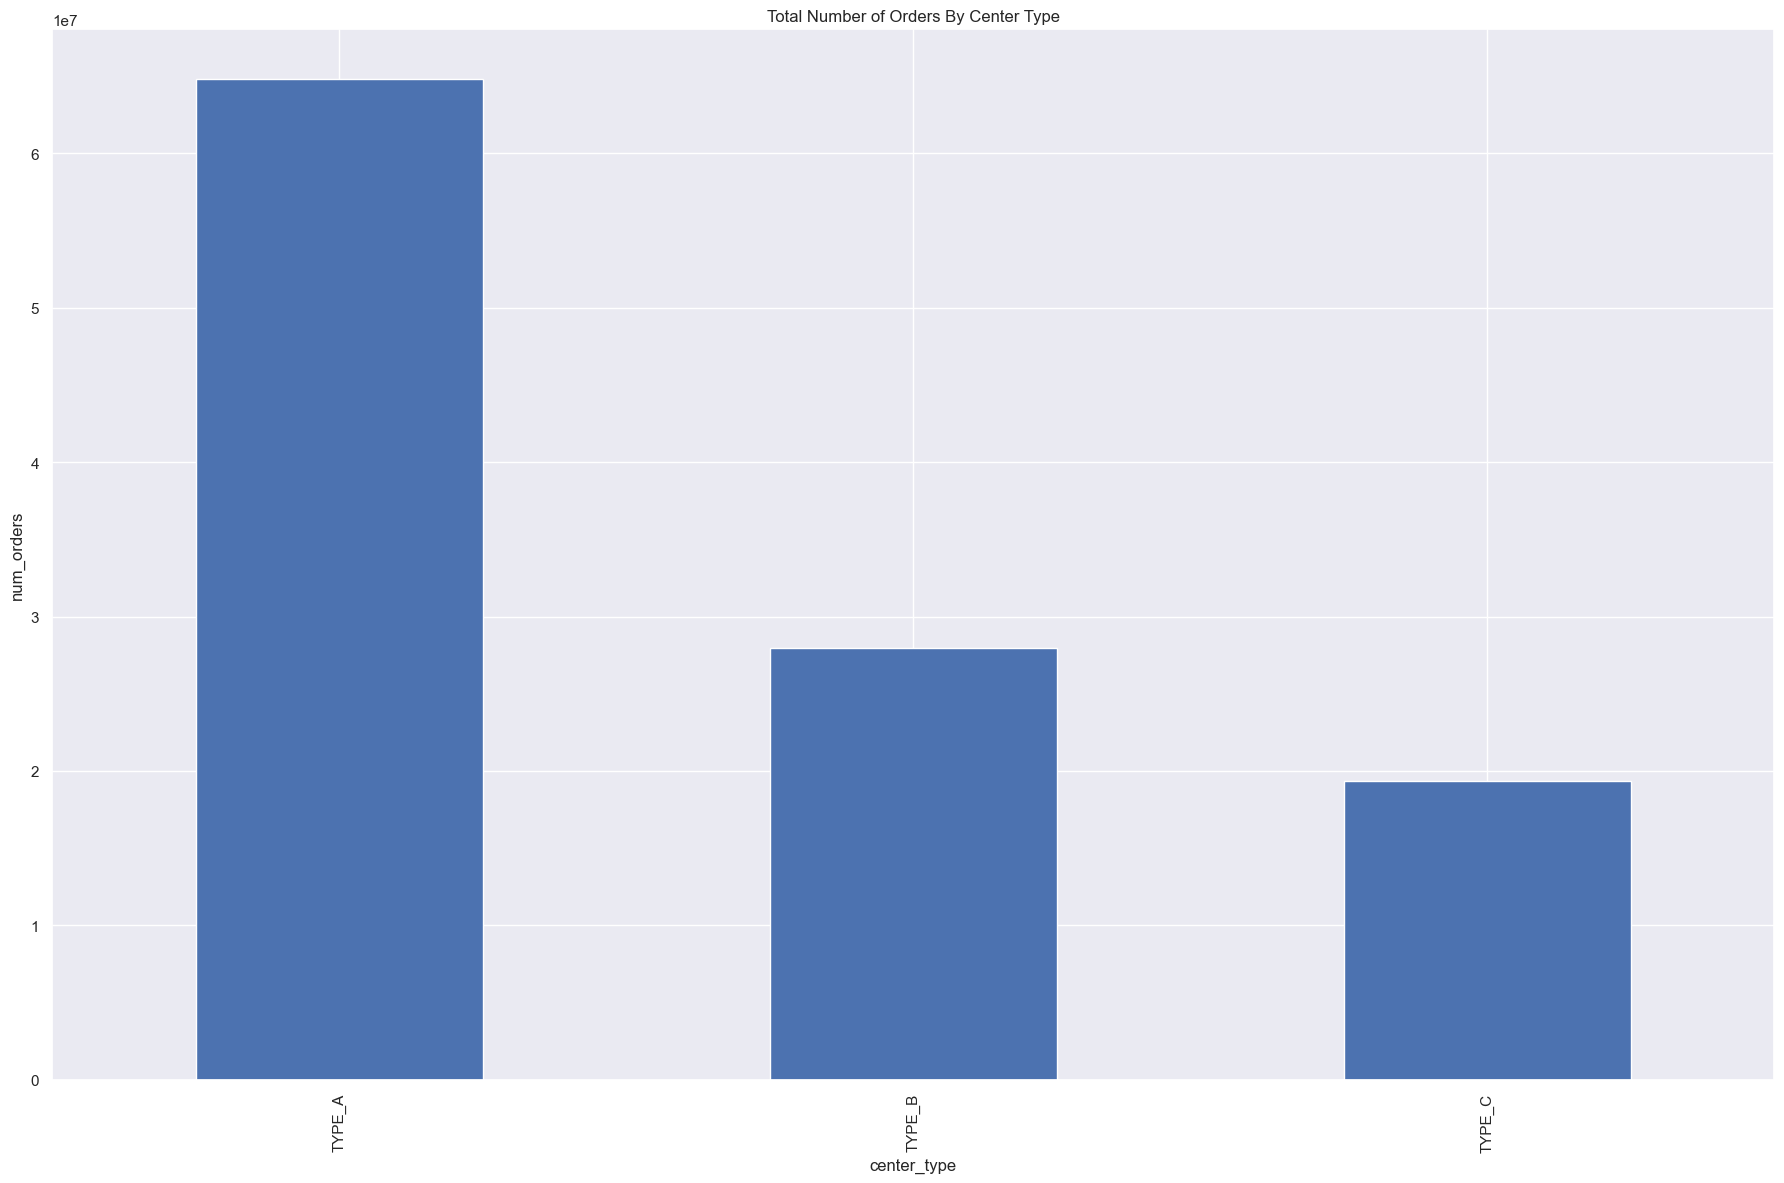

In [178]:
#plot the total profit over the years
plt.figure(figsize=(18, 12))
nr_order_by_center_type.plot(kind='bar')
plt.title('Total Number of Orders By Center Type')
plt.xlabel('center_type')
plt.ylabel('num_orders')
plt.xticks(rotation=90)  # text rotation on the x axis
plt.tight_layout()
plt.show()


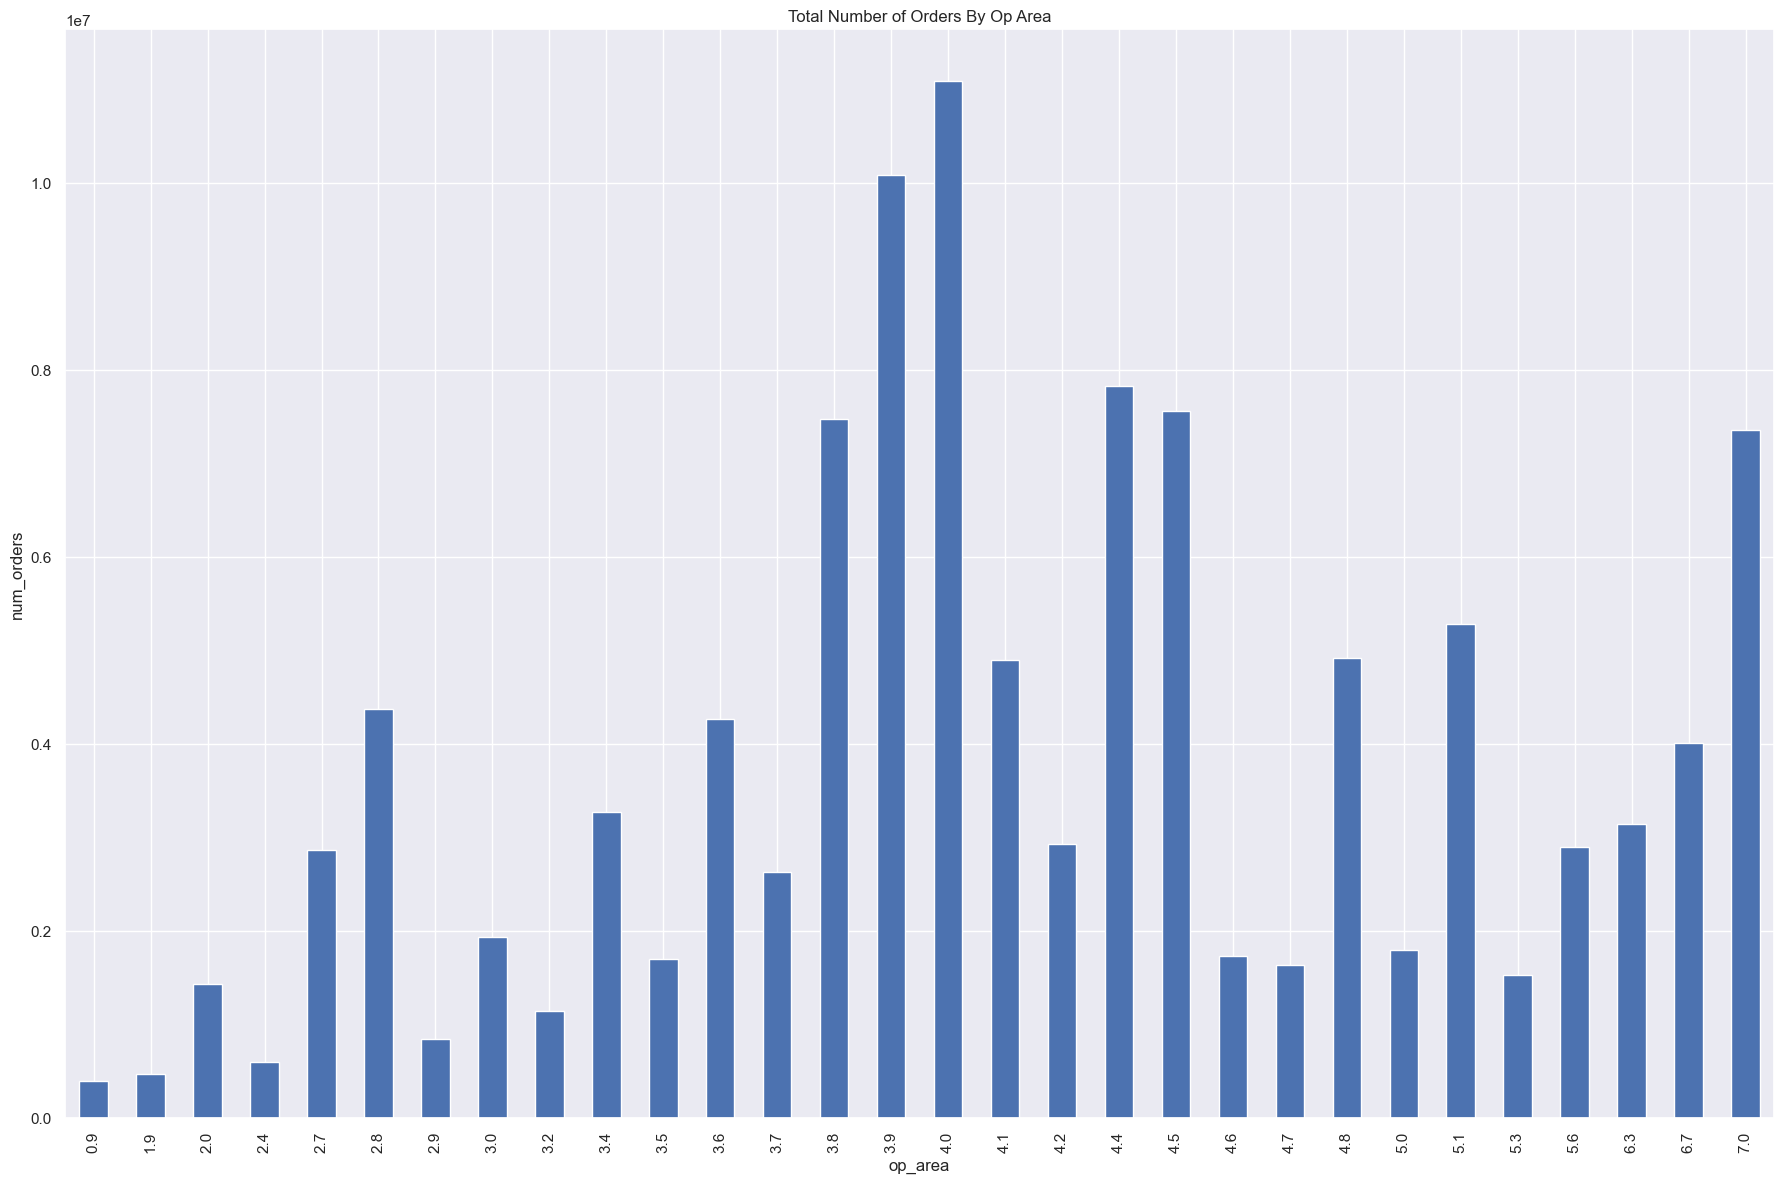

In [179]:
nr_order_by_op_area = full_train_data.groupby(["op_area"])["num_orders"].sum()
plt.figure(figsize=(18, 12))
nr_order_by_op_area.plot(kind='bar')
plt.title('Total Number of Orders By Op Area')
plt.xlabel('op_area')
plt.ylabel('num_orders')
plt.xticks(rotation=90)  # text rotation on the x axis
plt.tight_layout()
plt.show()

## Type A Centers perform much better than Type B. We'll need to understand why.


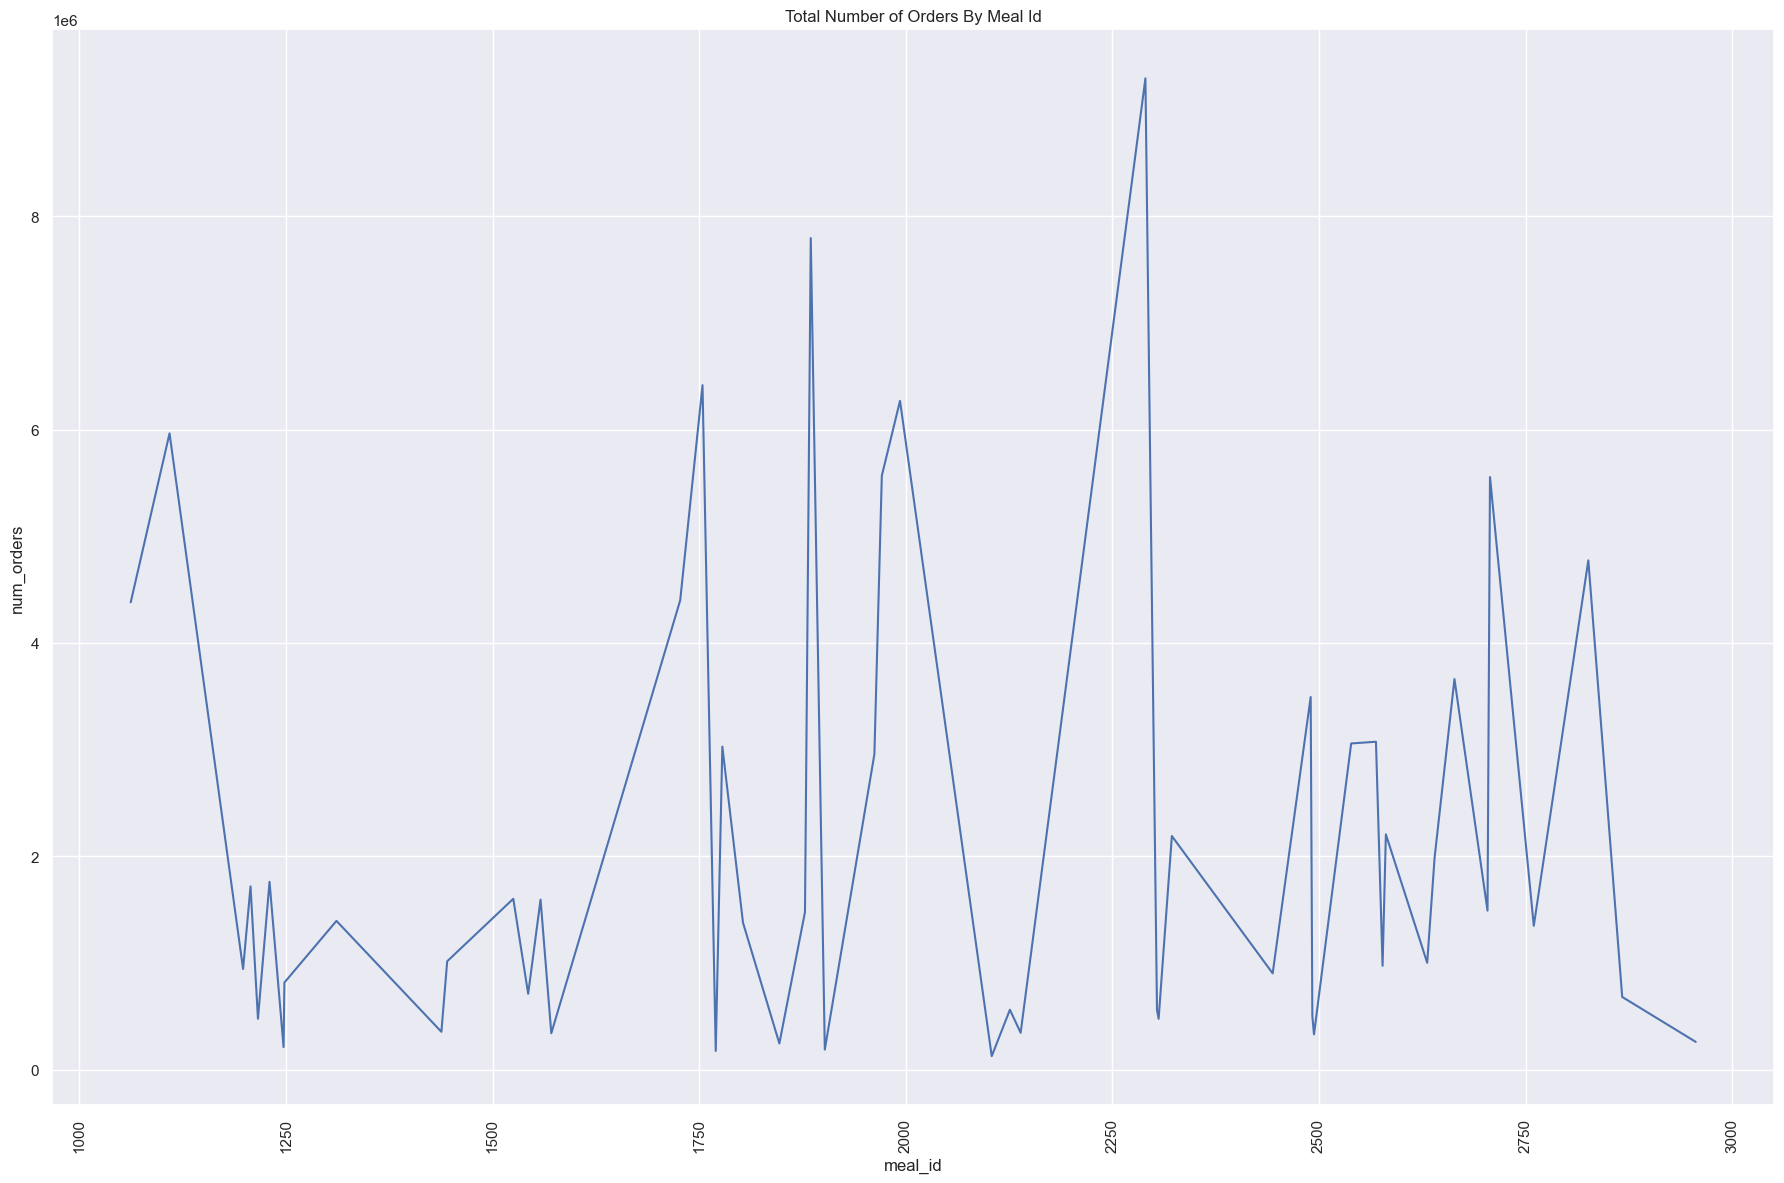

In [180]:
nr_order_by_meal = full_train_data.groupby(["meal_id"])["num_orders"].sum()
plt.figure(figsize=(18, 12))
nr_order_by_meal.plot(kind='line')
plt.title('Total Number of Orders By Meal Id')
plt.xlabel('meal_id')
plt.ylabel('num_orders')
plt.xticks(rotation=90)  # text rotation on the x axis
plt.tight_layout()
plt.show()

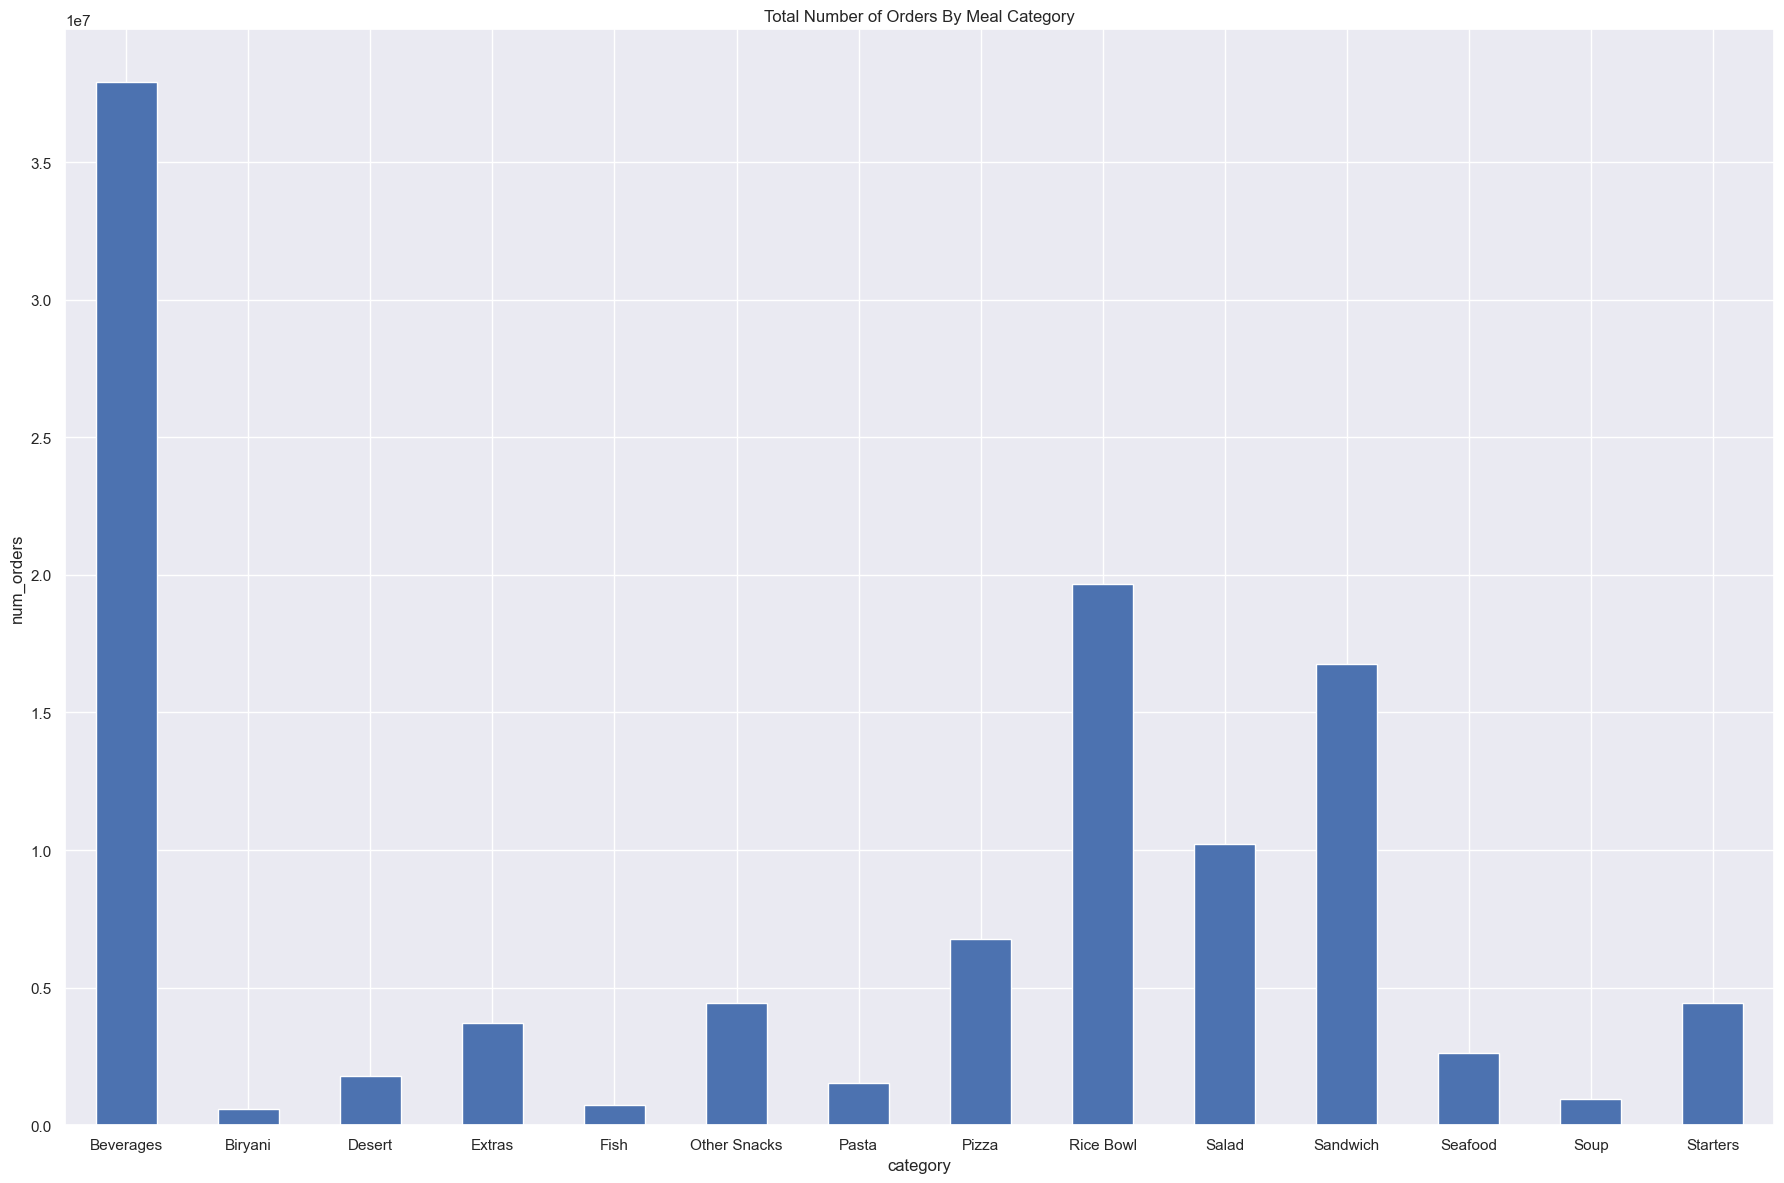

In [181]:
nr_order_by_meal_category = full_train_data.groupby(["category"])["num_orders"].sum()
plt.figure(figsize=(18, 12))
nr_order_by_meal_category.plot(kind='bar')
plt.title('Total Number of Orders By Meal Category')
plt.xlabel('category')
plt.ylabel('num_orders')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


## Some categories sell much better than others: Beverages win by a lot, followed by Rice Bowls and Sandwiches

In [182]:
full_train_data["cuisine"].value_counts()

cuisine
Italian        114071
Thai           109903
Indian         104592
Continental     95161
Name: count, dtype: int64

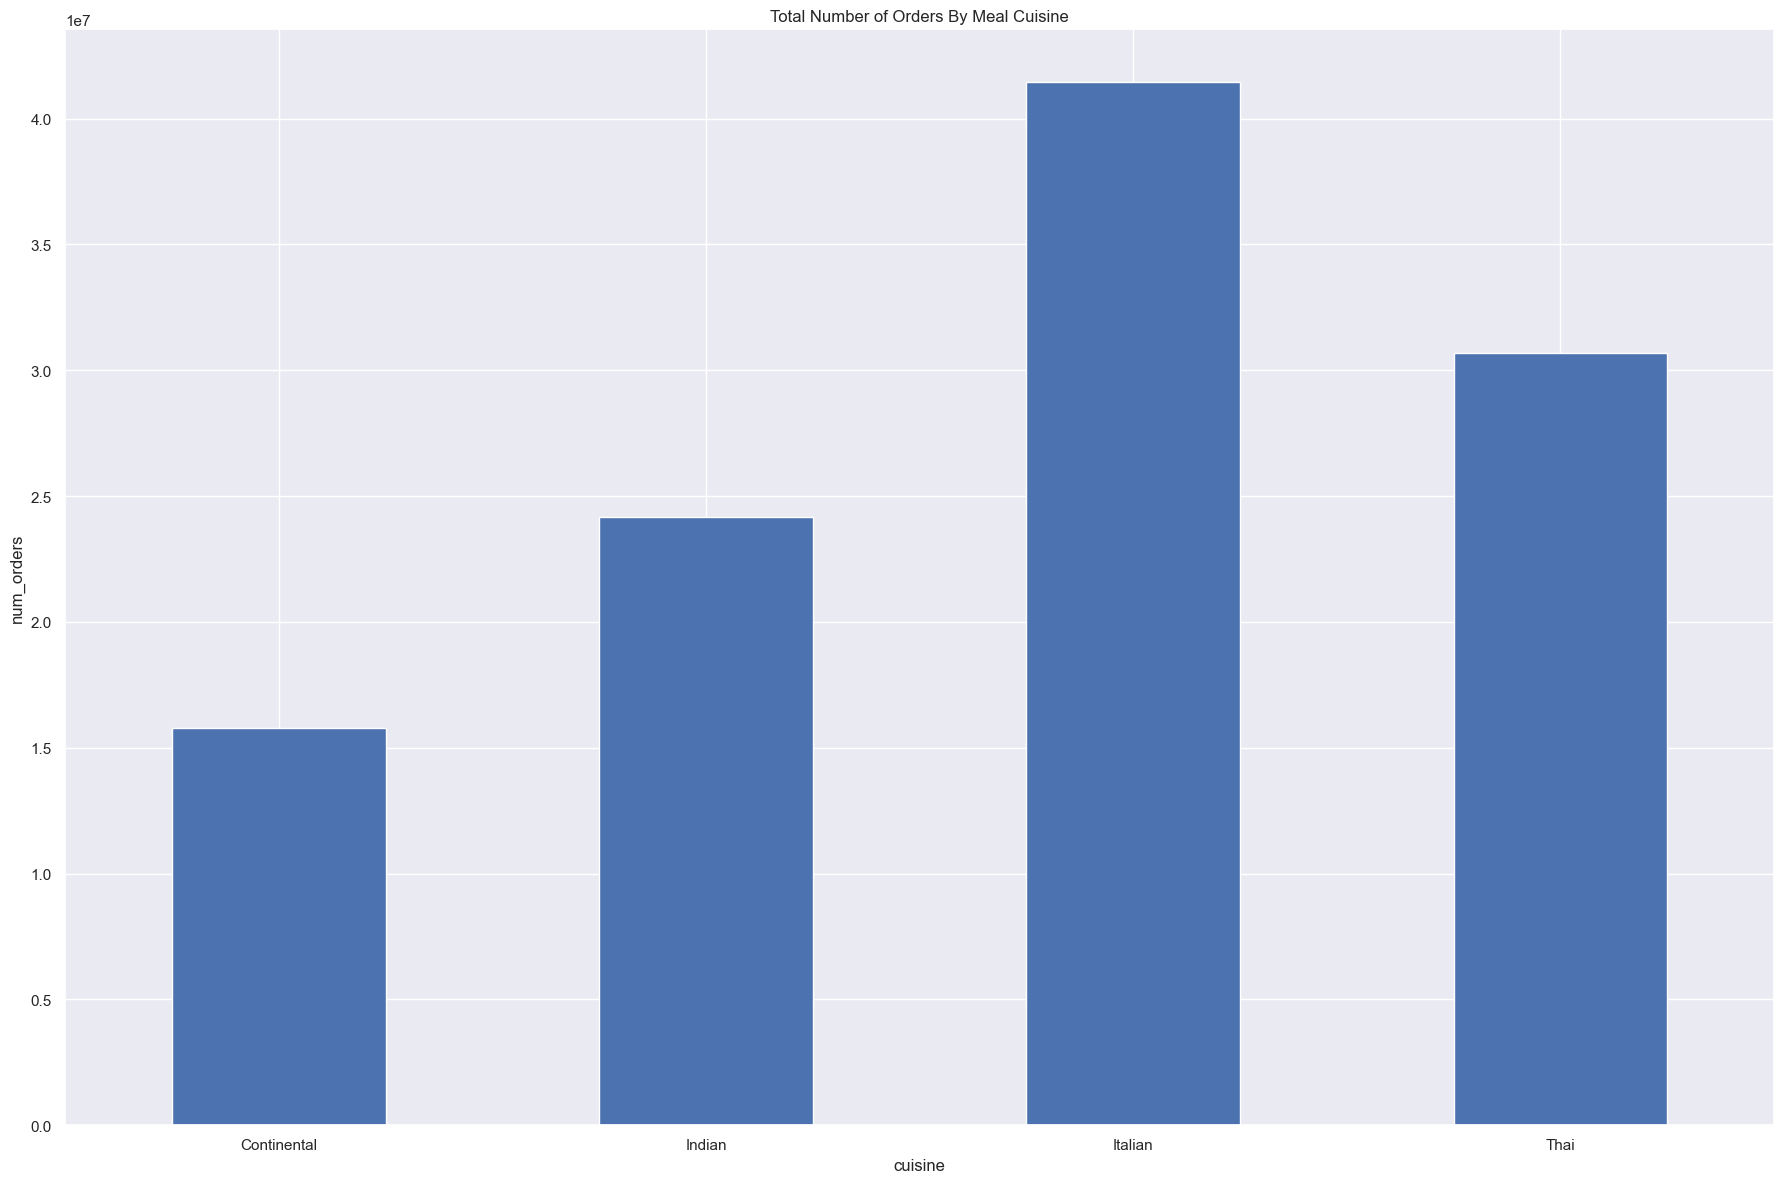

In [183]:
nr_order_by_meal_cuisine = full_train_data.groupby(["cuisine"])["num_orders"].sum()
plt.figure(figsize=(18, 12))
nr_order_by_meal_cuisine.plot(kind='bar')
plt.title('Total Number of Orders By Meal Cuisine')
plt.xlabel('cuisine')
plt.ylabel('num_orders')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Checking some other connections

## Are Type_A centers selling better because of Type_A or because they maybe selling more Beverages or other well selling meal cateogries?

Let's look at the order totals for each center_type/category combination

In [184]:
full_train_data.groupby(["center_type", "category"])["num_orders"].sum()


center_type  category    
TYPE_A       Beverages       23121313
             Biryani           319497
             Desert            921568
             Extras           2223044
             Fish              398122
             Other Snacks     2546374
             Pasta             830210
             Pizza            3825611
             Rice Bowl       11174816
             Salad            5397736
             Sandwich         9372097
             Seafood          1562251
             Soup              552529
             Starters         2529637
TYPE_B       Beverages        8696497
             Biryani           209930
             Desert            546832
             Extras           1166057
             Fish              312277
             Other Snacks     1626389
             Pasta             495039
             Pizza            1443821
             Rice Bowl        5173654
             Salad            2133200
             Sandwich         3549237
             Seafood    

Good info, but we need it in a visual way to understand better.
Let's plot these values grouped by center type and category. We expect to see that Type A bars will outperform the rest of the center types because we know Type A sells much more than the others.

C:\Users\Devy\anaconda3\envs\handson-ml2\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Devy\anaconda3\envs\handson-ml2\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Devy\anaconda3\envs\handson-ml2\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Devy\anaconda3\envs\handson-ml2\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isin

<Axes: xlabel='center_type', ylabel='num_orders'>

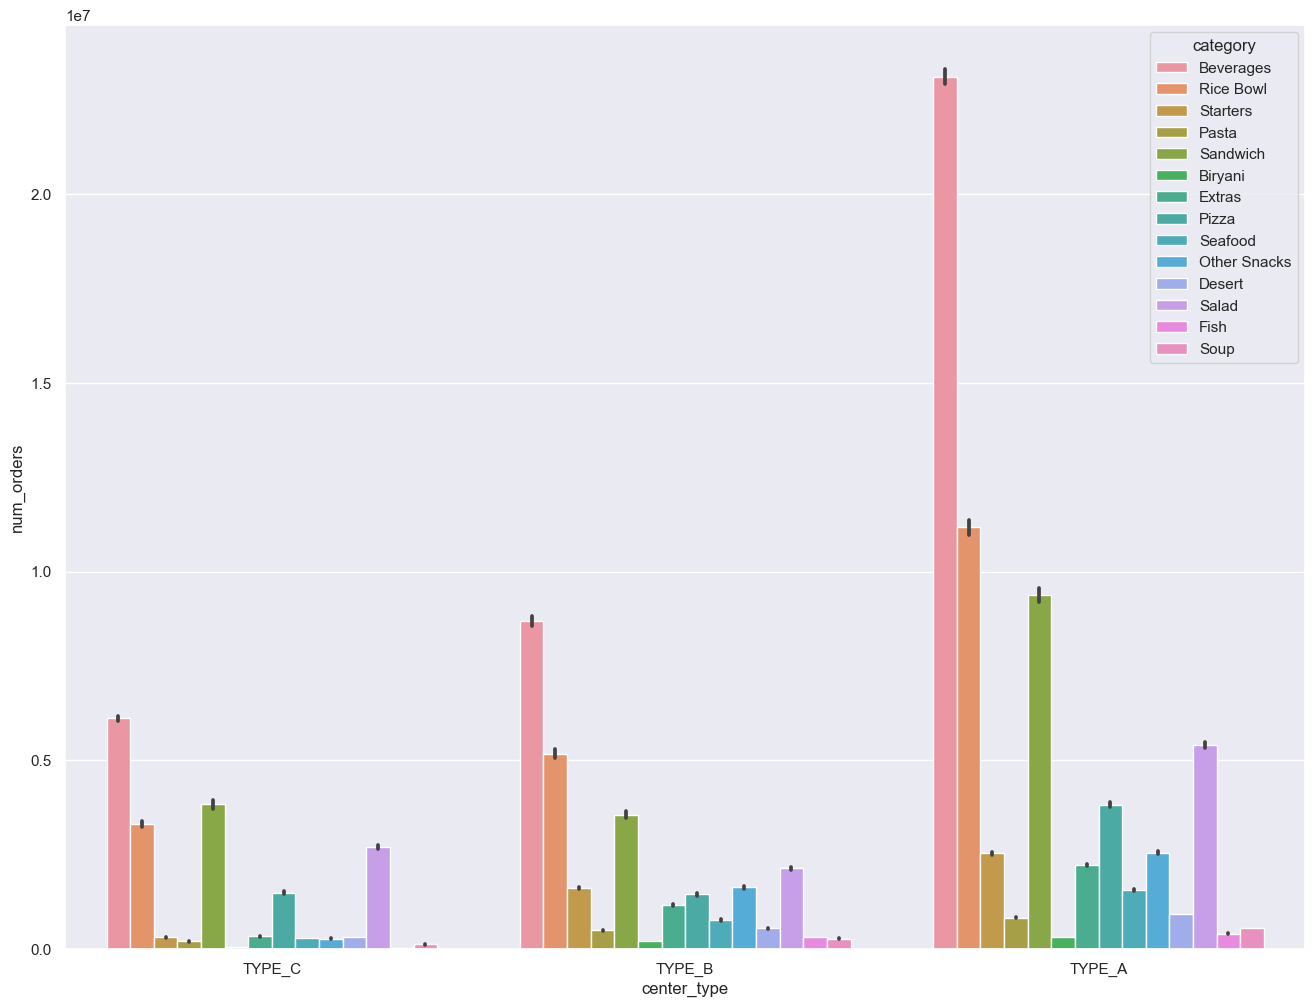

In [185]:
sns.set(rc={'figure.figsize': (16, 12)})
sns.barplot(x="center_type", y="num_orders", hue="category", data=full_train_data, estimator="sum")

OBSERVATIONS:
As we assumed, Type A categories outperform those respective categories from other center types.
Just eyeballing it, we can see that even though Type A sells much more than the others, it sells each category in a similar proportion to the rest.
Eyeballing is not enough, let's check the data.

## Are the percentages of categories sold in Type A very different that in the other types? Does type A sell many more Beverages compared to it's total sales?
## We want to understand if the better performance of Type A is due to it selling meals from a better sold category or if it sells about the same as the other center types in % amount. This will help us understand if the center_type is actually relevant or if the difference in sales for the center_type is due to the meal categories sold.

Basically, we want to calculate the % of sales from the total for each center_type/category combination.
To do this, we first need for each center_type/category combination the total number of orders.

In [186]:
grouped_data_category = full_train_data.groupby(['center_type', 'category'])['num_orders'].sum().reset_index()
grouped_data_category


,center_type,category,num_orders
0,TYPE_A,Beverages,23121313
1,TYPE_A,Biryani,319497
2,TYPE_A,Desert,921568
3,TYPE_A,Extras,2223044
4,TYPE_A,Fish,398122
5,TYPE_A,Other Snacks,2546374
6,TYPE_A,Pasta,830210
7,TYPE_A,Pizza,3825611
8,TYPE_A,Rice Bowl,11174816
9,TYPE_A,Salad,5397736


No we have the total orders for each center_type/category. To calculate the % we first need to know the total nr of orders sold for each center_type regardless of the categories. We create a different dataset for this.

In [187]:
total_orders_by_center = full_train_data.groupby(['center_type'])['num_orders'].sum().reset_index()
total_orders_by_center


,center_type,num_orders
0,TYPE_A,64774805
1,TYPE_B,27991808
2,TYPE_C,19330592


Perfect. Now we could calculate the percentage going line by line and looking into the above dataset to find the total, but it's more performant to use pandas. For this we need to add to all the center_type/category combinations, the total nr of orders for that center_type.

In [188]:
grouped_data_category = grouped_data_category.merge(total_orders_by_center, on='center_type', suffixes=('', '_total'))
grouped_data_category


,center_type,category,num_orders,num_orders_total
0,TYPE_A,Beverages,23121313,64774805
1,TYPE_A,Biryani,319497,64774805
2,TYPE_A,Desert,921568,64774805
3,TYPE_A,Extras,2223044,64774805
4,TYPE_A,Fish,398122,64774805
5,TYPE_A,Other Snacks,2546374,64774805
6,TYPE_A,Pasta,830210,64774805
7,TYPE_A,Pizza,3825611,64774805
8,TYPE_A,Rice Bowl,11174816,64774805
9,TYPE_A,Salad,5397736,64774805


Now that we have everything we need to calculate the percentage in the `grouped_data` dataset, we can use Pandas to apply a "regula de 3 simpla" formula:
`num_orders / num_orders+total * 100`

In [189]:
grouped_data_category["percentage"] = grouped_data_category["num_orders"] / grouped_data_category[
    "num_orders_total"] * 100


In [190]:
grouped_data_category


,center_type,category,num_orders,num_orders_total,percentage
0,TYPE_A,Beverages,23121313,64774805,35.694917
1,TYPE_A,Biryani,319497,64774805,0.493243
2,TYPE_A,Desert,921568,64774805,1.422726
3,TYPE_A,Extras,2223044,64774805,3.431958
4,TYPE_A,Fish,398122,64774805,0.614625
5,TYPE_A,Other Snacks,2546374,64774805,3.931118
6,TYPE_A,Pasta,830210,64774805,1.281687
7,TYPE_A,Pizza,3825611,64774805,5.906017
8,TYPE_A,Rice Bowl,11174816,64774805,17.251794
9,TYPE_A,Salad,5397736,64774805,8.333080


Now, we just need to plot the data

C:\Users\Devy\anaconda3\envs\handson-ml2\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Devy\anaconda3\envs\handson-ml2\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Devy\anaconda3\envs\handson-ml2\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Devy\anaconda3\envs\handson-ml2\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isin

<Axes: xlabel='center_type', ylabel='percentage'>

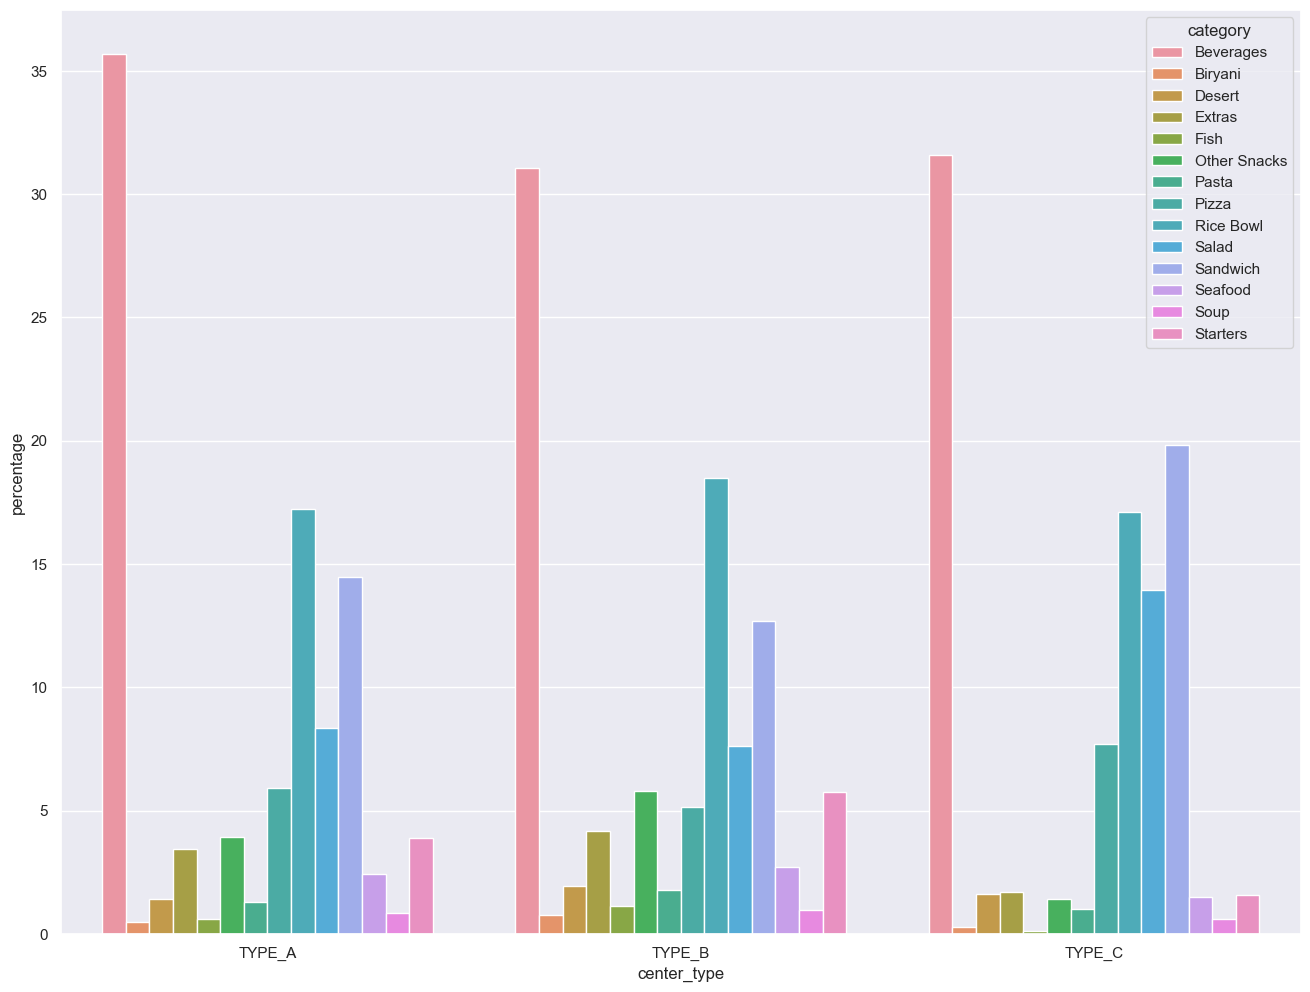

In [191]:
sns.barplot(x="center_type", y="percentage", hue="category", data=grouped_data_category)


OBSERVATIONS:
Given that the percentages for each category is very similar between the center_types it's safe to assume that category does not have a correlation with the high number of orders sold in Type A, and basically a higher Type like Type A or Type B means that that center will sell more.
So far, center_type seems like a very important feature to include in the ML training.

In [192]:
full_train_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423727 entries, 0 to 423726
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     423727 non-null  int64  
 1   week                   423727 non-null  int64  
 2   center_id              423727 non-null  int64  
 3   meal_id                423727 non-null  int64  
 4   checkout_price         423727 non-null  float64
 5   base_price             423727 non-null  float64
 6   emailer_for_promotion  423727 non-null  int64  
 7   homepage_featured      423727 non-null  int64  
 8   num_orders             423727 non-null  int64  
 9   city_code              423727 non-null  int64  
 10  region_code            423727 non-null  int64  
 11  center_type            423727 non-null  object 
 12  op_area                423727 non-null  float64
 13  category               423727 non-null  object 
 14  cuisine                423727 non-nu

# Are Type_A centers selling better because of Type_A or because they all have higher op_area?

Let's check center_type/op_area order totals.

In [193]:
total_orders_by_center_area = full_train_data.groupby(['center_type', "op_area"])['num_orders'].sum().reset_index()
total_orders_by_center_area


,center_type,op_area,num_orders
0,TYPE_A,2.4,599169
1,TYPE_A,2.7,1749554
2,TYPE_A,2.8,1534609
3,TYPE_A,3.0,1097600
4,TYPE_A,3.2,1145302
5,TYPE_A,3.4,3268992
6,TYPE_A,3.5,1698003
7,TYPE_A,3.6,1564660
8,TYPE_A,3.7,2630927
9,TYPE_A,3.8,4392218


Nothing to understand. Let's plot it.

C:\Users\Devy\anaconda3\envs\handson-ml2\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Devy\anaconda3\envs\handson-ml2\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Devy\anaconda3\envs\handson-ml2\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Devy\anaconda3\envs\handson-ml2\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isin

<Axes: xlabel='center_type', ylabel='num_orders'>

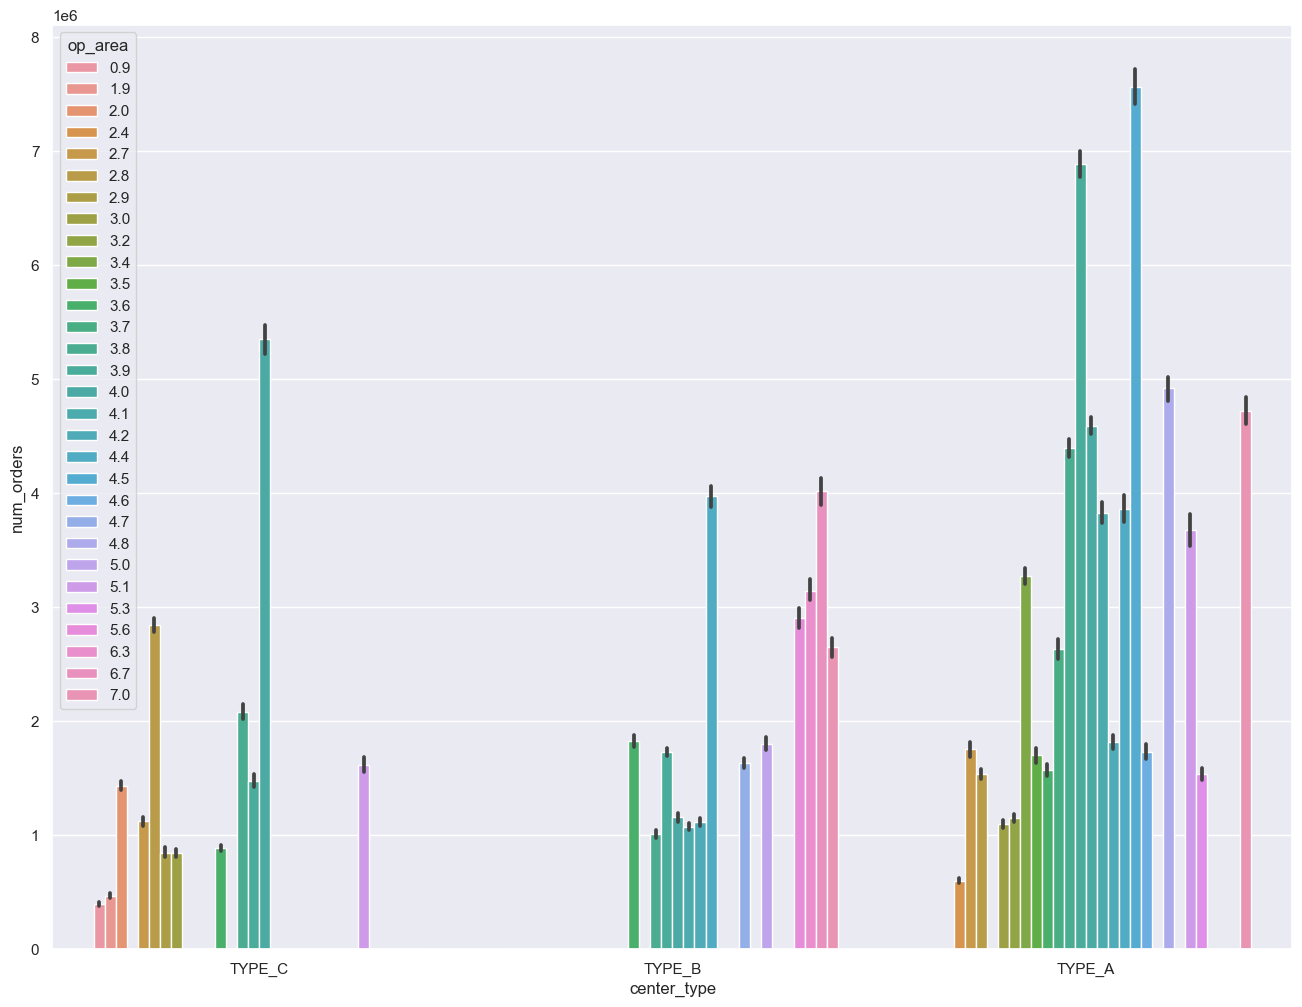

In [194]:
sns.set(rc={'figure.figsize': (16, 12)})
sns.barplot(x="center_type", y="num_orders", hue="op_area", data=full_train_data, estimator="sum")


OBSERVATIONS:
TYpe C is the only one that sells from centers with a very small op area.
Type A might sell better because it has a much more even spread of centers with different op-areas, from smallest to largest.
Type C might be selling poorly because it seems it has very few sales from center in range 4.1-5.0, which is a sweet spot and generates a lot of sales for Type A.
In order to understand this better, let's look at the percentage spread for each op_area.

C:\Users\Devy\anaconda3\envs\handson-ml2\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Devy\anaconda3\envs\handson-ml2\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Devy\anaconda3\envs\handson-ml2\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Devy\anaconda3\envs\handson-ml2\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isin

<Axes: xlabel='center_type', ylabel='percentage'>

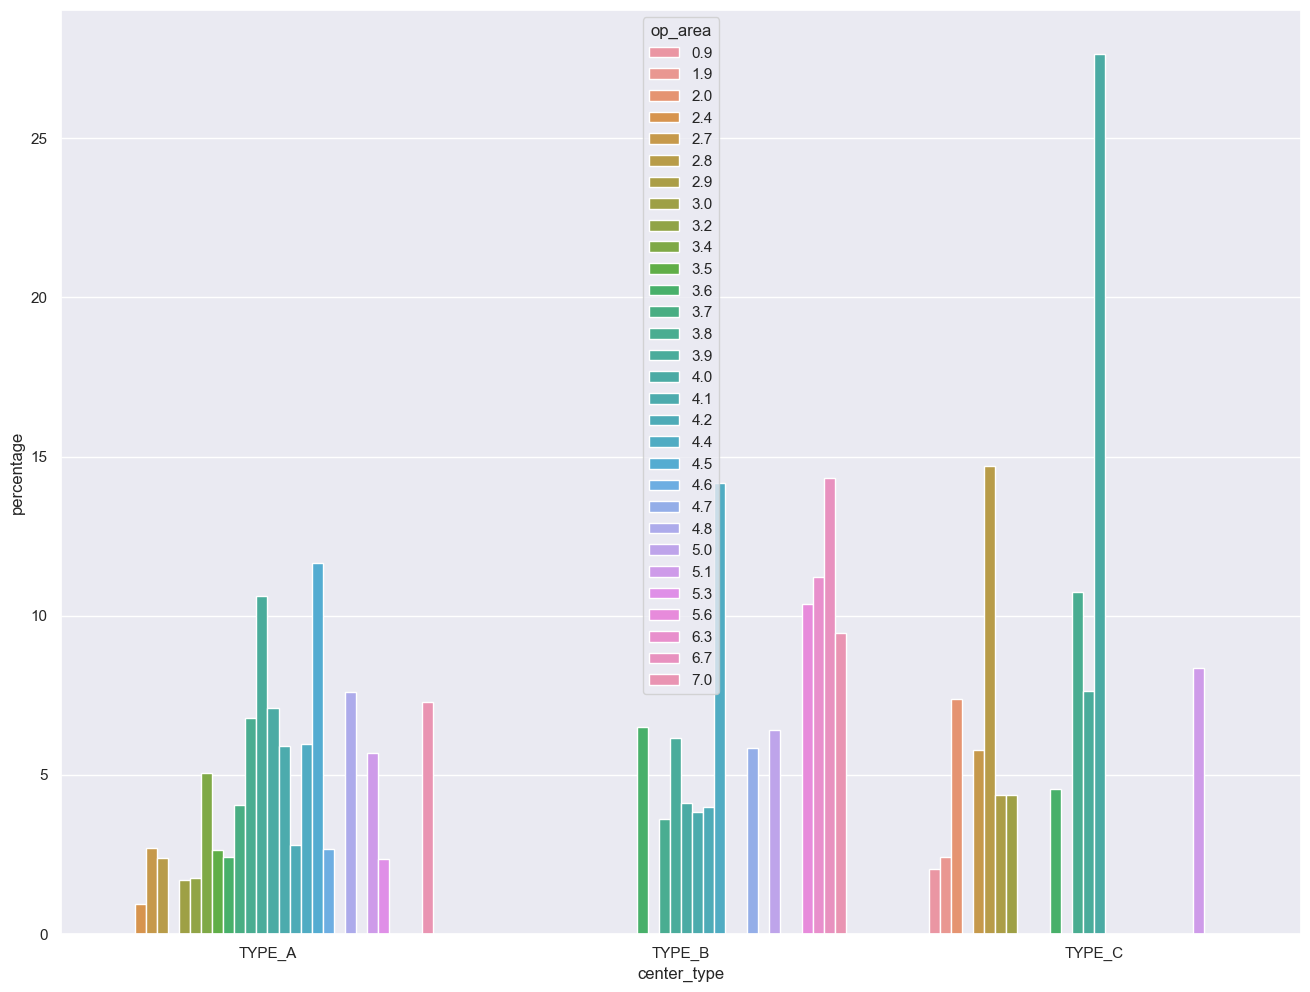

In [195]:
grouped_data_area = full_train_data.groupby(['center_type', 'op_area'])['num_orders'].sum().reset_index()
grouped_data_area = grouped_data_area.merge(total_orders_by_center, on='center_type', suffixes=('', '_total'))
grouped_data_area["percentage"] = grouped_data_area["num_orders"] / grouped_data_area["num_orders_total"] * 100
sns.barplot(x="center_type", y="percentage", hue="op_area", data=grouped_data_area)


As seen above, Type A has a closer to normal (Gaussian) distribution than Type C, which relies heavily on centers in the 4.0-4.2 area. Might be a reason why sales are smaller in type C.

Only thing worth mentioning is that TYPE_C, the lowest selling one has centers with small op_area(e.g. centers that ship on a very small distance around them)

However, none of these insights are extremely powerful to determine changes in the flow.

Let's check if each center_type have the same distribution of op_area. We're curious to see if maybe TYPE_C have a lot of small op_area centers and if that's the reason its sales are lower or other reasons.

C:\Users\Devy\anaconda3\envs\handson-ml2\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Devy\anaconda3\envs\handson-ml2\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Devy\anaconda3\envs\handson-ml2\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Devy\anaconda3\envs\handson-ml2\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isin

<Axes: xlabel='center_type', ylabel='count'>

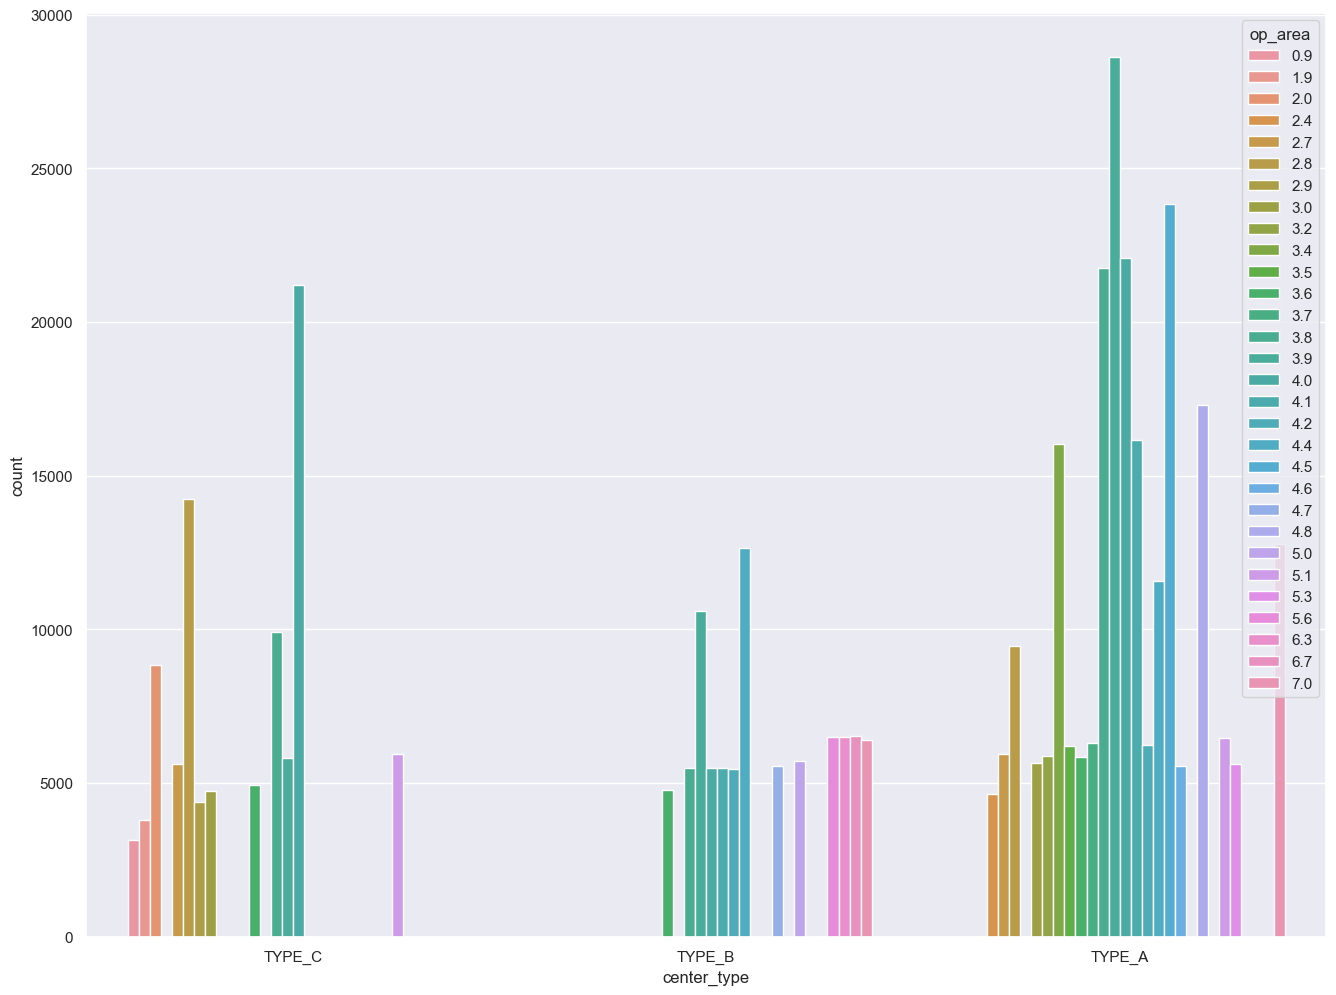

In [196]:
sns.countplot(x="center_type", hue="op_area", data=full_train_data)

OBSERVATIONS:
Comparing the count of op_area chart with the number of orders/% for each op, we can see that the sales generated by each op_area are directly proportional to the numbers of centers with that op_area. Makes perfect sense.
In conclusion, we cannot say that Type C means that it includes only centers with a specific op_area range or other assumptions like this.
We do not see any connection between op_area and center type at the moment, meaning that until further analysis both of these features are relevant for training.


Let's bin the op_area to work easily with it and check if we see anything else.

C:\Users\Devy\anaconda3\envs\handson-ml2\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Devy\anaconda3\envs\handson-ml2\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Devy\anaconda3\envs\handson-ml2\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='op_area', ylabel='num_orders'>

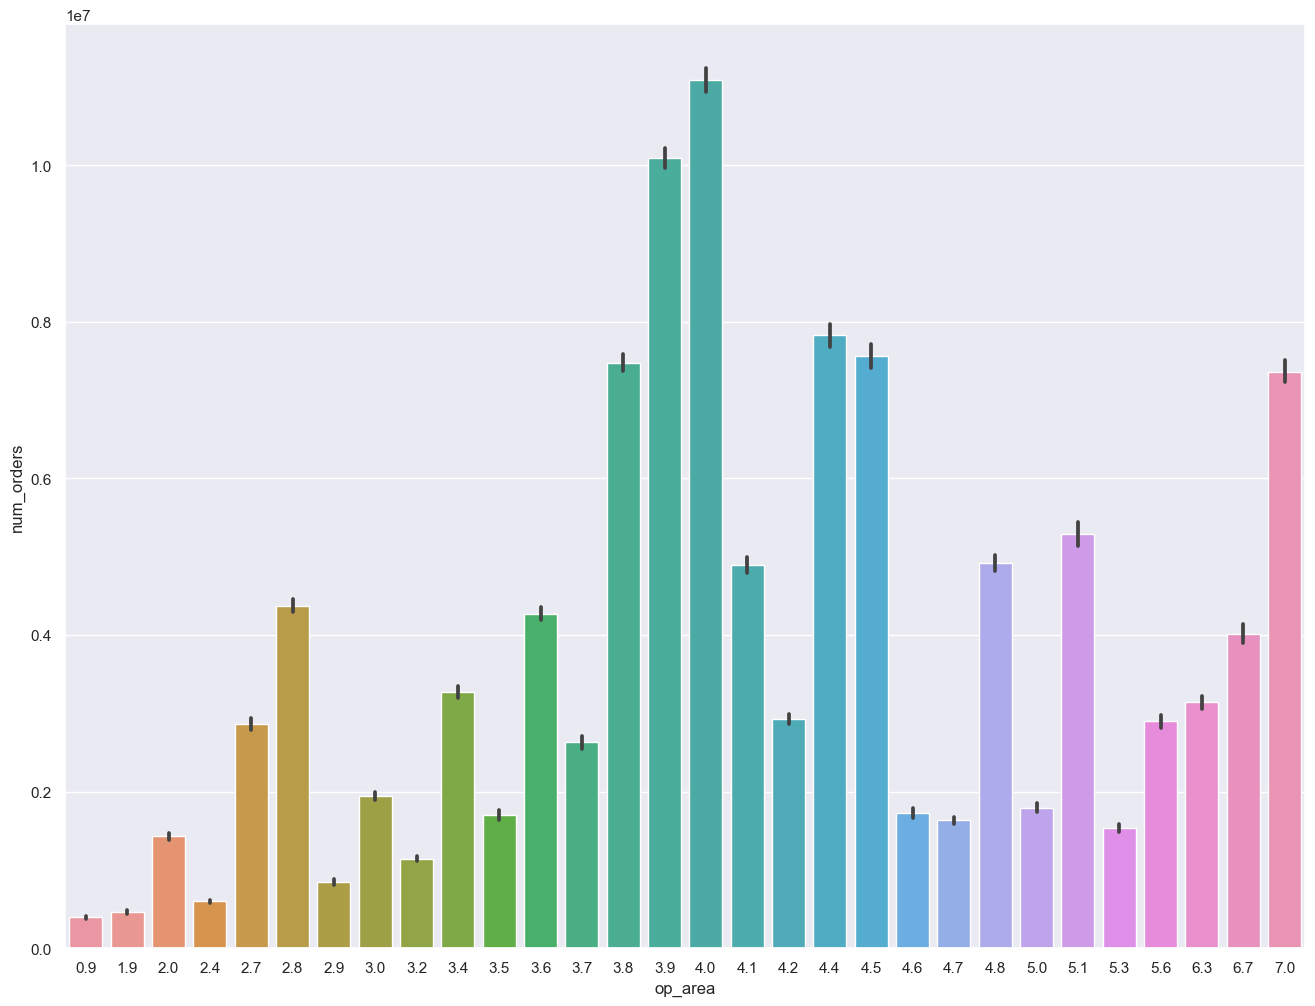

In [197]:
sns.barplot(x="op_area", y="num_orders", data=full_train_data, estimator="sum")

In [198]:
full_train_data['op_area_bin'] = pd.cut(full_train_data['op_area'], [0, 2.4, 3.7, 4.5, 5.1, 6.7, np.inf],
                                        labels=['XS', 'S', 'M', 'L', 'XL', 'XXL'])


C:\Users\Devy\anaconda3\envs\handson-ml2\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Devy\anaconda3\envs\handson-ml2\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='op_area_bin', ylabel='num_orders'>

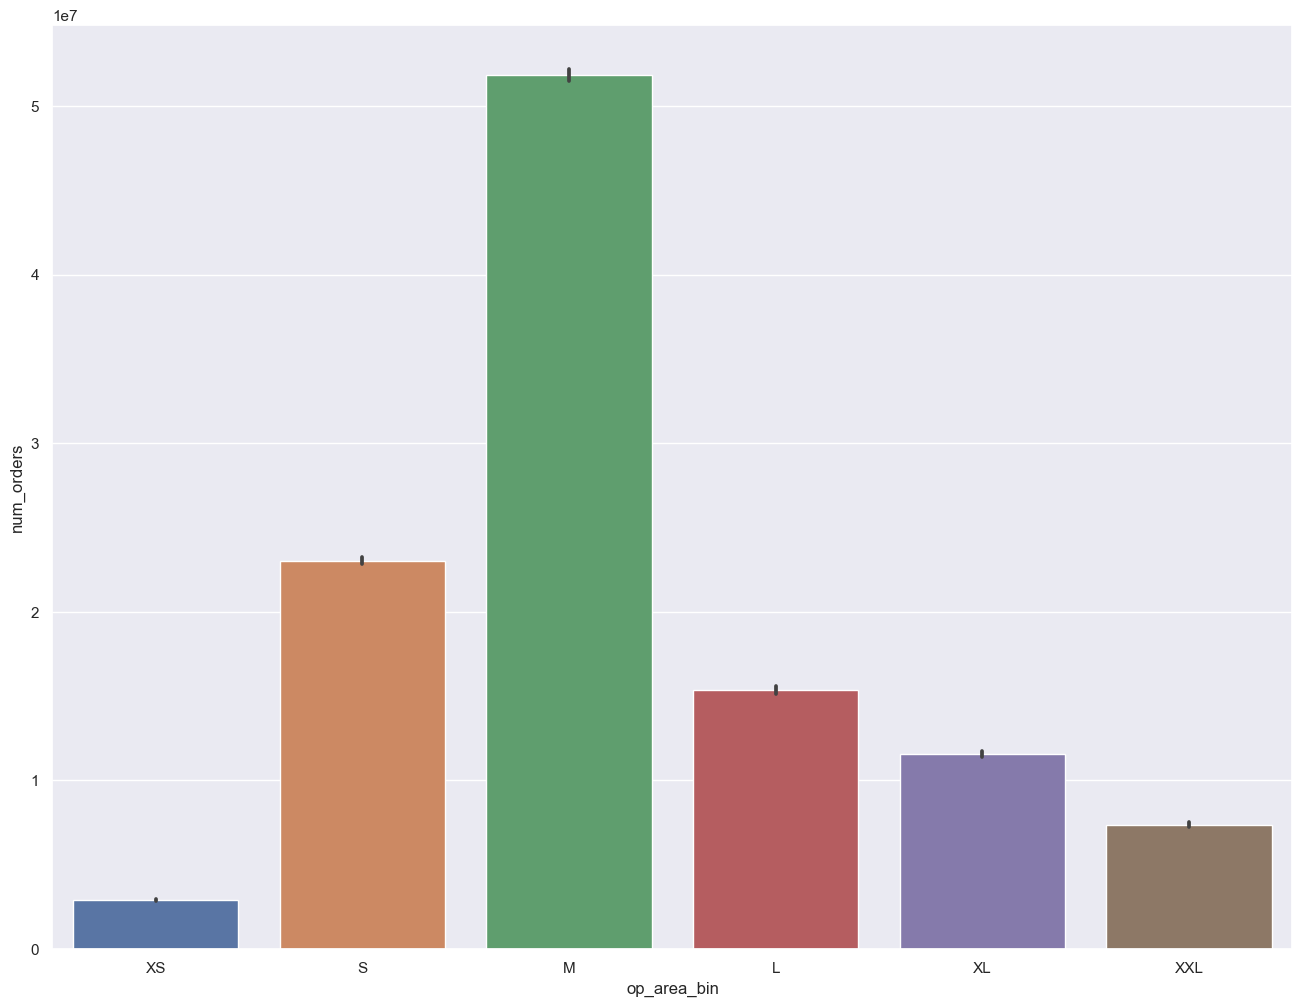

In [199]:
sns.barplot(x="op_area_bin", y="num_orders", data=full_train_data, estimator="sum")

C:\Users\Devy\anaconda3\envs\handson-ml2\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Devy\anaconda3\envs\handson-ml2\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Devy\anaconda3\envs\handson-ml2\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='center_type', ylabel='count'>

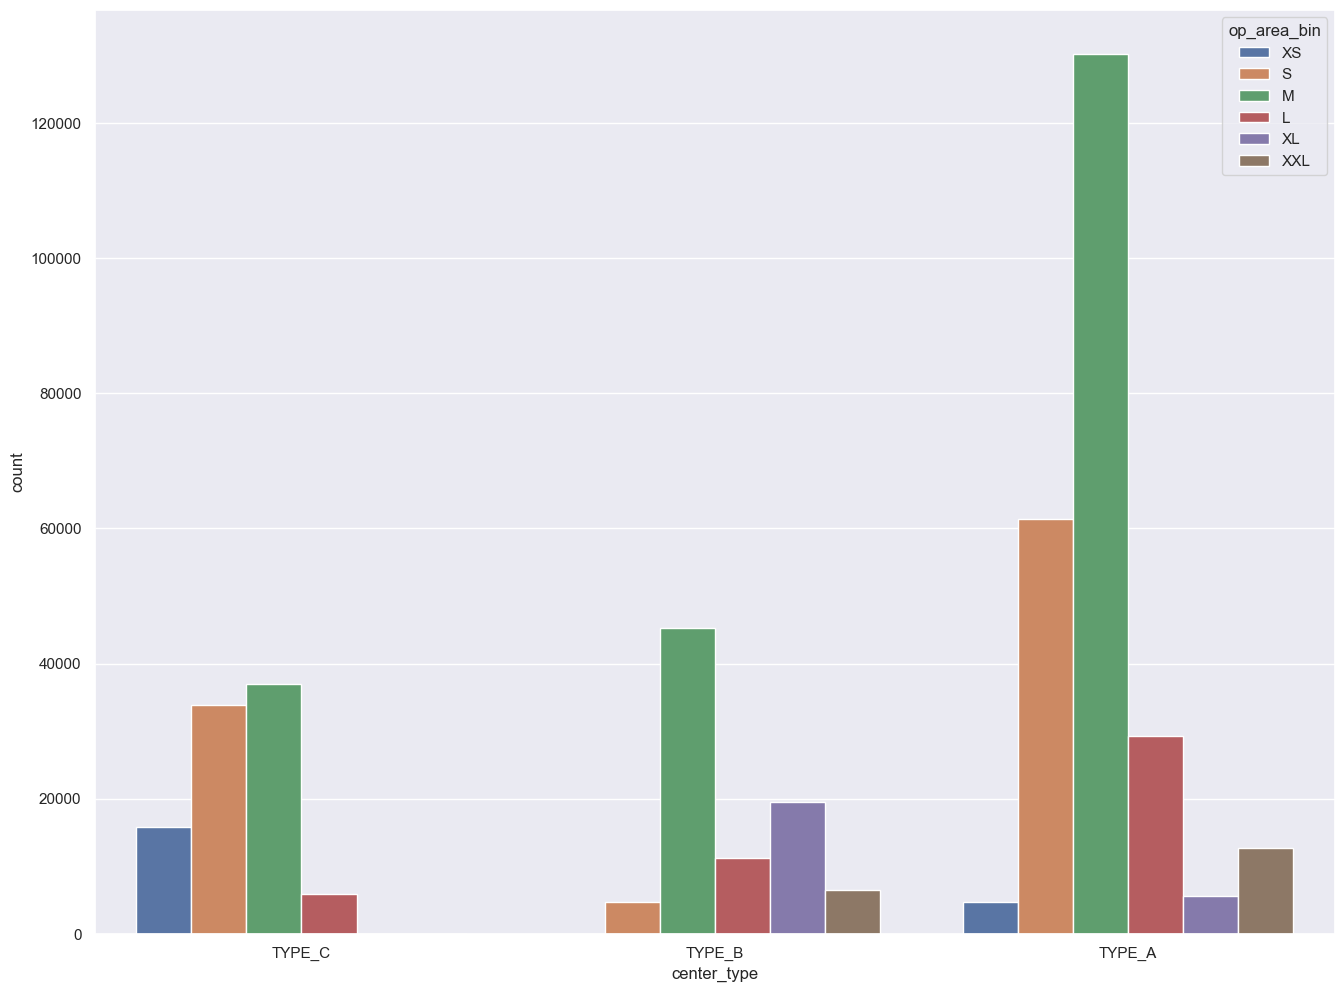

In [200]:
sns.countplot(x="center_type", hue="op_area_bin", data=full_train_data)


C:\Users\Devy\AppData\Local\Temp\ipykernel_10844\879893597.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data_area_bin = full_train_data.groupby(['center_type', 'op_area_bin'])['num_orders'].sum().reset_index()
C:\Users\Devy\anaconda3\envs\handson-ml2\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Devy\anaconda3\envs\handson-ml2\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Devy\anaconda3\envs\handson-ml

<Axes: xlabel='center_type', ylabel='percentage'>

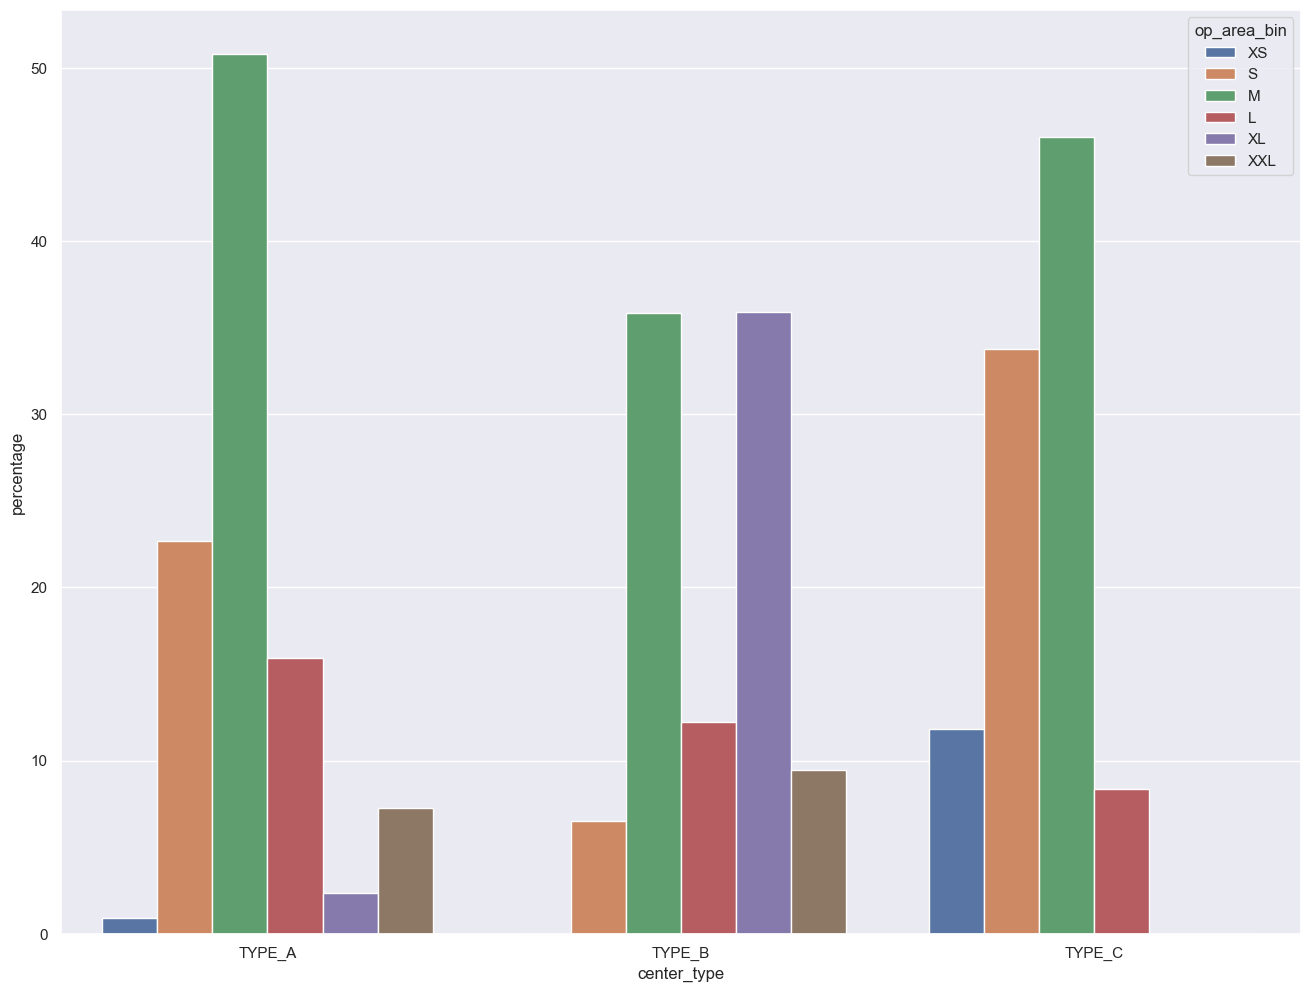

In [201]:
grouped_data_area_bin = full_train_data.groupby(['center_type', 'op_area_bin'])['num_orders'].sum().reset_index()
grouped_data_area_bin = grouped_data_area_bin.merge(total_orders_by_center, on='center_type', suffixes=('', '_total'))
grouped_data_area_bin["percentage"] = grouped_data_area_bin["num_orders"] / grouped_data_area_bin[
    "num_orders_total"] * 100
sns.barplot(x="center_type", y="percentage", hue="op_area_bin", data=grouped_data_area_bin)


In [202]:
op_area_bin_encoded = pd.get_dummies(full_train_data['op_area_bin'], prefix='op_area')
op_area_bin_encoded


,op_area_XS,op_area_S,op_area_M,op_area_L,op_area_XL,op_area_XXL
0,True,False,False,False,False,False
1,True,False,False,False,False,False
2,True,False,False,False,False,False
3,True,False,False,False,False,False
4,True,False,False,False,False,False
...,...,...,...,...,...,...
423722,False,False,True,False,False,False
423723,False,False,True,False,False,False
423724,False,False,True,False,False,False
423725,False,False,True,False,False,False


In [203]:
full_train_data = pd.concat([full_train_data, op_area_bin_encoded], axis=1)

In [204]:
full_train_data


,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,...,op_area,category,cuisine,op_area_bin,op_area_XS,op_area_S,op_area_M,op_area_L,op_area_XL,op_area_XXL
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,...,2.0,Beverages,Thai,XS,True,False,False,False,False,False
1,1018704,2,55,1885,135.83,152.29,0,0,323,647,...,2.0,Beverages,Thai,XS,True,False,False,False,False,False
2,1196273,3,55,1885,132.92,133.92,0,0,96,647,...,2.0,Beverages,Thai,XS,True,False,False,False,False,False
3,1116527,4,55,1885,135.86,134.86,0,0,163,647,...,2.0,Beverages,Thai,XS,True,False,False,False,False,False
4,1343872,5,55,1885,146.50,147.50,0,0,215,647,...,2.0,Beverages,Thai,XS,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423722,1282954,131,61,2104,445.29,630.53,0,1,270,473,...,4.5,Fish,Continental,M,False,False,True,False,False,False
423723,1094245,132,61,2104,435.53,630.53,0,1,339,473,...,4.5,Fish,Continental,M,False,False,True,False,False,False
423724,1380866,133,61,2104,601.43,630.53,0,1,107,473,...,4.5,Fish,Continental,M,False,False,True,False,False,False
423725,1111394,134,61,2104,600.43,631.53,0,1,41,473,...,4.5,Fish,Continental,M,False,False,True,False,False,False


In [205]:
new_corrs = full_train_data.corr(numeric_only=True)
new_corrs['num_orders']


id                       0.000882
week                    -0.007385
center_id               -0.051274
meal_id                  0.012068
checkout_price          -0.283021
base_price              -0.221294
emailer_for_promotion    0.283221
homepage_featured        0.299080
num_orders               1.000000
city_code                0.041156
region_code              0.029848
op_area                  0.174464
op_area_XS              -0.068841
op_area_S               -0.047229
op_area_M               -0.050583
op_area_L                0.057217
op_area_XL               0.122118
op_area_XXL              0.064285
Name: num_orders, dtype: float64

Binning the op_area did not give additional insights. Compared to the number of centers in each type all have similar spread of small/medium/large op_areas.

Looking at the correlations of a bin or one hot encoded values with the target is not valid as it will show a linear correlation only (how well it goes up or down with the target). However, a low linear correlation does not mean the bin or encoding is bad. It might still give better results in the ML training if it simplifies the process for the algorithm without losing too much data.

We should test ML results with the bin or without it. We should also test with a smaller bin size. A larger bin size means losing more data and finesse.

# Let's look at data related to cuisine and category. Which cuisine falls in which category and other things here

C:\Users\Devy\anaconda3\envs\handson-ml2\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Devy\anaconda3\envs\handson-ml2\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Devy\anaconda3\envs\handson-ml2\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Devy\anaconda3\envs\handson-ml2\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isin

<Axes: xlabel='category', ylabel='num_orders'>

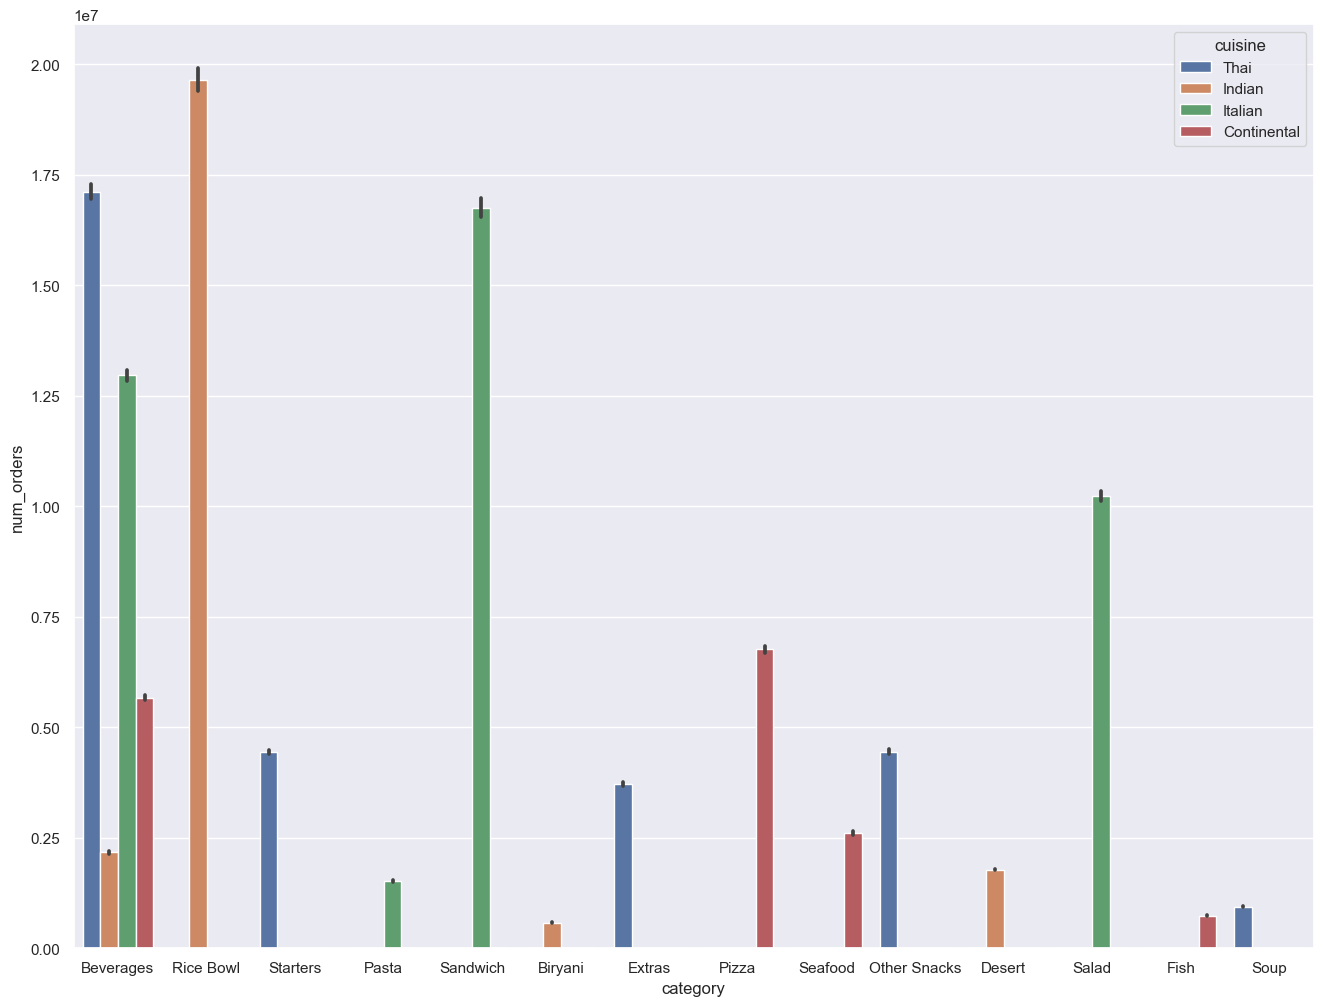

In [206]:
sns.barplot(x="category", y="num_orders", hue="cuisine", data=full_train_data, estimator="sum")

C:\Users\Devy\anaconda3\envs\handson-ml2\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Devy\anaconda3\envs\handson-ml2\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Devy\anaconda3\envs\handson-ml2\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Devy\anaconda3\envs\handson-ml2\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isin

<Axes: xlabel='category', ylabel='count'>

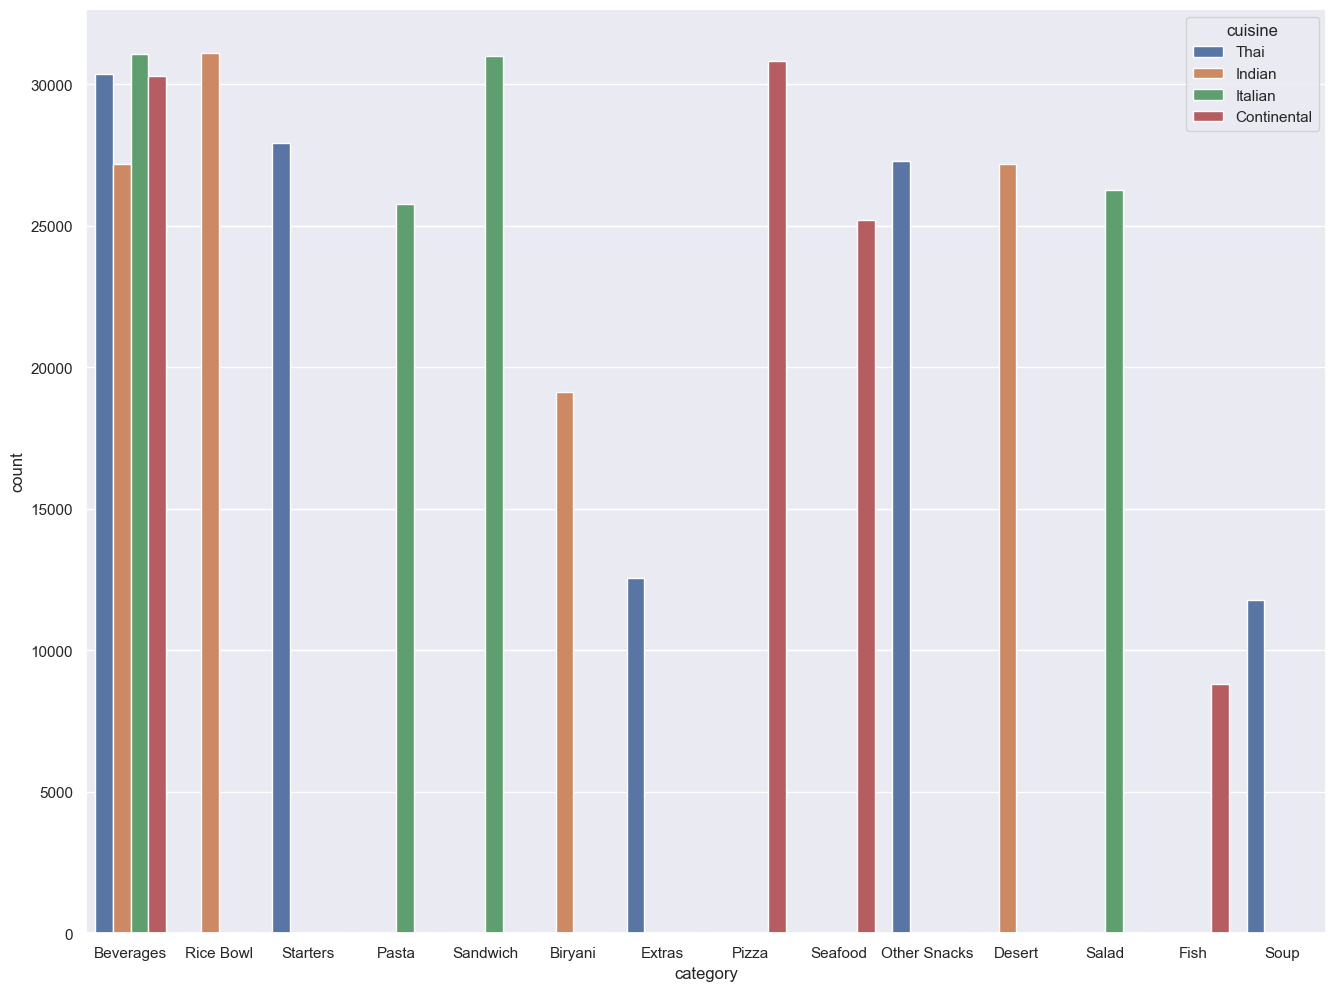

In [207]:
sns.countplot(x="category", hue="cuisine", data=full_train_data)


C:\Users\Devy\anaconda3\envs\handson-ml2\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Devy\anaconda3\envs\handson-ml2\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Devy\anaconda3\envs\handson-ml2\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Devy\anaconda3\envs\handson-ml2\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isin

<Axes: xlabel='category', ylabel='count'>

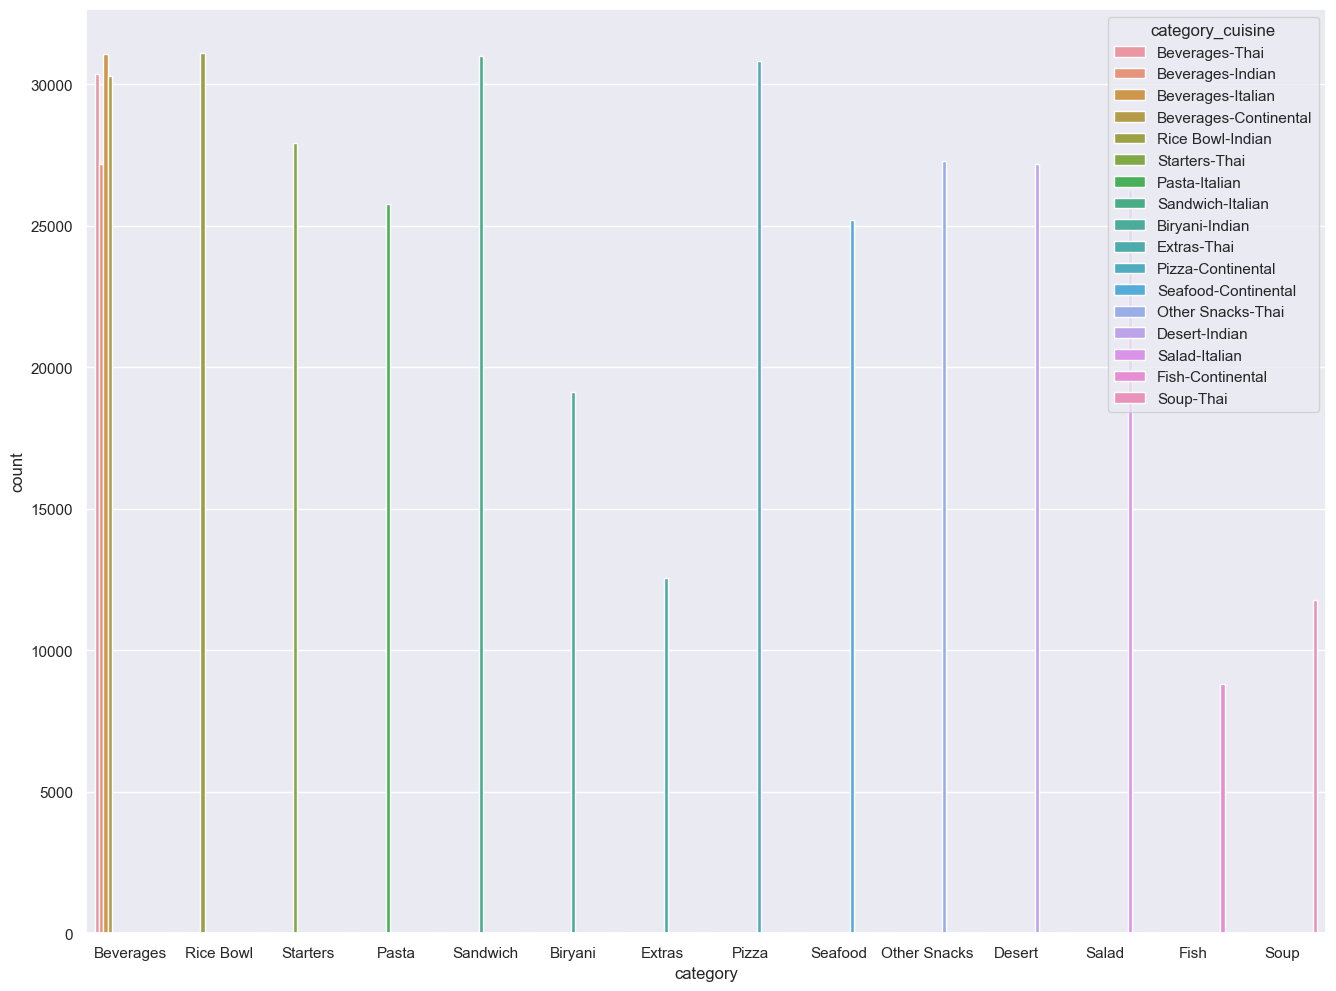

In [208]:
full_train_data["category_cuisine"] = full_train_data['category'] + "-" + full_train_data['cuisine']
sns.countplot(x="category", hue="category_cuisine", data=full_train_data)

OBSERVATIONS:
By looking at the cuisine/category, we can see we only have 4 cuisines.
Beverages category is the only category that has meals from every cuisine.
The rest of the categories only have means from a single cuisine (Pasta category on contains Italian meals, logically).
The cuisine diversity of the beverages category clearly is a factor in the increased sales of beverages as it tells us that almost all centers have beverages regardless of cuisine speciality. However, if a center sells only italian food it will sell Pasta and only other italian things.

## Let's check the center type/cuisine connection. We want to understand if certain center or center Types specialize in a cuisine

In [209]:
full_train_data.groupby(["center_id", "cuisine"])["num_orders"].sum()


center_id  cuisine    
10         Continental     361764
           Indian          797858
           Italian        1038325
           Thai            944135
11         Continental     278663
                           ...   
177        Thai            175590
186        Continental     143717
           Indian          174316
           Italian         297672
           Thai            175261
Name: num_orders, Length: 308, dtype: int64

It is clear from the above, that individual centers do NOT have a speciality. Each center sells food from all the 4 cuisines.
Let's check if there's any relation with center type, although I don't expect there to be one, and we believe we'll see the same thing

In [210]:
full_train_data.groupby(["center_type", "cuisine"])["num_orders"].sum()


center_type  cuisine    
TYPE_A       Continental     9227232
             Indian         13628151
             Italian        23288443
             Thai           18630979
TYPE_B       Continental     3276501
             Indian          6484675
             Italian         9312407
             Thai            8918225
TYPE_C       Continental     3267307
             Indian          4071251
             Italian         8872107
             Thai            3119927
Name: num_orders, dtype: int64

C:\Users\Devy\anaconda3\envs\handson-ml2\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Devy\anaconda3\envs\handson-ml2\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Devy\anaconda3\envs\handson-ml2\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Devy\anaconda3\envs\handson-ml2\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isin

<Axes: xlabel='center_type', ylabel='num_orders'>

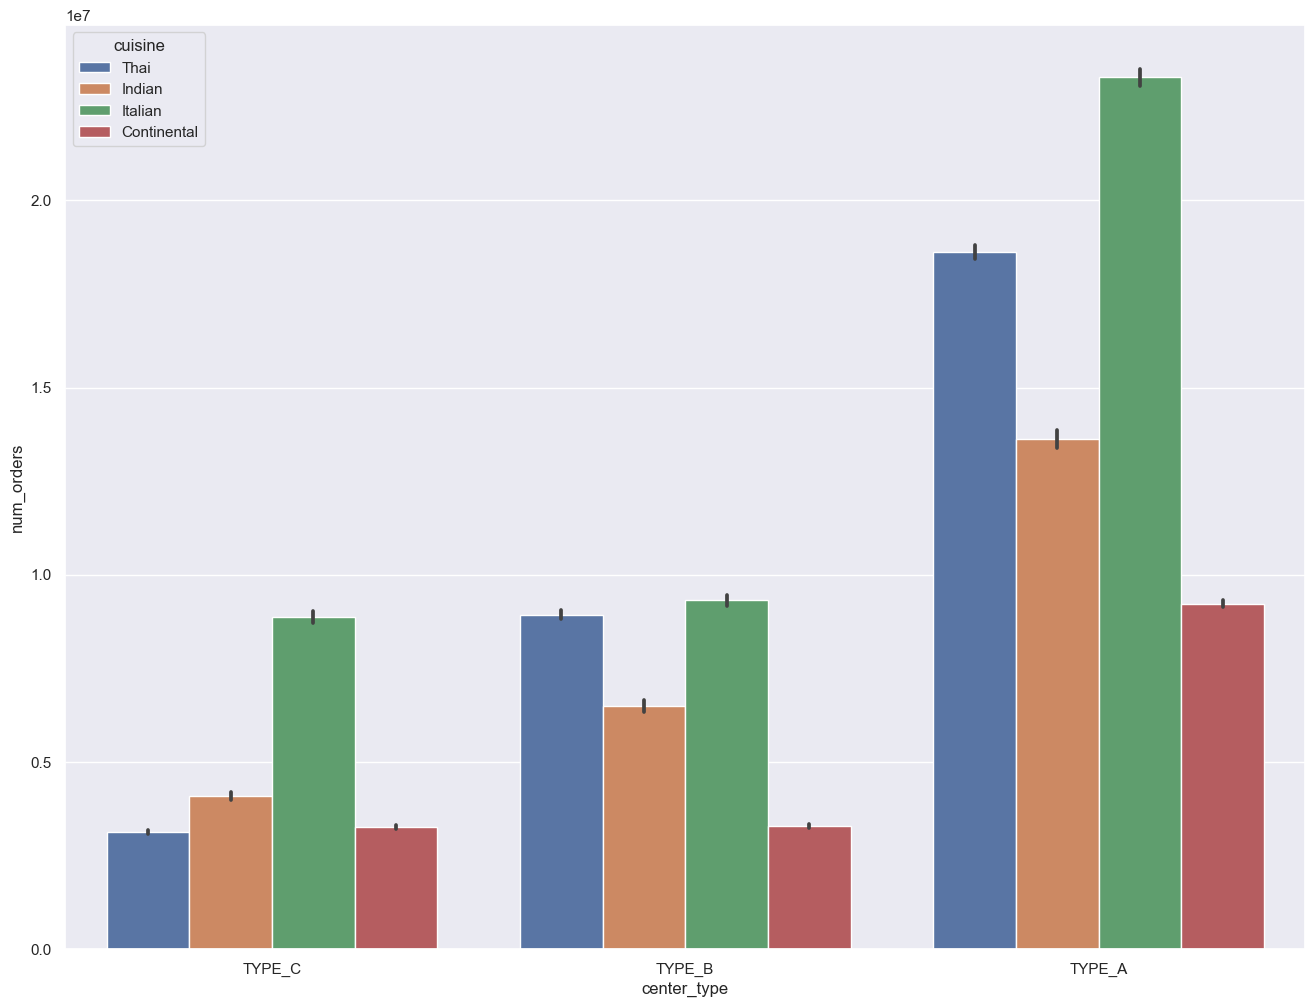

In [211]:
sns.barplot(x="center_type", y="num_orders", hue="cuisine", data=full_train_data, estimator="sum")


C:\Users\Devy\anaconda3\envs\handson-ml2\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Devy\anaconda3\envs\handson-ml2\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Devy\anaconda3\envs\handson-ml2\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Devy\anaconda3\envs\handson-ml2\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isin

<Axes: xlabel='center_type', ylabel='percentage'>

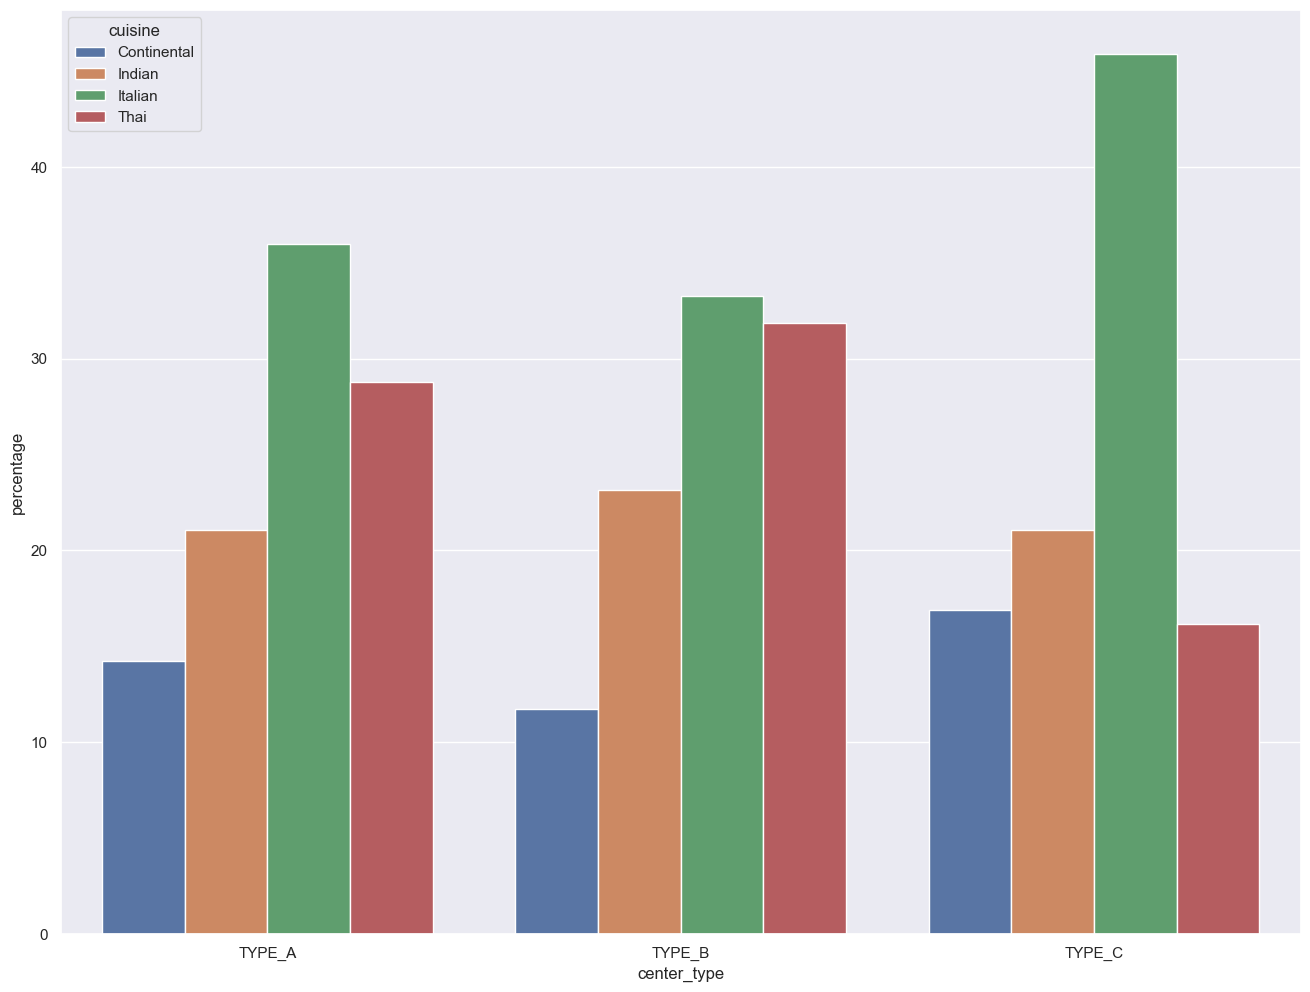

In [212]:
grouped_data_cuisine = full_train_data.groupby(['center_type', 'cuisine'])['num_orders'].sum().reset_index()
grouped_data_cuisine = grouped_data_cuisine.merge(total_orders_by_center, on='center_type', suffixes=('', '_total'))
grouped_data_cuisine["percentage"] = grouped_data_cuisine["num_orders"] / grouped_data_cuisine["num_orders_total"] * 100
sns.barplot(x="center_type", y="percentage", hue="cuisine", data=grouped_data_cuisine)


C:\Users\Devy\anaconda3\envs\handson-ml2\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Devy\anaconda3\envs\handson-ml2\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Devy\anaconda3\envs\handson-ml2\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Devy\anaconda3\envs\handson-ml2\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isin

<Axes: xlabel='center_type', ylabel='percentage'>

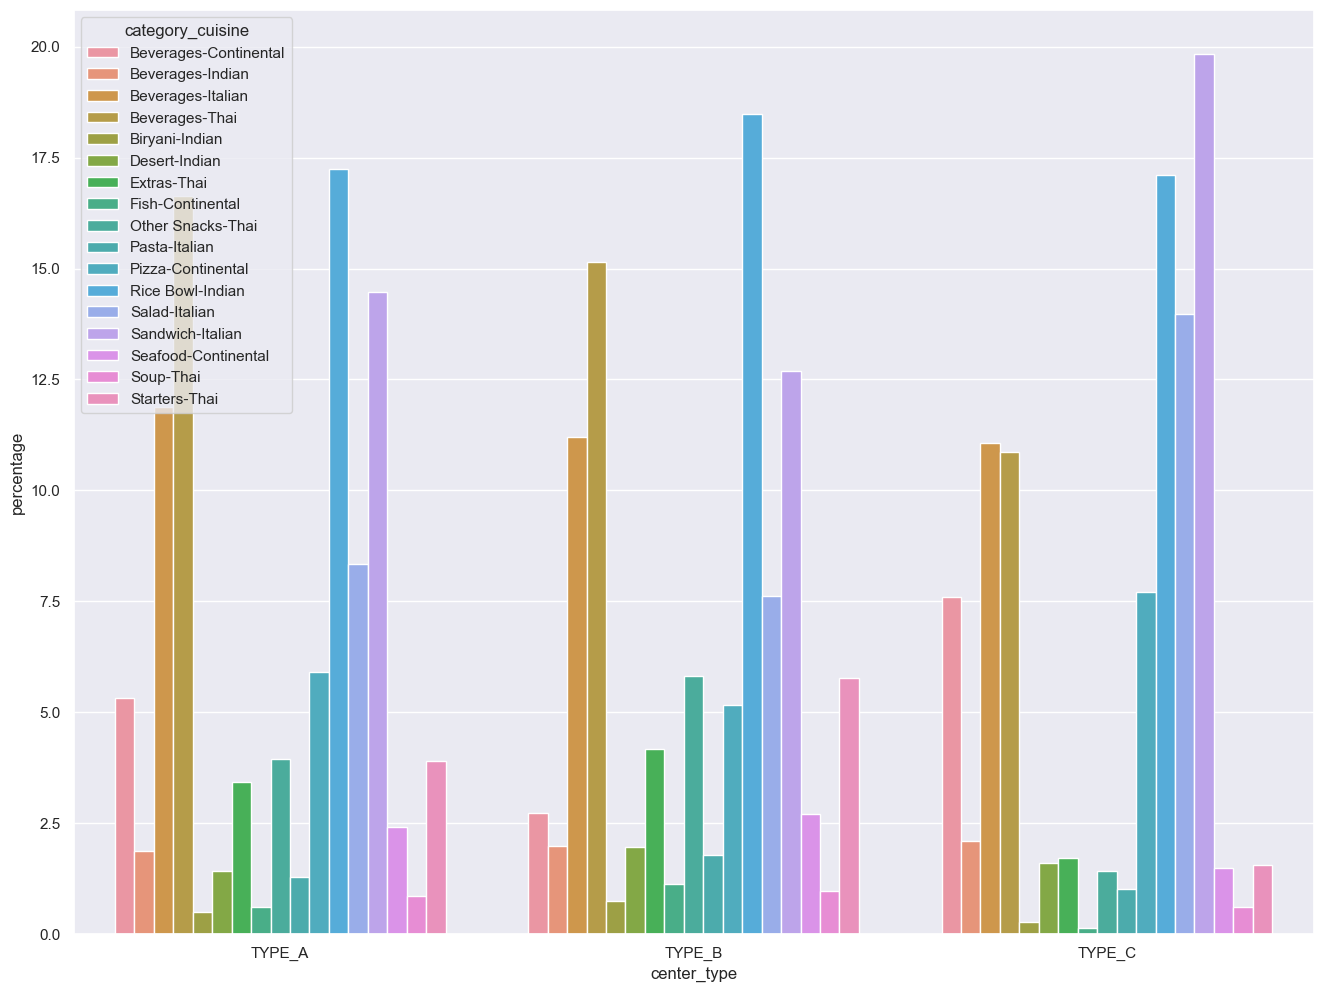

In [213]:
grouped_data_cuisine_cat = full_train_data.groupby(['center_type', 'category_cuisine'])[
    'num_orders'].sum().reset_index()
grouped_data_cuisine_cat = grouped_data_cuisine_cat.merge(total_orders_by_center, on='center_type',
                                                          suffixes=('', '_total'))
grouped_data_cuisine_cat["percentage"] = grouped_data_cuisine_cat["num_orders"] / grouped_data_cuisine_cat[
    "num_orders_total"] * 100
sns.barplot(x="center_type", y="percentage", hue="category_cuisine", data=grouped_data_cuisine_cat)

OBSERVATIONS:
When looking at nr of orders, Type A and B are very similar in distribution, however Type C is the outlier.
Compared to the other, Type C sells less Thai meals that the other center types. The reason for this might be location based or preference based. We can also see from an above chart that Type C sells less from Thai specific categories, notably, Type C sells less Thai Beverages, Extras, Other snacks and Starters. However, # of thai soups are fine in Type C.

The created feature category_cuisine should be checked in ML training to see if it gives better results.

# How price impacts the num_orders. Try binning that as well. Investigate price patterns compared to other features (center type, category, cuisine). Only do these if they're relevant or answer a specific business question.
EX: Are the prices in Type A center higher than type B or C? Does that mean that Type A are "luxury" centers?

C:\Users\Devy\anaconda3\envs\handson-ml2\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Devy\anaconda3\envs\handson-ml2\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Devy\anaconda3\envs\handson-ml2\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


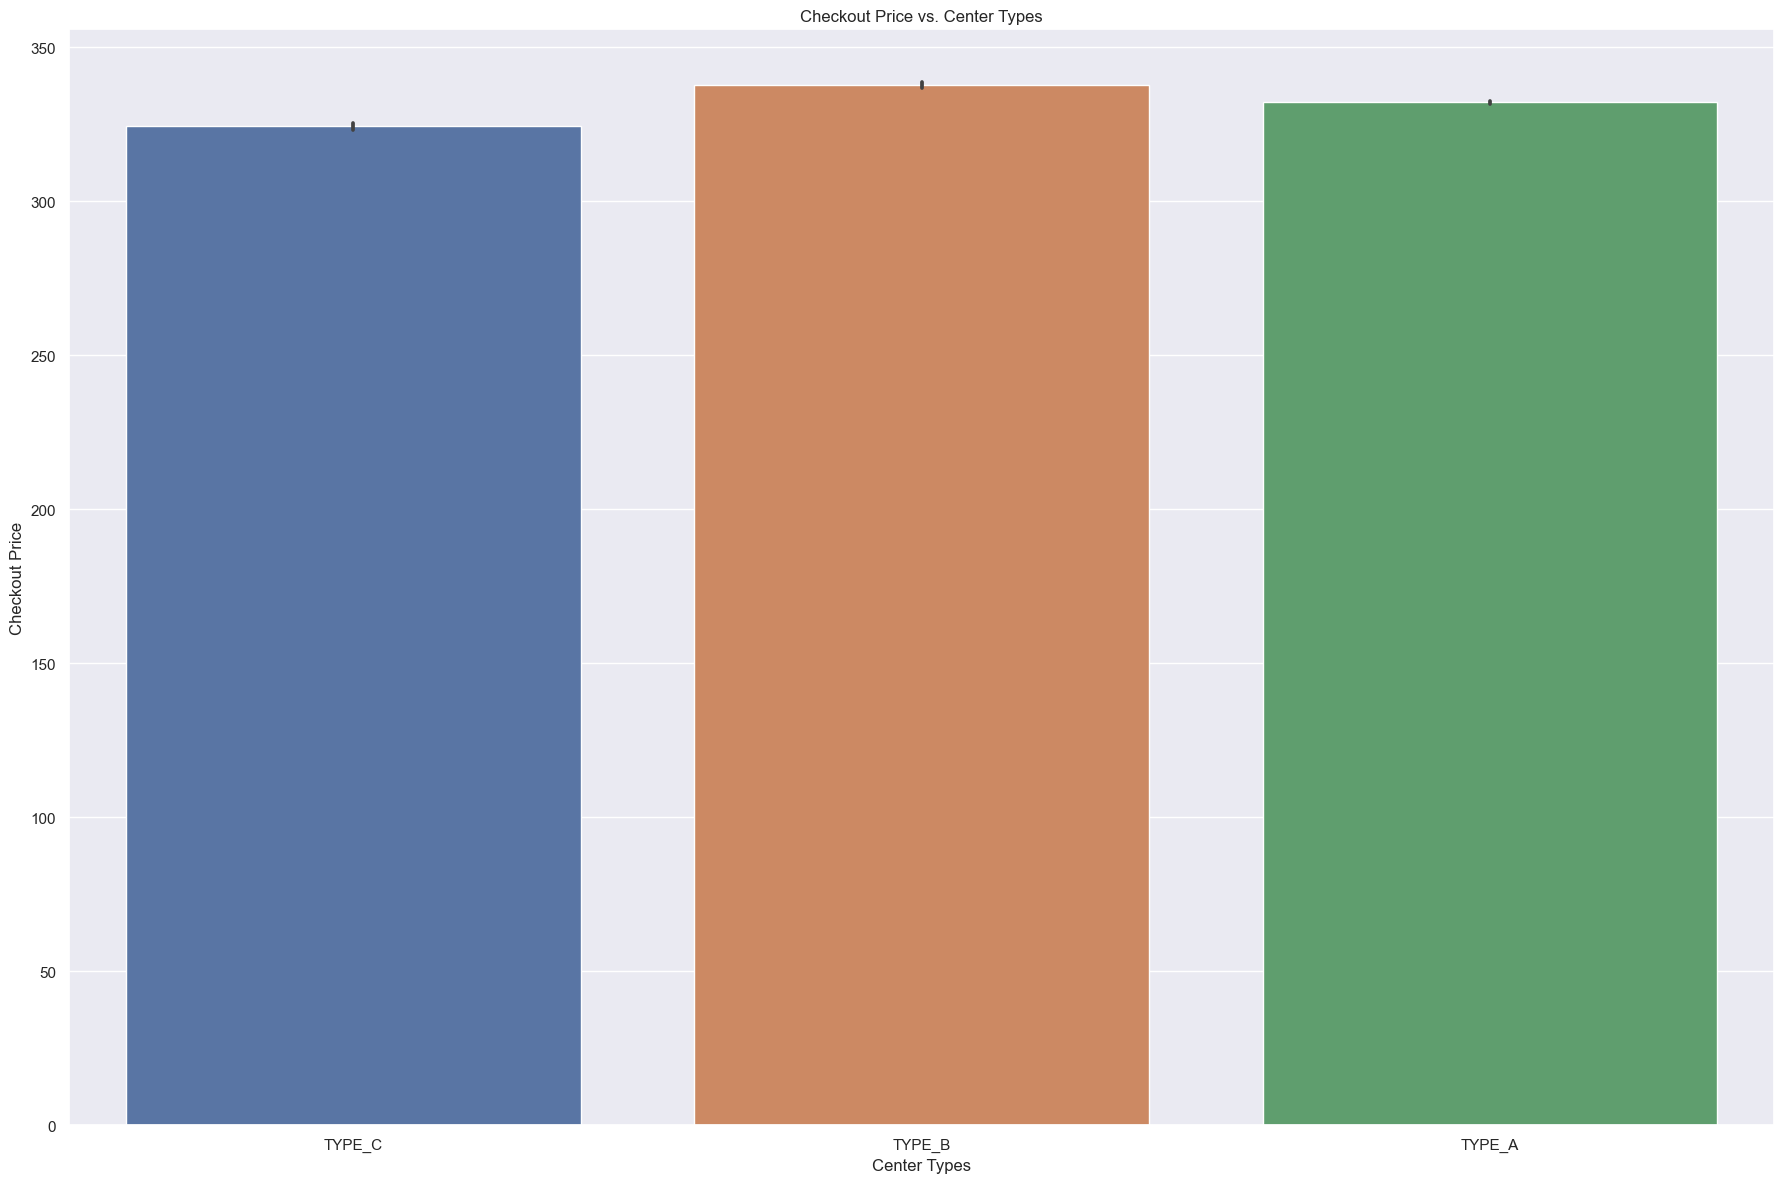

In [214]:
plt.figure(figsize=(18, 12))
sns.barplot(x='center_type', y='checkout_price', data=full_train_data)
plt.title('Checkout Price vs. Center Types')
plt.xlabel('Center Types')
plt.ylabel('Checkout Price')
plt.tight_layout()
plt.show()


#### These average prices per center types do not really vary, they are close to each other, between 320-350.
### Let's see these averages by categories too.


C:\Users\Devy\anaconda3\envs\handson-ml2\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Devy\anaconda3\envs\handson-ml2\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Devy\anaconda3\envs\handson-ml2\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Devy\anaconda3\envs\handson-ml2\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isin

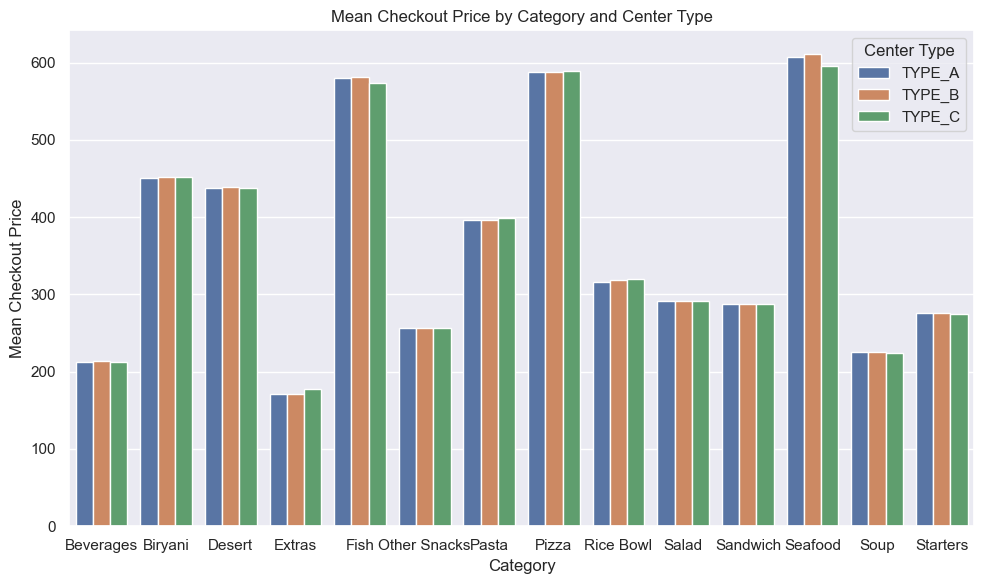

In [215]:
mean_prices = full_train_data.groupby(['center_type', 'category'])['checkout_price'].mean().reset_index()
# Pivot the data to have center types as columns and categories as rows
pivot_table = mean_prices.pivot_table(index='category', columns='center_type', values='checkout_price')

plt.figure(figsize=(10, 6))
sns.barplot(x='category', y='checkout_price', hue='center_type', data=mean_prices)
plt.title('Mean Checkout Price by Category and Center Type')
plt.xlabel('Category')
plt.ylabel('Mean Checkout Price')

plt.tight_layout()
plt.legend(title='Center Type')

plt.show()

##### As the averages by types showed that they are similar, the same this is shown here, by categories. Each type center sells each product with almost the same average price. Foods like Seafood, Fish and Pizza are the most expensive categories, while the Soups, Beverages and Extras as the least expensive.

###### Let's see the minimum/maximum checkout price for each center type.

In [216]:
#max price for each center type
max_prices = full_train_data.groupby('center_type')['checkout_price'].max()

#min price for each center type
min_prices = full_train_data.groupby('center_type')['checkout_price'].min()

max_prices, min_prices

(center_type
 TYPE_A    866.27
 TYPE_B    767.33
 TYPE_C    767.33
 Name: checkout_price, dtype: float64,
 center_type
 TYPE_A     2.97
 TYPE_B    53.41
 TYPE_C    45.62
 Name: checkout_price, dtype: float64)

#### The maximum checkout prices are close to each other, only Type A has a higher one, while on the other hand, looking at the minimum prices, Type A has a very low lowest price, compared to B and C.  This means that center type A which sells the most and have the most centers does not mean that it also have very expensive products compared to types B and C.

#### Maybe seeing the frequency of the checkout prices split into bins can give us relevant info.

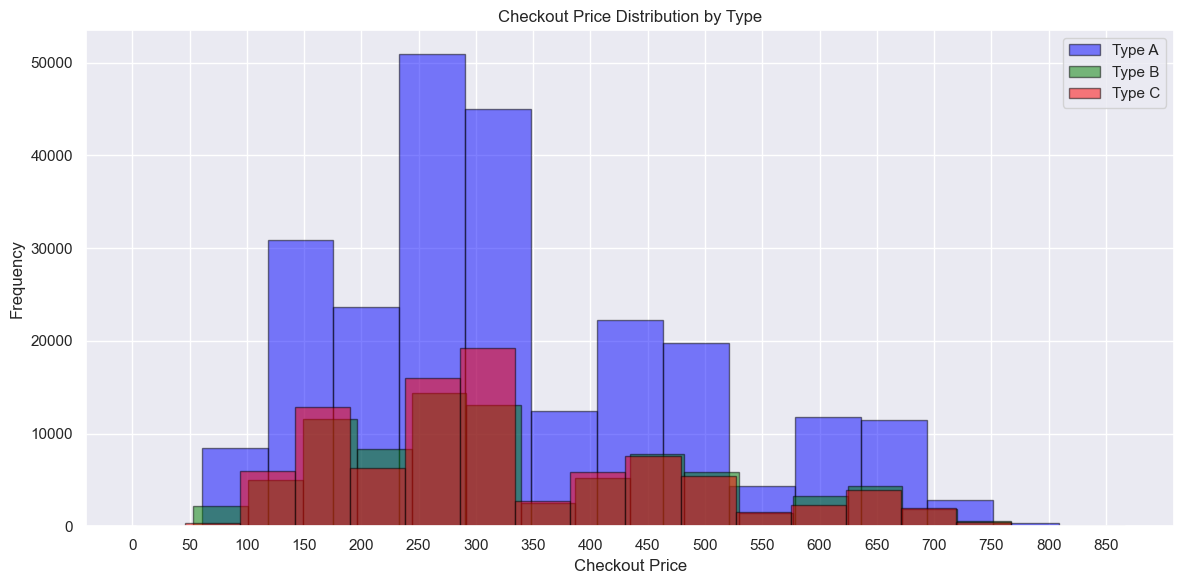

In [217]:
# Separate data by type
type_a_data = full_train_data[full_train_data['center_type'] == 'TYPE_A']
type_b_data = full_train_data[full_train_data['center_type'] == 'TYPE_B']
type_c_data = full_train_data[full_train_data['center_type'] == 'TYPE_C']

# Create histograms for each type
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
plt.hist(type_a_data['checkout_price'], bins=15, color='blue', alpha=0.5, label='Type A', edgecolor='black')
plt.hist(type_b_data['checkout_price'], bins=15, color='green', alpha=0.5, label='Type B', edgecolor='black')
plt.hist(type_c_data['checkout_price'], bins=15, color='red', alpha=0.5, label='Type C', edgecolor='black')

plt.title('Checkout Price Distribution by Type')
plt.xlabel('Checkout Price')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.xticks(range(0, 900, 50))
plt.show()

#### This plot can show the frequency of the checkout prices and how they are spread along the three types of centers and as we already know, type A sells most and have most center, therefore it has the highest frequency. Although, all three centers have a similar structure, Types B and C are almost identical, but the "shape" is similar. The highest peaks for all are encountered at prices between 250-350. There is a tendency for the center types to sell products with smaller price (till 350), rather than the ones from 400 and so on.

### Let's see all the previous plots, but for the base price. In this way, we can follow up if there are trends for ordering more when certain discounts are applied or products are promoted via email/webpage.

C:\Users\Devy\anaconda3\envs\handson-ml2\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Devy\anaconda3\envs\handson-ml2\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Devy\anaconda3\envs\handson-ml2\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


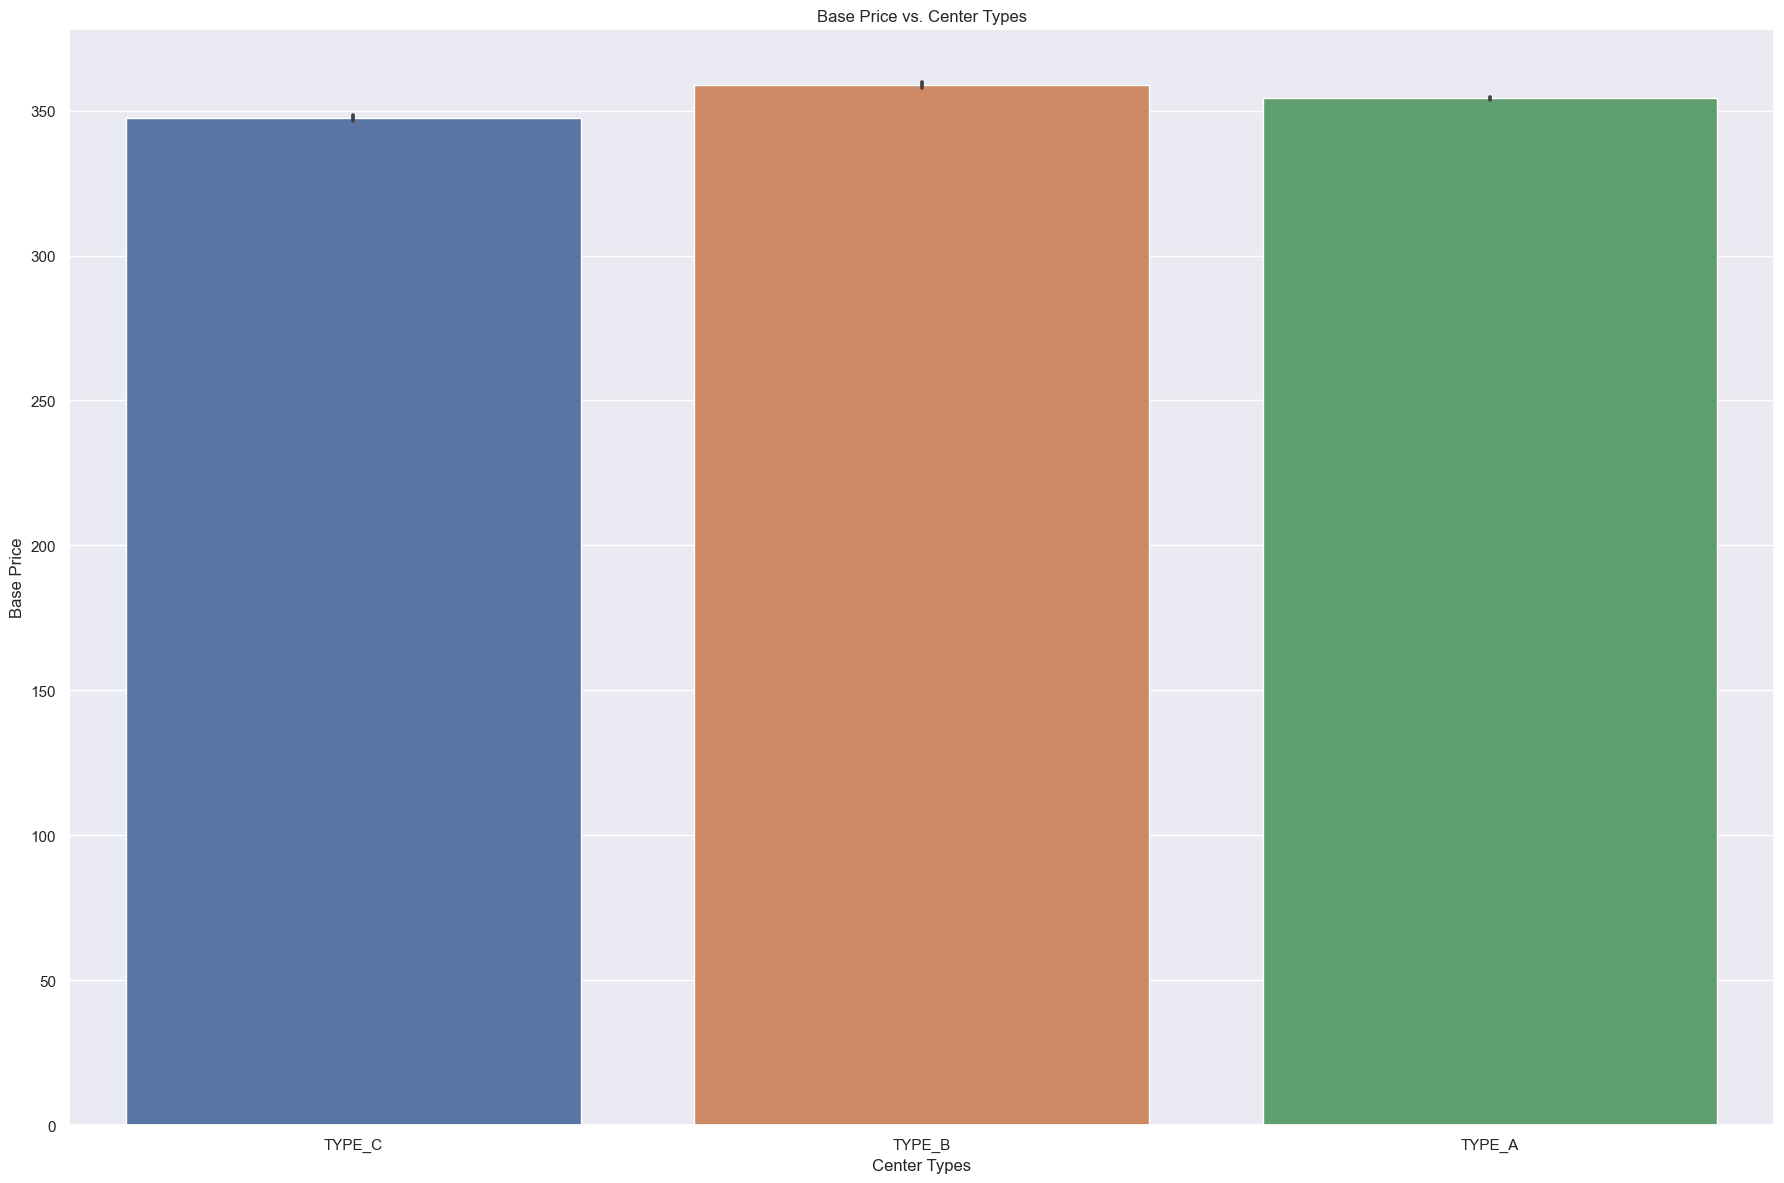

In [218]:
plt.figure(figsize=(18, 12))
sns.barplot(x='center_type', y='base_price', data=full_train_data)
plt.title('Base Price vs. Center Types')
plt.xlabel('Center Types')
plt.ylabel('Base Price')
plt.tight_layout()
plt.show()


#### The situation is similar to the checkout price plot, where Type B has the highest base price, followed by Type A and Type C, but all three of them are close, being situated between 340 and 360. (this range for checkout price was 320-250)

### Averages by categories:

C:\Users\Devy\anaconda3\envs\handson-ml2\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Devy\anaconda3\envs\handson-ml2\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Devy\anaconda3\envs\handson-ml2\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Devy\anaconda3\envs\handson-ml2\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isin

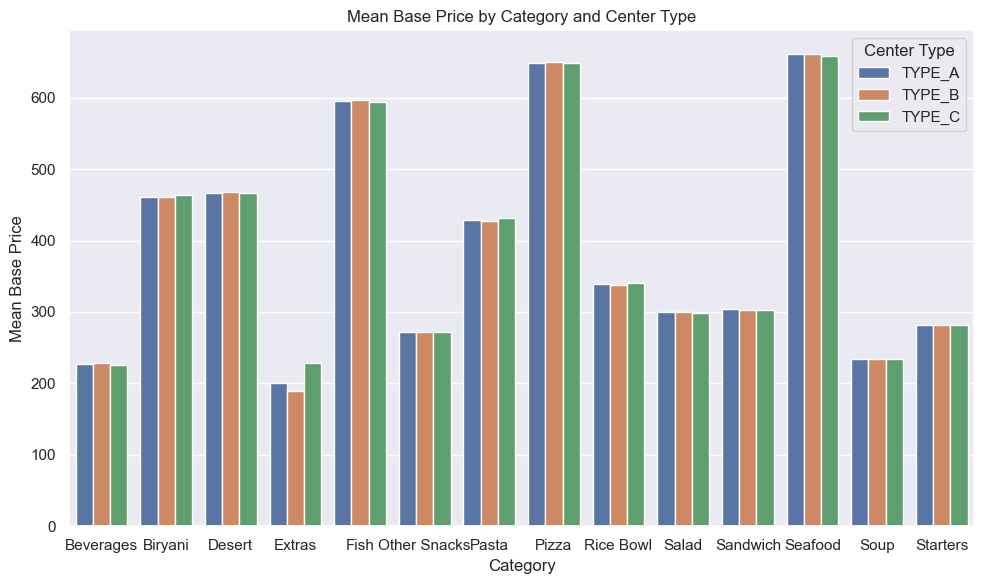

In [219]:
mean_prices = full_train_data.groupby(['center_type', 'category'])['base_price'].mean().reset_index()
# Pivot the data to have center types as columns and categories as rows
pivot_table = mean_prices.pivot_table(index='category', columns='center_type', values='base_price')

plt.figure(figsize=(10, 6))
sns.barplot(x='category', y='base_price', hue='center_type', data=mean_prices)
plt.title('Mean Base Price by Category and Center Type')
plt.xlabel('Category')
plt.ylabel('Mean Base Price')

plt.tight_layout()
plt.legend(title='Center Type')

plt.show()

##### Again, these bars are similar to the ones created for checkout prices, the only thing to be mentioned here would be that pizza seems to have a higher discount than the other categories, because it has the highest difference between the checkout price and base price.

### Here are the minimum/maximum prices for base prices, for each type of center:

In [220]:
#max price for each center type
max_prices = full_train_data.groupby('center_type')['base_price'].max()

#min price for each center type
min_prices = full_train_data.groupby('center_type')['base_price'].min()

max_prices, min_prices

(center_type
 TYPE_A    866.27
 TYPE_B    767.33
 TYPE_C    767.33
 Name: base_price, dtype: float64,
 center_type
 TYPE_A    65.02
 TYPE_B    84.39
 TYPE_C    55.35
 Name: base_price, dtype: float64)

#####   So, the maximum prices are identical to the ones for checkout price, but the minimum checkout prices are way different from the minimum base prices:   Checkout_price_ Type A = 2.97   and  Base_price_Type A = 65.02  (biggest discounts, wow, maybe Type A give the best discounts, we should definitely investigate that), Checkout_price_Type B = 53.41 and Base_price_Type B = 84.39 (again, here it can be observed that it offers big discounts), Checkout_price_Type C = 55.35 and Base_price_Type C = 45.62 (smaller price difference)

### Let's create a new column to compare the checkout price to the base price, and if the checkout price is smaller, it means that there is a discount applied. 

In [221]:
full_train_data['is_discount'] = (full_train_data['checkout_price'] < full_train_data['base_price']).astype(int)

In [222]:
full_train_data

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,...,cuisine,op_area_bin,op_area_XS,op_area_S,op_area_M,op_area_L,op_area_XL,op_area_XXL,category_cuisine,is_discount
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,...,Thai,XS,True,False,False,False,False,False,Beverages-Thai,1
1,1018704,2,55,1885,135.83,152.29,0,0,323,647,...,Thai,XS,True,False,False,False,False,False,Beverages-Thai,1
2,1196273,3,55,1885,132.92,133.92,0,0,96,647,...,Thai,XS,True,False,False,False,False,False,Beverages-Thai,1
3,1116527,4,55,1885,135.86,134.86,0,0,163,647,...,Thai,XS,True,False,False,False,False,False,Beverages-Thai,0
4,1343872,5,55,1885,146.50,147.50,0,0,215,647,...,Thai,XS,True,False,False,False,False,False,Beverages-Thai,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423722,1282954,131,61,2104,445.29,630.53,0,1,270,473,...,Continental,M,False,False,True,False,False,False,Fish-Continental,1
423723,1094245,132,61,2104,435.53,630.53,0,1,339,473,...,Continental,M,False,False,True,False,False,False,Fish-Continental,1
423724,1380866,133,61,2104,601.43,630.53,0,1,107,473,...,Continental,M,False,False,True,False,False,False,Fish-Continental,1
423725,1111394,134,61,2104,600.43,631.53,0,1,41,473,...,Continental,M,False,False,True,False,False,False,Fish-Continental,1


##### How many values have discounts?  

In [223]:
full_train_data['is_discount'].value_counts()

is_discount
1    214227
0    209500
Name: count, dtype: int64

#### 50% of them have discounts!

##### But how are they distributed along center types? 

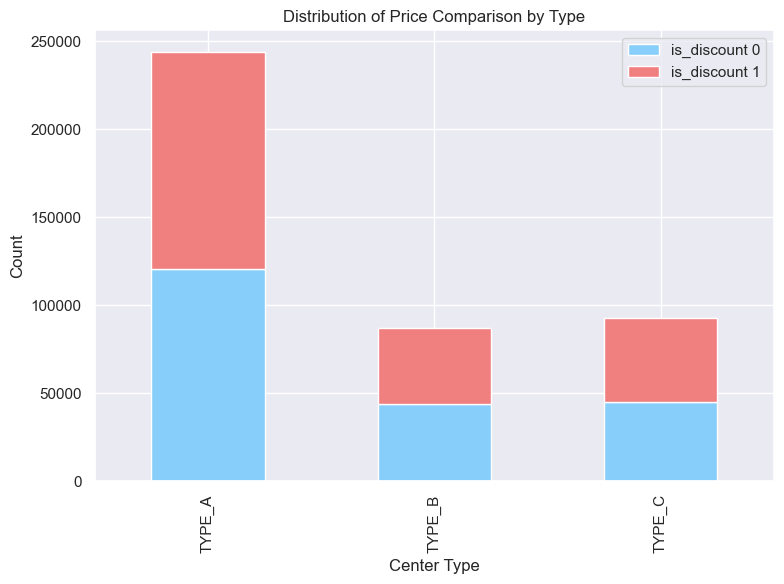

In [224]:
grouped_data = full_train_data.groupby(['center_type', 'is_discount']).size().unstack(fill_value=0)

ax = grouped_data.plot(kind='bar', figsize=(8, 6), stacked=True, color=['lightskyblue', 'lightcoral'])
plt.title('Distribution of Price Comparison by Type')
plt.xlabel('Center Type')
plt.ylabel('Count')
plt.legend(['is_discount 0', 'is_discount 1'])
plt.tight_layout()
plt.show()

#### Looks like they all have about 50% discounts and 50% without discounts, at different scales, becauze A sells the most and have the most number of center.

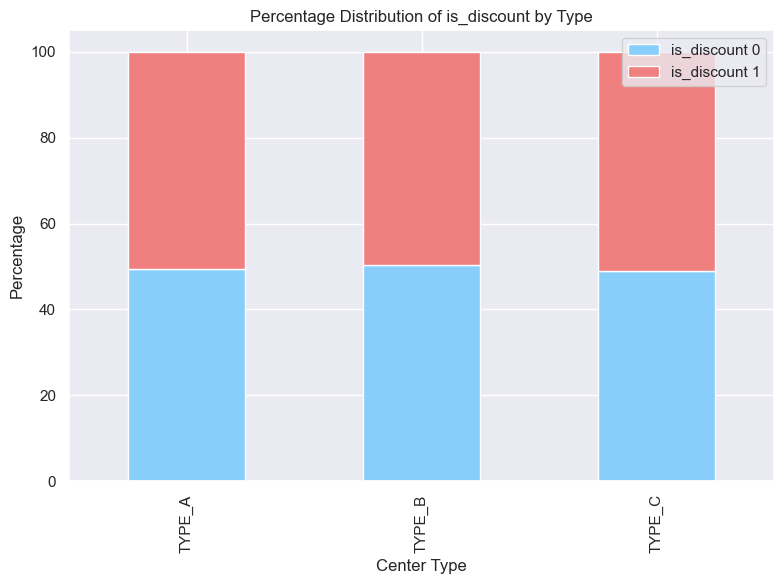

In [225]:
percentages = grouped_data.div(grouped_data.sum(axis=1), axis=0) * 100

ax = percentages.plot(kind='bar', figsize=(8, 6), stacked=True, color=['lightskyblue', 'lightcoral'])

plt.title('Percentage Distribution of is_discount by Type')
plt.xlabel('Center Type')
plt.ylabel('Percentage')
plt.legend(['is_discount 0', 'is_discount 1'], loc='upper right')

plt.tight_layout()
plt.show()

##### Analyzing the percentages, they are similar, around 50% discount, 50% non-discount for all center types. Let's see what is the average discount per center type by first introducing a new column in the dataset that calculates the difference between base price and checkout price, then where this difference is positive, or when is_discount column is equal to one, the data is grouped and mean() function applied.

In [226]:
full_train_data['discount_value'] = full_train_data['base_price'] - full_train_data['checkout_price']


In [227]:
full_train_data

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,...,op_area_bin,op_area_XS,op_area_S,op_area_M,op_area_L,op_area_XL,op_area_XXL,category_cuisine,is_discount,discount_value
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,...,XS,True,False,False,False,False,False,Beverages-Thai,1,15.46
1,1018704,2,55,1885,135.83,152.29,0,0,323,647,...,XS,True,False,False,False,False,False,Beverages-Thai,1,16.46
2,1196273,3,55,1885,132.92,133.92,0,0,96,647,...,XS,True,False,False,False,False,False,Beverages-Thai,1,1.00
3,1116527,4,55,1885,135.86,134.86,0,0,163,647,...,XS,True,False,False,False,False,False,Beverages-Thai,0,-1.00
4,1343872,5,55,1885,146.50,147.50,0,0,215,647,...,XS,True,False,False,False,False,False,Beverages-Thai,1,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423722,1282954,131,61,2104,445.29,630.53,0,1,270,473,...,M,False,False,True,False,False,False,Fish-Continental,1,185.24
423723,1094245,132,61,2104,435.53,630.53,0,1,339,473,...,M,False,False,True,False,False,False,Fish-Continental,1,195.00
423724,1380866,133,61,2104,601.43,630.53,0,1,107,473,...,M,False,False,True,False,False,False,Fish-Continental,1,29.10
423725,1111394,134,61,2104,600.43,631.53,0,1,41,473,...,M,False,False,True,False,False,False,Fish-Continental,1,31.10


In [228]:
average_discount_by_type = full_train_data[full_train_data['is_discount'] == 1].groupby('center_type')[
    'discount_value'].mean()

In [229]:
average_discount_by_type

center_type
TYPE_A    44.821060
TYPE_B    43.558489
TYPE_C    46.093223
Name: discount_value, dtype: float64

##### Again, nothing very special, Type A did not give higher discounts than the other two center types, they are similar. 

### Let's analyze the emailer_for_promotion and homepage_featured, maybe we can find interesting insights related to them.

In [230]:
full_train_data['emailer_for_promotion'].value_counts()

emailer_for_promotion
0    388408
1     35319
Name: count, dtype: int64

In [231]:
full_train_data['homepage_featured'].value_counts()

homepage_featured
0    376560
1     47167
Name: count, dtype: int64

#### We observed earlier that ~50% of the total orders have discounts. Now, 8% were promoted via email and almost 11% on homepage.

In [232]:
promotion_email = full_train_data[(full_train_data['emailer_for_promotion'] == 1)].groupby(['center_type'])[
    'is_discount'].count()

In [233]:
promotion_email

center_type
TYPE_A    20170
TYPE_B     7034
TYPE_C     8115
Name: is_discount, dtype: int64

In [234]:
promotion_homepage = full_train_data[(full_train_data['homepage_featured'] == 1)].groupby(['center_type'])[
    'is_discount'].count()

In [235]:
promotion_homepage

center_type
TYPE_A    28727
TYPE_B     9841
TYPE_C     8599
Name: is_discount, dtype: int64

##### Looks like Type A is more promoted via email and homepage than the others. It's like 3x more promoted. Maybe it has to do with the fact that there are more centers? 

In [236]:
promotion_email = \
full_train_data[(full_train_data['is_discount']) == 1 & (full_train_data['emailer_for_promotion'] == 1)].groupby(
    ['center_type'])['discount_value'].count()

In [237]:
promotion_email

center_type
TYPE_A    139317
TYPE_B     50531
TYPE_C     52807
Name: discount_value, dtype: int64

####  Is there an effect of Email Promotions on  nr of orders? We have to calculate the average number of orders for items that were promoted through email ("emailer_for_promotion" = 1) compared to items that were not and to take conclusions about the volumes on days when emails were sent compared to when they are not.


In [238]:
average_orders_with_promotion = full_train_data[full_train_data['emailer_for_promotion'] == 1]['num_orders'].mean()
average_orders_without_promotion = full_train_data[full_train_data['emailer_for_promotion'] == 0]['num_orders'].mean()

print("Average Orders with Email Promotion:", average_orders_with_promotion)
print("Average Orders without Email Promotion:", average_orders_without_promotion)

Average Orders with Email Promotion: 643.5918627367706
Average Orders without Email Promotion: 230.0832732590472


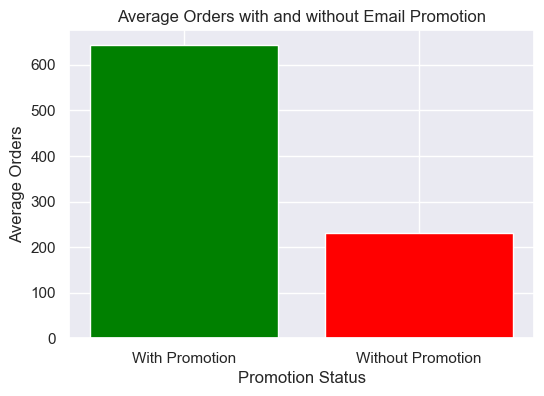

In [239]:
labels = ['With Promotion', 'Without Promotion']
average_orders = [average_orders_with_promotion, average_orders_without_promotion]
plt.figure(figsize=(6, 4))
plt.bar(labels, average_orders, color=['green', 'red'])
plt.title('Average Orders with and without Email Promotion')
plt.xlabel('Promotion Status')
plt.ylabel('Average Orders')
plt.show()

##### Interesting, we can clearly tell that the emails with promotions did a great job by generating a triple number of orders! 

#### But what is the effect of Homepage Featured on nr of orders? We have to calculate the average number of orders for items that were featured on the homepage ("homepage_featured" = 1) compared to items that were not and analyze whether featuring items on the homepage influences customers to order more.

In [240]:
# Calculate the average number of orders for homepage featured items and non-featured items
average_orders_featured = full_train_data[full_train_data['homepage_featured'] == 1]['num_orders'].mean()
average_orders_non_featured = full_train_data[full_train_data['homepage_featured'] == 0]['num_orders'].mean()

print("Average Orders with Homepage Featured Items:", average_orders_featured)
print("Average Orders without Homepage Featured Items:", average_orders_non_featured)

Average Orders with Homepage Featured Items: 605.5913244429368
Average Orders without Homepage Featured Items: 221.83258710431272


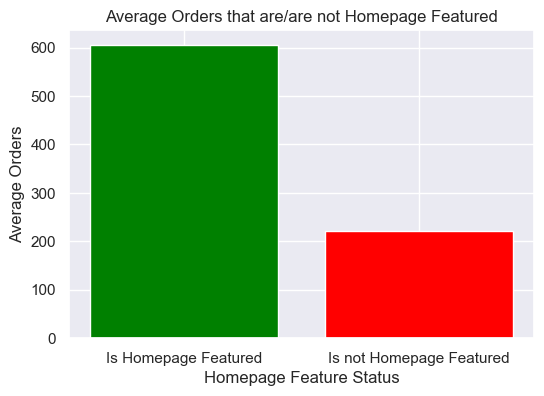

In [241]:
labels = ['Is Homepage Featured', 'Is not Homepage Featured']
average_orders = [average_orders_featured, average_orders_non_featured]
plt.figure(figsize=(6, 4))
plt.bar(labels, average_orders, color=['green', 'red'])
plt.title('Average Orders that are/are not Homepage Featured')
plt.xlabel('Homepage Feature Status')
plt.ylabel('Average Orders')
plt.show()

##### Hmm, again, almost 3x more orders with homepage featured, just like email promotions. 

### Let's create a more visual plot to see different combinations:
- email + homepage
- only email, not homepage
- not email, only homepage
- none

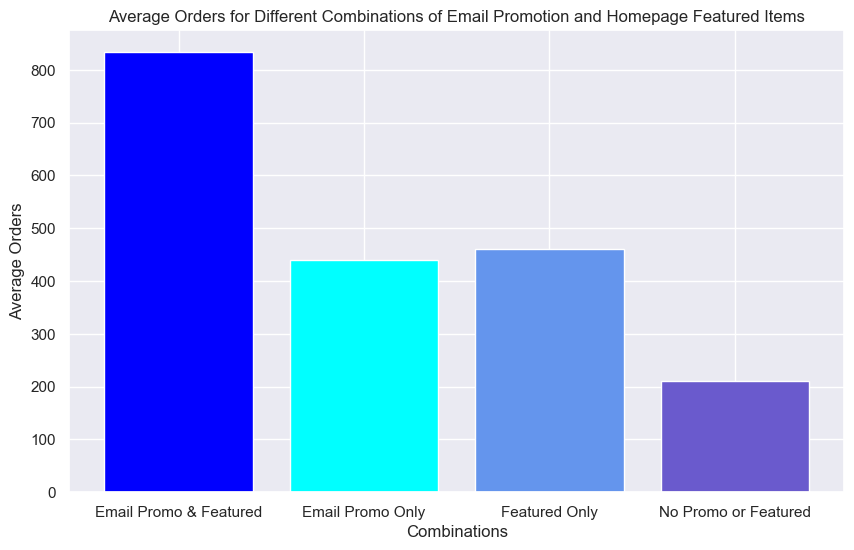

In [242]:
average_orders_with_email_promo_and_featured = \
    full_train_data[(full_train_data['emailer_for_promotion'] == 1) & (full_train_data['homepage_featured'] == 1)][
        'num_orders'].mean()
average_orders_with_email_promo_only = \
    full_train_data[(full_train_data['emailer_for_promotion'] == 1) & (full_train_data['homepage_featured'] == 0)][
        'num_orders'].mean()
average_orders_with_featured_only = \
    full_train_data[(full_train_data['emailer_for_promotion'] == 0) & (full_train_data['homepage_featured'] == 1)][
        'num_orders'].mean()
average_orders_without_promo_or_featured = \
    full_train_data[(full_train_data['emailer_for_promotion'] == 0) & (full_train_data['homepage_featured'] == 0)][
        'num_orders'].mean()

labels = ['Email Promo & Featured', 'Email Promo Only', 'Featured Only', 'No Promo or Featured']

average_orders = [average_orders_with_email_promo_and_featured, average_orders_with_email_promo_only,
                  average_orders_with_featured_only, average_orders_without_promo_or_featured]

plt.figure(figsize=(10, 6))
plt.bar(labels, average_orders, color=['blue', 'cyan', 'cornflowerblue', 'slateblue'])
plt.title('Average Orders for Different Combinations of Email Promotion and Homepage Featured Items')
plt.xlabel('Combinations')
plt.ylabel('Average Orders')
plt.show()

#### Emails and being Homepage Featured bring the most number of orders. Without being promoted, orders are not generated so much as having at least email or homepage featured. In the following scenarios, the discounts will be analyzed. 

### Are promoted items more likely to have discounts? How are the checkout prices spread here? Are the items with big discounts cheap? We will investigate whether email promotions or homepage featured items correlate with specific discount levels and checkout price ranges. 

In [243]:
# Create labels for different scenarios
scenario_labels = []

for email_promo in [0, 1]:
    for homepage_featured in [0, 1]:
        scenario_labels.append(f"Email Promo: {email_promo}, Featured: {homepage_featured}")

In [244]:
scenario_labels

['Email Promo: 0, Featured: 0',
 'Email Promo: 0, Featured: 1',
 'Email Promo: 1, Featured: 0',
 'Email Promo: 1, Featured: 1']

In [245]:
average_checkout_prices = []
average_discounts = []

for email_promo in [0, 1]:
    for homepage_featured in [0, 1]:
        average_checkout_price = full_train_data[(full_train_data['emailer_for_promotion'] == email_promo) & (
                full_train_data['homepage_featured'] == homepage_featured)]['checkout_price'].mean()
        average_discount = full_train_data[(full_train_data['emailer_for_promotion'] == email_promo) & (
                full_train_data['homepage_featured'] == homepage_featured)]['discount_value'].mean()
        average_checkout_prices.append(average_checkout_price)
        average_discounts.append(average_discount)

In [246]:
average_checkout_prices

[335.4335862155283, 282.92056973643196, 322.65198649045516, 339.7047037279982]

In [247]:
average_discounts

[11.681549251116024, 42.73263117791708, 101.72978560939794, 122.6543560730294]

#### Let's plot these!

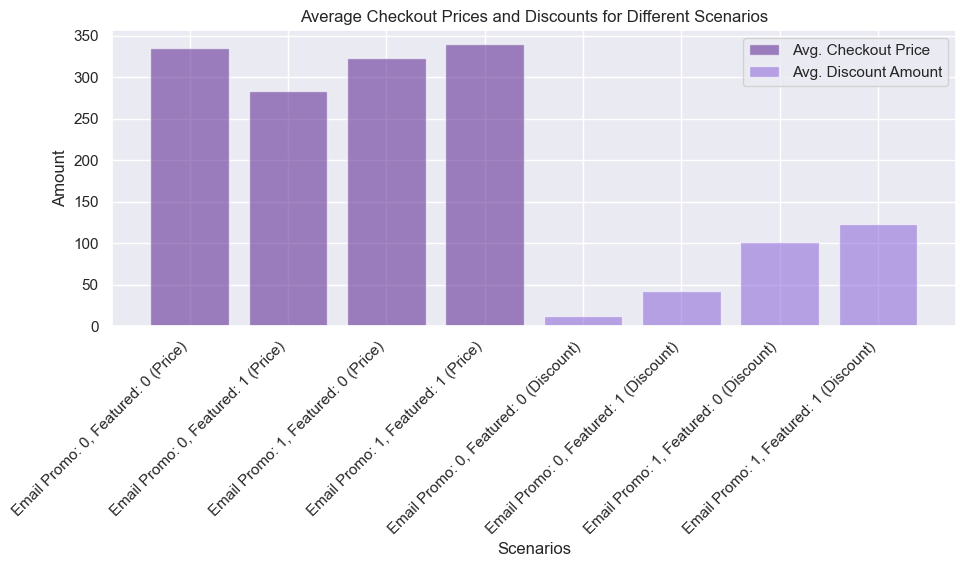

In [248]:
plt.figure(figsize=(10, 4))
plt.bar([label + " (Price)" for label in scenario_labels], average_checkout_prices, color='rebeccapurple', alpha=0.6,
        label='Avg. Checkout Price')
plt.bar([label + " (Discount)" for label in scenario_labels], average_discounts, color='mediumpurple', alpha=0.6,
        label='Avg. Discount Amount')

plt.title('Average Checkout Prices and Discounts for Different Scenarios')
plt.xlabel('Scenarios')
plt.ylabel('Amount')
plt.legend(loc='upper right')
plt.tight_layout()
plt.xticks(rotation=45, ha="right")
plt.show()

#### OBSERVATIONS:
- Products that have no promotion have a high average checkout price and a small discount amount,
- Products that are promoted via email have the lowest average checkout price and a higher discount,
- Products that are promoted via homepage have a bit higher price and also higher discounts,
- Products that are promoted both ways are having the highest checkout price and the highest discounts

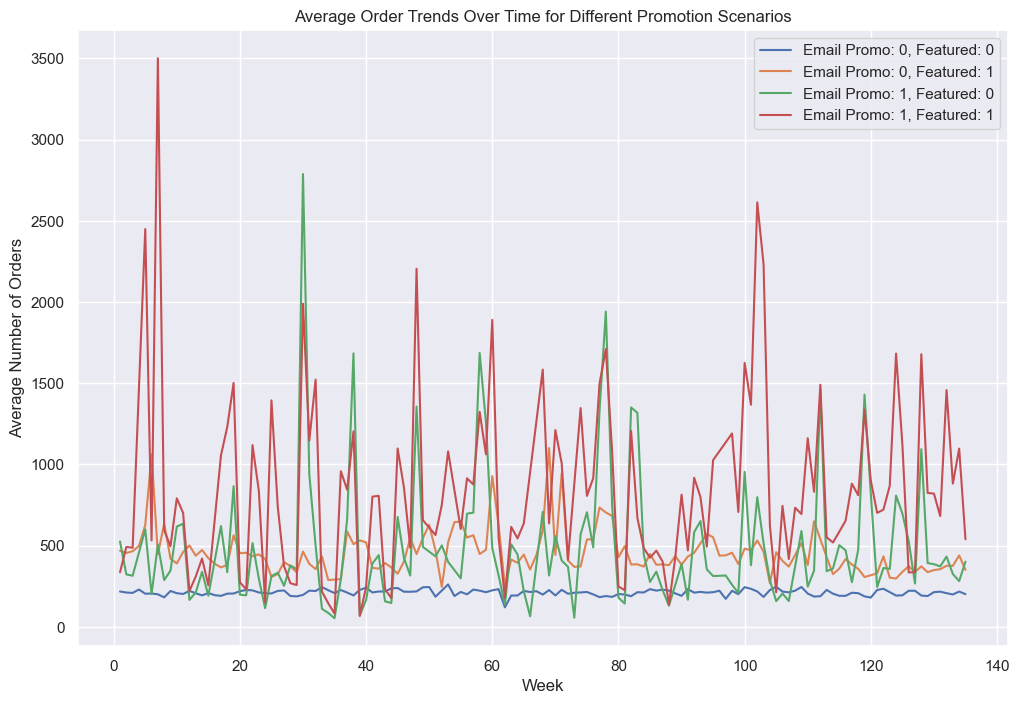

In [249]:
grouped_data = full_train_data.groupby(['week', 'emailer_for_promotion', 'homepage_featured'])[
    'num_orders'].mean().reset_index()

plt.figure(figsize=(12, 8))

for email_promo in [0, 1]:
    for homepage_featured in [0, 1]:
        scenario_data = grouped_data[(grouped_data['emailer_for_promotion'] == email_promo) & (
                grouped_data['homepage_featured'] == homepage_featured)]
        plt.plot(scenario_data['week'], scenario_data['num_orders'],
                 label=f'Email Promo: {email_promo}, Featured: {homepage_featured}')

plt.title('Average Order Trends Over Time for Different Promotion Scenarios')
plt.xlabel('Week')
plt.ylabel('Average Number of Orders')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

In [250]:
full_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423727 entries, 0 to 423726
Data columns (total 25 columns):
 #   Column                 Non-Null Count   Dtype   
---  ------                 --------------   -----   
 0   id                     423727 non-null  int64   
 1   week                   423727 non-null  int64   
 2   center_id              423727 non-null  int64   
 3   meal_id                423727 non-null  int64   
 4   checkout_price         423727 non-null  float64 
 5   base_price             423727 non-null  float64 
 6   emailer_for_promotion  423727 non-null  int64   
 7   homepage_featured      423727 non-null  int64   
 8   num_orders             423727 non-null  int64   
 9   city_code              423727 non-null  int64   
 10  region_code            423727 non-null  int64   
 11  center_type            423727 non-null  object  
 12  op_area                423727 non-null  float64 
 13  category               423727 non-null  object  
 14  cuisine             

# Let's build a pipeline that does all the necessary transformations and prepare the dataset for training!

In [251]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.base import BaseEstimator, TransformerMixin


class FoodDataMerger(BaseEstimator, TransformerMixin):
    center_info = None
    meal_info = None

    def __init__(self, center_info, meal_info):
        self.center_info = center_info
        self.meal_info = meal_info

    def fit(self, data):
        return self

    def transform(self, data):
        merged_data = data.merge(self.center_info, on="center_id", how="inner", sort=False)
        merged_data = merged_data.merge(self.meal_info, on="meal_id", how="inner", sort=False)
        merged_data = merged_data.sort_values(by=['week', 'id'], ascending=[True, True])
        return merged_data


class FeatureAdder(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        new_data = X.copy()

        new_data['op_area_bin'] = pd.cut(new_data['op_area'], [0, 2.4, 3.7, 4.5, 5.1, 6.7, np.inf],
                                         labels=['XS', 'S', 'M', 'L', 'XL', 'XXL'])

        new_data['checkout_price_bin'] = pd.cut(new_data['checkout_price'], [0, 100, 250, 350, 520, np.inf],
                                                labels=['Very Cheap', 'Cheap', 'Medium', 'Expensive', 'Luxury'])

        new_data['base_price_bin'] = pd.cut(new_data['base_price'], [0, 100, 250, 350, 520, np.inf],
                                            labels=['Very Cheap', 'Cheap', 'Medium', 'Expensive', 'Luxury'])

        new_data["category_cuisine"] = new_data['category'] + "-" + new_data['cuisine']

        new_data["region_city"] = new_data['region_code'].astype(str) + "-" + new_data['city_code'].astype(str)

        new_data['is_discount'] = (new_data['checkout_price'] <= new_data['base_price']).astype(int)

        new_data['discount_value'] = new_data.apply(
            lambda row: row['base_price'] - row['checkout_price'] if row['checkout_price'] <= row['base_price'] else 0,
            axis=1)

        return new_data


class DataFrameReconstructor(BaseEstimator, TransformerMixin):
    pipeline = None

    def __init__(self, pipeline):
        self.pipeline = pipeline

    def fit(self, data):
        return self

    def transform(self, data):
        return pd.DataFrame(data, columns=self.pipeline.get_feature_names_out())


class FeatureSelector(BaseEstimator, TransformerMixin):
    feature_list = None

    def __init__(self, feature_list):
        self.feature_list = feature_list

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[self.feature_list]


class PipelineBuilder:
    median_attribs = None
    most_freq_attribs = None
    standard_scaling_attribs = None
    normalization_attribs = None
    selected_features = None
    one_hot_attribs = None
    include_one_hot = True

    def __init__(self, median_attribs, most_freq_attribs, standard_scaling_attribs, normalization_attribs,
                 selected_features, one_hot_attribs, include_one_hot=True):
        self.median_attribs = median_attribs
        self.most_freq_attribs = most_freq_attribs
        self.standard_scaling_attribs = standard_scaling_attribs
        self.normalization_attribs = normalization_attribs
        self.selected_features = selected_features
        self.one_hot_attribs = one_hot_attribs
        self.include_one_hot = include_one_hot

    def build(self):
        fill_missing_pipeline = ColumnTransformer(
            transformers=[
                ('num', SimpleImputer(strategy="median"), self.median_attribs),
                ('cat', SimpleImputer(strategy="most_frequent"), self.most_freq_attribs)
            ],
            remainder='passthrough',
            verbose_feature_names_out=False)

        scaling_pipeline = ColumnTransformer(
            transformers=[
                ('standard', StandardScaler(), self.standard_scaling_attribs),
                ('normalization', MinMaxScaler(), self.normalization_attribs)
            ],
            remainder='passthrough',
            verbose_feature_names_out=False)

        one_hot_pipeline = ColumnTransformer(
            transformers=[
                ('one-hot', OneHotEncoder(), self.one_hot_attribs)
            ],
            remainder='passthrough',
            verbose_feature_names_out=False)

        if self.include_one_hot:
            return Pipeline([
                ('merger', FoodDataMerger(center_info, meal_info)),
                ('missing_data_filler', fill_missing_pipeline),
                ('missing_reconstructor', DataFrameReconstructor(fill_missing_pipeline)),
                ('feature_adder', FeatureAdder()),
                ('scaler', scaling_pipeline),
                ('scaler_reconstructor', DataFrameReconstructor(scaling_pipeline)),
                ('feature_selector', FeatureSelector(self.selected_features)),
                ('one_hot_encoding', one_hot_pipeline)
            ])
        else:
            return Pipeline([
                ('merger', FoodDataMerger(center_info, meal_info)),
                ('missing_data_filler', fill_missing_pipeline),
                ('missing_reconstructor', DataFrameReconstructor(fill_missing_pipeline)),
                ('feature_adder', FeatureAdder()),
                ('scaler', scaling_pipeline),
                ('scaler_reconstructor', DataFrameReconstructor(scaling_pipeline)),
                ('feature_selector', FeatureSelector(self.selected_features))

            ])

In [268]:
#imputer columns
median_attribs = ['checkout_price', 'base_price', 'op_area']
most_freq_attribs = ['center_id', 'meal_id', 'city_code', 'region_code', 'category', 'cuisine', 'center_type', 'week']
#standardization columns
standard_scaling_attribs = ['checkout_price', 'base_price', 'op_area', 'discount_value']
normalization_attribs = []
#selected columns
selected_features = ['week', 'center_id', 'meal_id', 'op_area_bin', 'city_code', 'region_code', 'category_cuisine',
                     'center_type', 'checkout_price_bin', 'base_price_bin', 'discount_value', 'is_discount',
                     'emailer_for_promotion', 'homepage_featured']
#one-hot column

one_hot_attribs = ['center_id', 'meal_id', 'op_area_bin', 'city_code', 'region_code', 'category_cuisine',
                   'center_type', 'checkout_price_bin', 'base_price_bin']

final_pipeline = PipelineBuilder(median_attribs, most_freq_attribs, standard_scaling_attribs, normalization_attribs,
                                 selected_features, one_hot_attribs).build()

# Let's shortlist a few models to find the best performing ones

Normally, in order to validate the performance of a ML model, we would like to use cross-fold validation. In our situation, since the dataset is more similar to a time-series set, and we only ever intend to predict the future, cross-fold approach is not good. By doing cross folding we would validate the model by how well it predicts future values BUT ALSO past values. We are not interested in predicting past values.

The best approach here, would be another type of multiple validations where we use a rolling window to take training data and predict the next week/weeks.

In this demo, we decided to directly test against the test set which contains weeks 136-145, while the training set contains 1-135.

In [269]:
def calculate_and_print_rmse(actual, predicted):
    mse = mean_squared_error(actual, predicted)
    rmse = np.sqrt(mse)
    print(f"Root Mean Squared Error (RMSE): {rmse}")


def visualize_predictions(labels, predictions):
    plt.figure(figsize=(17, 8))
    plt.rcParams['agg.path.chunksize'] = 20000
    plt.plot(labels.reset_index(drop=True), label="actual")
    plt.plot(predictions, color='red', label="predicted")
    plt.legend(loc='best')
    plt.show()

In [270]:
sorted_train_data = train_set.sort_values(by=['week', 'id'], ascending=[True, True])
final_train_data = final_pipeline.fit_transform(sorted_train_data)
final_train_labels = sorted_train_data['num_orders'].copy()

In [271]:
sorted_test_set = test_set.sort_values(by=['week', 'id'], ascending=[True, True])
final_test_data = final_pipeline.fit_transform(sorted_test_set)
final_test_labels = sorted_test_set['num_orders'].copy()

## Linear Regression

In [272]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(final_train_data, final_train_labels)
predictions = lin_reg.predict(final_test_data)
calculate_and_print_rmse(final_test_labels, predictions)

Root Mean Squared Error (RMSE): 201.663257329252


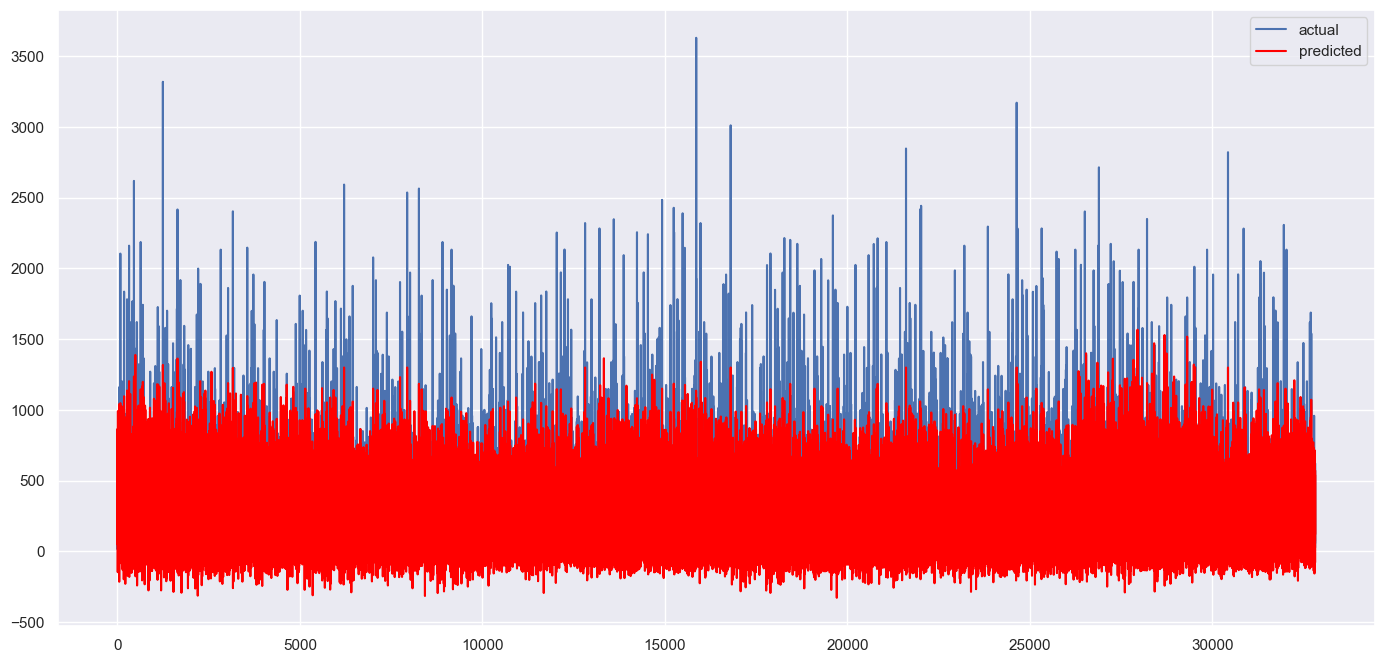

In [273]:
visualize_predictions(final_test_labels, predictions)

# XGB Regressor

In [274]:
from xgboost import XGBRegressor

xgb_reg = XGBRegressor()
xgb_reg.fit(final_train_data, final_train_labels)
predictions = xgb_reg.predict(final_test_data)
calculate_and_print_rmse(final_test_labels, predictions)

C:\Users\Devy\AppData\Roaming\Python\Python310\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


Root Mean Squared Error (RMSE): 140.6033568063512


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

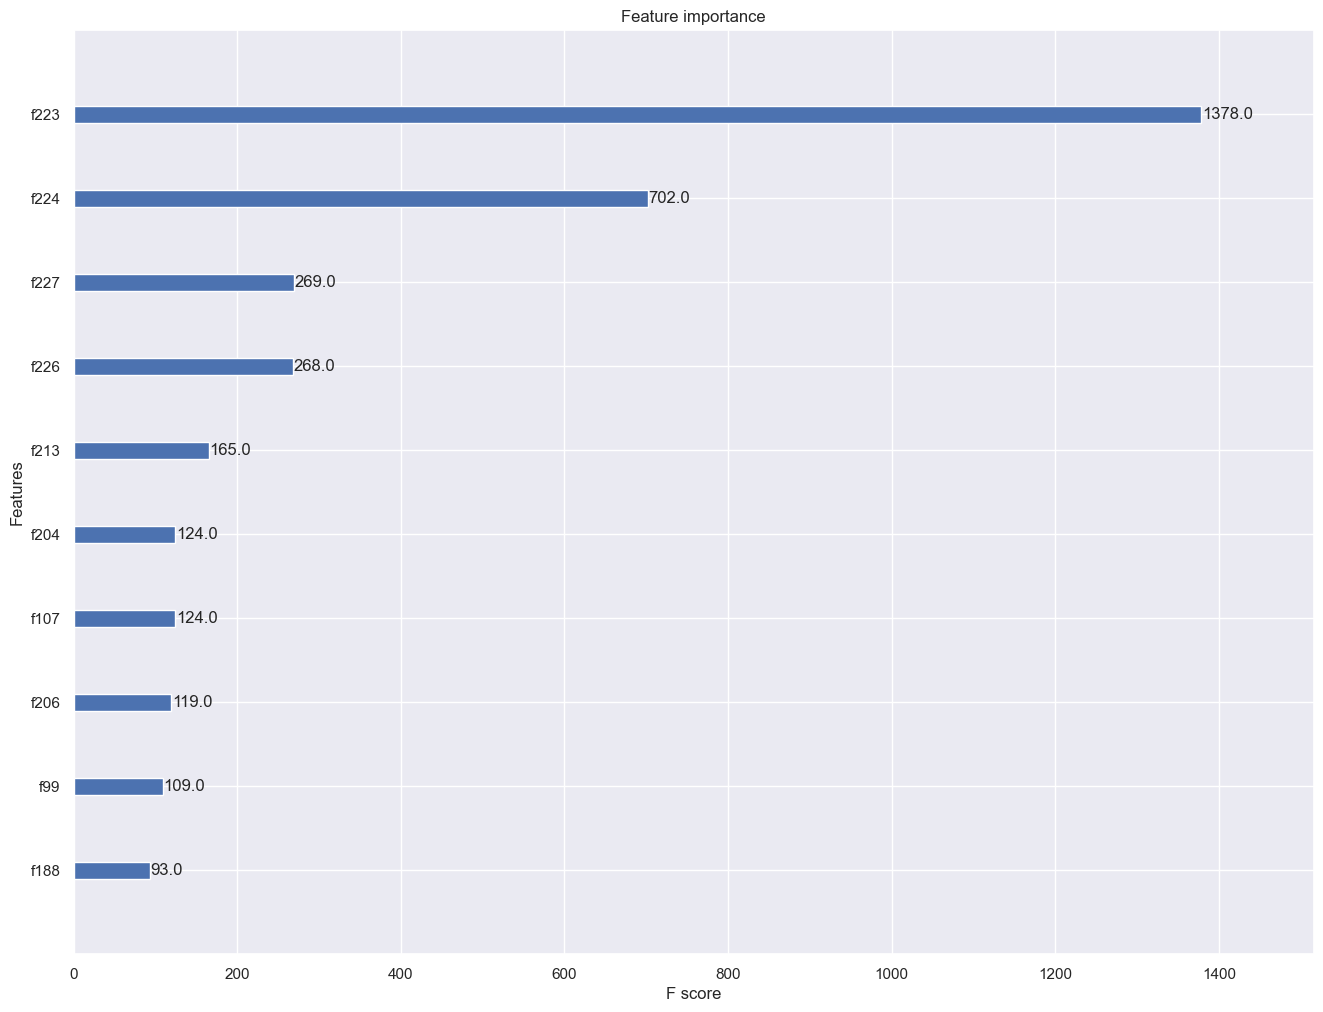

In [275]:
from xgboost import plot_importance

plot_importance(xgb_reg, max_num_features=10)

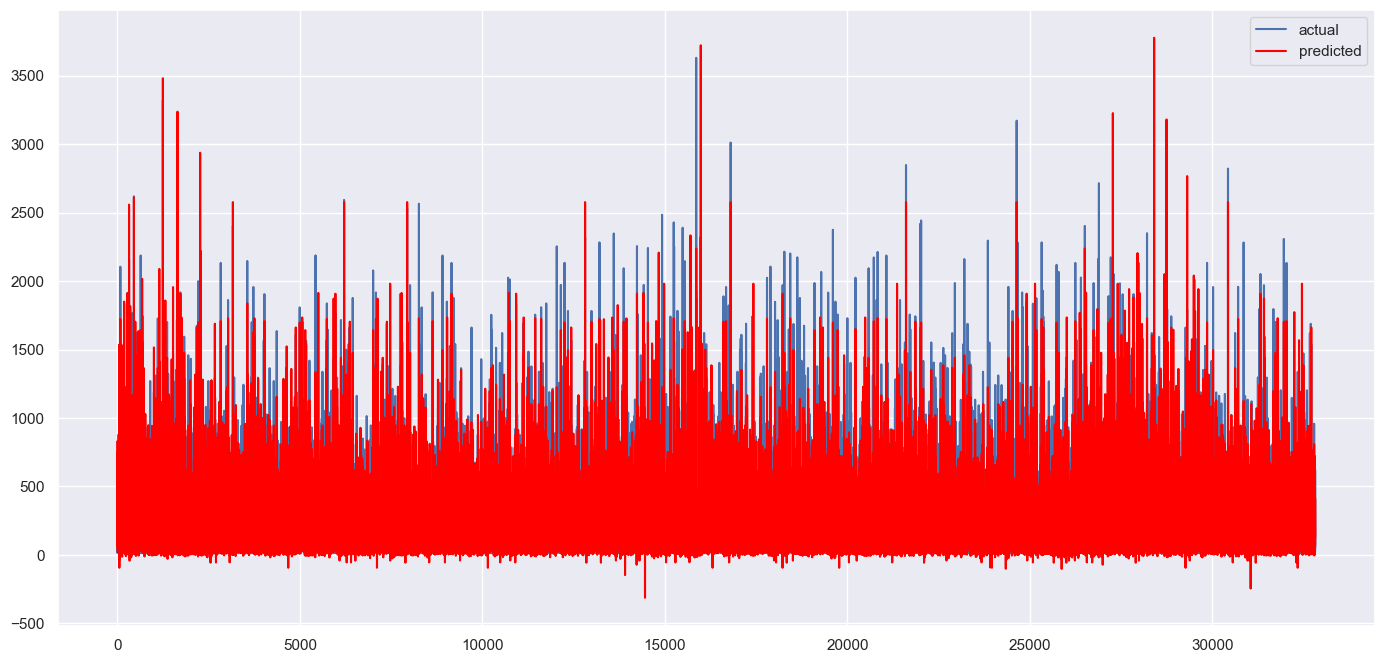

In [276]:
visualize_predictions(final_test_labels, predictions)

# LightGBM Model

In [277]:
import lightgbm as lgb

light_train_data = lgb.Dataset(final_train_data, label=final_train_labels)
light_test_data = lgb.Dataset(final_test_data, label=final_test_labels, reference=light_train_data)

params = {
    "objective": "regression",
    "metric": "rmse",
    "boosting_type": "gbdt",
    "num_leaves": 31,
    "learning_rate": 0.05,
    "feature_fraction": 0.9,
}

num_round = 100
bst = lgb.train(params, light_train_data, num_round, valid_sets=[light_test_data])

predictions = bst.predict(final_test_data, num_iteration=bst.best_iteration)
calculate_and_print_rmse(final_test_labels, predictions)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.017761 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 843
[LightGBM] [Info] Number of data points in the train set: 423727, number of used features: 228
[LightGBM] [Info] Start training from score 264.550536
[1]	valid_0's rmse: 272.757
[2]	valid_0's rmse: 267.133
[3]	valid_0's rmse: 261.446
[4]	valid_0's rmse: 256.207
[5]	valid_0's rmse: 250.204
[6]	valid_0's rmse: 244.402
[7]	valid_0's rmse: 239.666
[8]	valid_0's rmse: 236.282
[9]	valid_0's rmse: 233.468
[10]	valid_0's rmse: 229.529
[11]	valid_0's rmse: 225.727
[12]	valid_0's rmse: 222.168
[13]	valid_0's rmse: 218.974
[14]	valid_0's rmse: 216.157
[15]	valid_0's rmse: 213.883
[16]	valid_0's rmse: 210.955
[17]	valid_0's rmse: 208.46
[18]	valid_0's rmse: 205.902
[19]	valid_0's rmse: 203.881
[20]	valid_0's rmse: 201.552
[21]	valid_0's rmse: 199.682
[22]	valid_0's rmse: 197.664
[23]	valid_0's rmse: 195

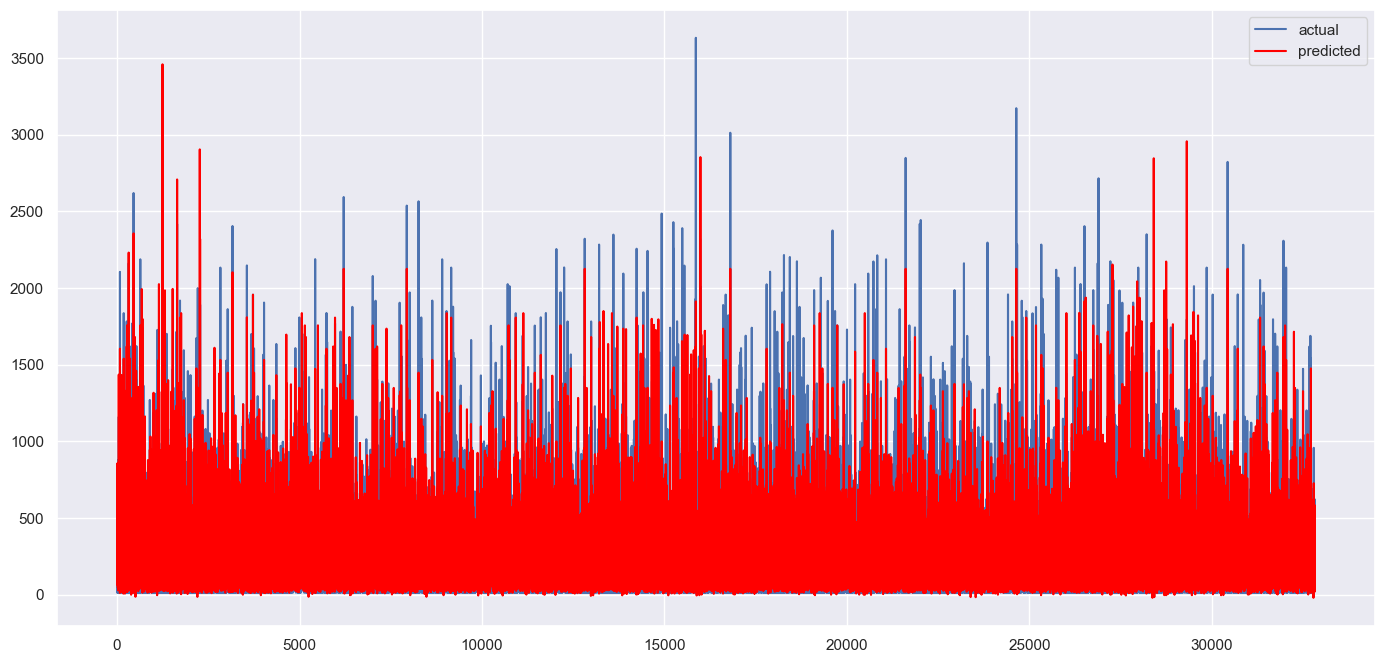

In [278]:
visualize_predictions(final_test_labels, predictions)

# Cat Boost

In [279]:
from catboost import CatBoostRegressor

cat_reg = CatBoostRegressor(random_seed=42)
cat_reg.fit(final_train_data, final_train_labels)
predictions = cat_reg.predict(final_test_data)

calculate_and_print_rmse(final_test_labels, predictions)

Learning rate set to 0.106478
0:	learn: 386.7205753	total: 44.6ms	remaining: 44.5s
1:	learn: 372.5111259	total: 93.8ms	remaining: 46.8s
2:	learn: 360.3666720	total: 126ms	remaining: 41.8s
3:	learn: 350.0153826	total: 155ms	remaining: 38.5s
4:	learn: 340.6522524	total: 185ms	remaining: 36.9s
5:	learn: 332.0988150	total: 215ms	remaining: 35.6s
6:	learn: 324.8930750	total: 244ms	remaining: 34.6s
7:	learn: 317.1389749	total: 281ms	remaining: 34.8s
8:	learn: 311.0109653	total: 313ms	remaining: 34.5s
9:	learn: 306.1920058	total: 343ms	remaining: 34s
10:	learn: 300.6124603	total: 372ms	remaining: 33.4s
11:	learn: 295.9279021	total: 403ms	remaining: 33.2s
12:	learn: 291.6010811	total: 432ms	remaining: 32.8s
13:	learn: 287.8079332	total: 462ms	remaining: 32.6s
14:	learn: 284.8060900	total: 491ms	remaining: 32.3s
15:	learn: 281.0994000	total: 522ms	remaining: 32.1s
16:	learn: 278.4711551	total: 553ms	remaining: 32s
17:	learn: 275.9350827	total: 582ms	remaining: 31.7s
18:	learn: 273.0465798	total

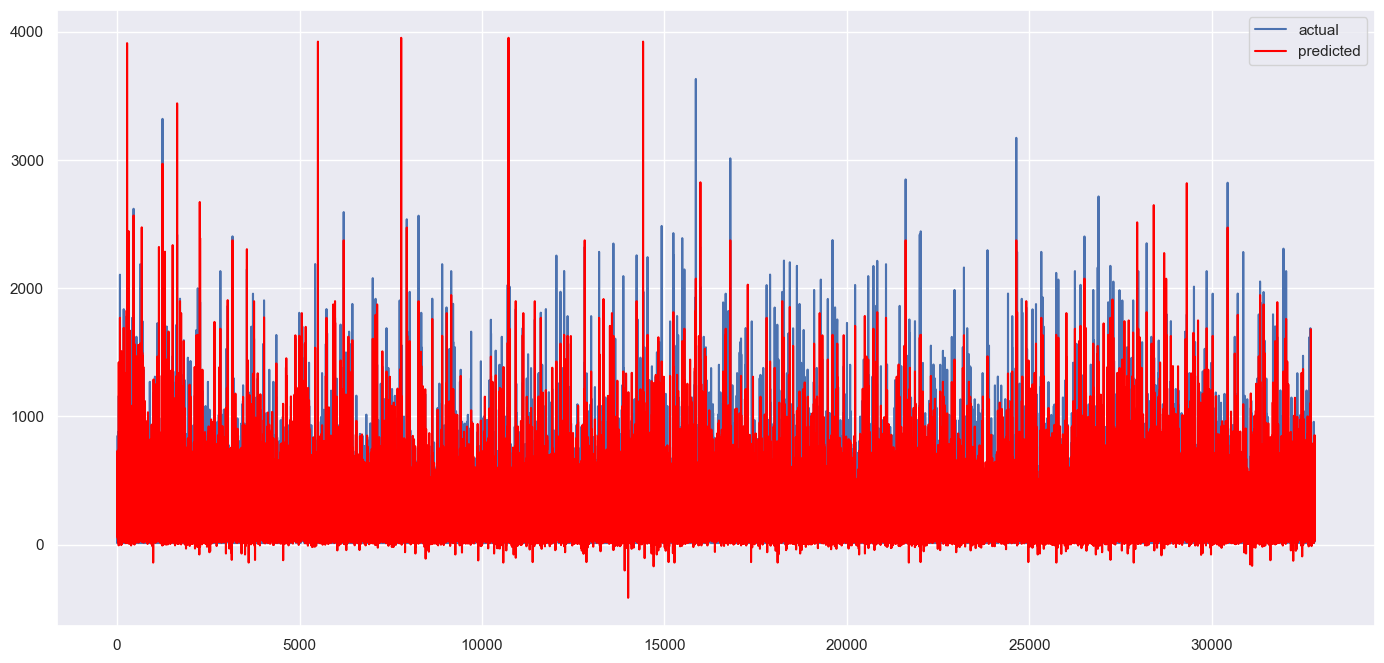

In [282]:
visualize_predictions(final_test_labels, predictions)

# Feature selection

Since we do not have cross fold validation, our only metric for deciding is the RMSE. If multiple validations are done using a rolling window approach, we could also check the SD or the CV%

## Keeping checkout and base prices instead of their bins

In [284]:
#imputer columns
median_attribs = ['checkout_price', 'base_price', 'op_area']
most_freq_attribs = ['center_id', 'meal_id', 'city_code', 'region_code', 'category', 'cuisine', 'center_type', 'week']
#standardization columns
standard_scaling_attribs = ['checkout_price', 'base_price', 'op_area', 'discount_value']
normalization_attribs = []
#selected columns
selected_features = ['week', 'center_id', 'meal_id', 'op_area_bin', 'city_code', 'region_code', 'category_cuisine', 'center_type', 'checkout_price', 'base_price', 'discount_value', 'is_discount', 'emailer_for_promotion', 'homepage_featured']

#one-hot column
one_hot_attribs = ['center_id', 'meal_id', 'op_area_bin', 'city_code', 'region_code', 'category_cuisine',
                   'center_type']

final_pipeline = PipelineBuilder(median_attribs, most_freq_attribs, standard_scaling_attribs, normalization_attribs, selected_features, one_hot_attribs).build()

final_train_data = final_pipeline.fit_transform(sorted_train_data)
final_train_labels = sorted_train_data['num_orders'].copy()

final_test_data = final_pipeline.fit_transform(sorted_test_set)
final_test_labels = sorted_test_set['num_orders'].copy()

xgb_reg = XGBRegressor()

xgb_reg.fit(final_train_data, final_train_labels)
predictions = xgb_reg.predict(final_test_data)

calculate_and_print_rmse(final_test_labels, predictions)

C:\Users\Devy\AppData\Roaming\Python\Python310\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


Root Mean Squared Error (RMSE): 139.6726881800437


OBSERVATION: Using actual prices is better than using the price bins overall

## Checking if using op_area value instead of bins is better. Keeping only better versions as we go

In [285]:
#imputer columns
median_attribs = ['checkout_price', 'base_price', 'op_area']
most_freq_attribs = ['center_id', 'meal_id', 'city_code', 'region_code', 'category', 'cuisine', 'center_type', 'week']
#standardization columns
standard_scaling_attribs = ['checkout_price', 'base_price', 'op_area', 'discount_value']
normalization_attribs = []
#selected columns
selected_features = ['week', 'center_id', 'meal_id', 'op_area', 'city_code', 'region_code', 'category_cuisine','center_type', 'checkout_price', 'base_price', 'discount_value', 'is_discount', 'emailer_for_promotion', 'homepage_featured']

#one-hot column
one_hot_attribs = ['center_id', 'meal_id', 'city_code', 'region_code', 'category_cuisine',
                   'center_type']

final_pipeline = PipelineBuilder(median_attribs, most_freq_attribs, standard_scaling_attribs, normalization_attribs, selected_features, one_hot_attribs).build()

final_train_data = final_pipeline.fit_transform(sorted_train_data)
final_train_labels = sorted_train_data['num_orders'].copy()

final_test_data = final_pipeline.fit_transform(sorted_test_set)
final_test_labels = sorted_test_set['num_orders'].copy()

xgb_reg = XGBRegressor()

xgb_reg.fit(final_train_data, final_train_labels)
predictions = xgb_reg.predict(final_test_data)

calculate_and_print_rmse(final_test_labels, predictions)

C:\Users\Devy\AppData\Roaming\Python\Python310\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


Root Mean Squared Error (RMSE): 139.29840202184553


OBS: Using actual value of op_area is slightly better. We will drop binning for op_area.

## Checking if using the category and cuisine separately instead of the combined category_cuisine

In [286]:
#imputer columns
median_attribs = ['checkout_price', 'base_price', 'op_area']
most_freq_attribs = ['center_id', 'meal_id', 'city_code', 'region_code', 'category', 'cuisine', 'center_type', 'week']
#standardization columns
standard_scaling_attribs = ['checkout_price', 'base_price', 'op_area', 'discount_value']
normalization_attribs = []
#selected columns
selected_features = ['week', 'center_id', 'meal_id', 'op_area', 'city_code', 'region_code', 'category', 'cuisine', 'center_type', 'checkout_price', 'base_price', 'discount_value', 'is_discount', 'emailer_for_promotion', 'homepage_featured']

#one-hot column
one_hot_attribs = ['center_id', 'meal_id', 'city_code', 'region_code', 'category', 'cuisine',
                   'center_type']

final_pipeline = PipelineBuilder(median_attribs, most_freq_attribs, standard_scaling_attribs, normalization_attribs, selected_features, one_hot_attribs).build()

final_train_data = final_pipeline.fit_transform(sorted_train_data)
final_train_labels = sorted_train_data['num_orders'].copy()

final_test_data = final_pipeline.fit_transform(sorted_test_set)
final_test_labels = sorted_test_set['num_orders'].copy()

xgb_reg = XGBRegressor()

xgb_reg.fit(final_train_data, final_train_labels)
predictions = xgb_reg.predict(final_test_data)

calculate_and_print_rmse(final_test_labels, predictions)

C:\Users\Devy\AppData\Roaming\Python\Python310\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


Root Mean Squared Error (RMSE): 140.60747032752795


OBS: category_cuisine seems to offer better performance than have it separately. We'll keep them together.

## Checking if discount features added are actually helping or not

In [287]:
#imputer columns
median_attribs = ['checkout_price', 'base_price', 'op_area']
most_freq_attribs = ['center_id', 'meal_id', 'city_code', 'region_code', 'category', 'cuisine', 'center_type', 'week']
#standardization columns
standard_scaling_attribs = ['checkout_price', 'base_price', 'op_area', 'discount_value']
normalization_attribs = []
#selected columns
selected_features = ['week', 'center_id', 'meal_id', 'op_area', 'city_code', 'region_code', 'category_cuisine','center_type', 'checkout_price', 'base_price', 'emailer_for_promotion', 'homepage_featured']

#one-hot column
one_hot_attribs = ['center_id', 'meal_id', 'city_code', 'region_code', 'category_cuisine',
                   'center_type']

final_pipeline = PipelineBuilder(median_attribs, most_freq_attribs, standard_scaling_attribs, normalization_attribs, selected_features, one_hot_attribs).build()

final_train_data = final_pipeline.fit_transform(sorted_train_data)
final_train_labels = sorted_train_data['num_orders'].copy()

final_test_data = final_pipeline.fit_transform(sorted_test_set)
final_test_labels = sorted_test_set['num_orders'].copy()

xgb_reg = XGBRegressor()

xgb_reg.fit(final_train_data, final_train_labels)
predictions = xgb_reg.predict(final_test_data)

calculate_and_print_rmse(final_test_labels, predictions)

C:\Users\Devy\AppData\Roaming\Python\Python310\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


Root Mean Squared Error (RMSE): 133.50662074054205


OBS: Engineered features discount_value and is_discount don't seem to help. Let's check them individually.

## Do both discount features help, or is only one better?
Testing with only discount_value

In [288]:
#imputer columns
median_attribs = ['checkout_price', 'base_price', 'op_area']
most_freq_attribs = ['center_id', 'meal_id', 'city_code', 'region_code', 'category', 'cuisine', 'center_type', 'week']
#standardization columns
standard_scaling_attribs = ['checkout_price', 'base_price', 'op_area', 'discount_value']
normalization_attribs = []
#selected columns
selected_features = ['week', 'center_id', 'meal_id', 'op_area', 'city_code', 'region_code', 'category_cuisine','center_type', 'checkout_price', 'base_price', 'discount_value', 'emailer_for_promotion', 'homepage_featured']

#one-hot column
one_hot_attribs = ['center_id', 'meal_id', 'city_code', 'region_code', 'category_cuisine',
                   'center_type']

final_pipeline = PipelineBuilder(median_attribs, most_freq_attribs, standard_scaling_attribs, normalization_attribs, selected_features, one_hot_attribs).build()

final_train_data = final_pipeline.fit_transform(sorted_train_data)
final_train_labels = sorted_train_data['num_orders'].copy()

final_test_data = final_pipeline.fit_transform(sorted_test_set)
final_test_labels = sorted_test_set['num_orders'].copy()

xgb_reg = XGBRegressor()

xgb_reg.fit(final_train_data, final_train_labels)
predictions = xgb_reg.predict(final_test_data)

calculate_and_print_rmse(final_test_labels, predictions)

C:\Users\Devy\AppData\Roaming\Python\Python310\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


Root Mean Squared Error (RMSE): 133.6306846032507


Testing with only is_discount

In [289]:
#imputer columns
median_attribs = ['checkout_price', 'base_price', 'op_area']
most_freq_attribs = ['center_id', 'meal_id', 'city_code', 'region_code', 'category', 'cuisine', 'center_type', 'week']
#standardization columns
standard_scaling_attribs = ['checkout_price', 'base_price', 'op_area', 'discount_value']
normalization_attribs = []
#selected columns
selected_features = ['week', 'center_id', 'meal_id', 'op_area', 'city_code', 'region_code', 'category_cuisine','center_type', 'checkout_price', 'base_price', 'is_discount', 'emailer_for_promotion', 'homepage_featured']

#one-hot column
one_hot_attribs = ['center_id', 'meal_id', 'city_code', 'region_code', 'category_cuisine',
                   'center_type']

final_pipeline = PipelineBuilder(median_attribs, most_freq_attribs, standard_scaling_attribs, normalization_attribs, selected_features, one_hot_attribs).build()

final_train_data = final_pipeline.fit_transform(sorted_train_data)
final_train_labels = sorted_train_data['num_orders'].copy()

final_test_data = final_pipeline.fit_transform(sorted_test_set)
final_test_labels = sorted_test_set['num_orders'].copy()

xgb_reg = XGBRegressor()

xgb_reg.fit(final_train_data, final_train_labels)
predictions = xgb_reg.predict(final_test_data)

calculate_and_print_rmse(final_test_labels, predictions)

C:\Users\Devy\AppData\Roaming\Python\Python310\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


Root Mean Squared Error (RMSE): 134.05715944345908


OBS: Discount fields don't seem to help. Dropping them. It was a small chance that these features would help as the information here is clearly baked in the checkout_price and base_price and a majority of ML models would understand these correlations between helper features like these.

## Checking if meal_id helps or not

In [290]:
#imputer columns
median_attribs = ['checkout_price', 'base_price', 'op_area']
most_freq_attribs = ['center_id', 'meal_id', 'city_code', 'region_code', 'category', 'cuisine', 'center_type', 'week']
#standardization columns
standard_scaling_attribs = ['checkout_price', 'base_price', 'op_area', 'discount_value']
normalization_attribs = []
#selected columns
selected_features = ['week', 'center_id', 'op_area', 'city_code', 'region_code', 'category_cuisine','center_type', 'checkout_price', 'base_price', 'emailer_for_promotion', 'homepage_featured']

#one-hot column
one_hot_attribs = ['center_id', 'city_code', 'region_code', 'category_cuisine',
                   'center_type']

final_pipeline = PipelineBuilder(median_attribs, most_freq_attribs, standard_scaling_attribs, normalization_attribs, selected_features, one_hot_attribs).build()

final_train_data = final_pipeline.fit_transform(sorted_train_data)
final_train_labels = sorted_train_data['num_orders'].copy()

final_test_data = final_pipeline.fit_transform(sorted_test_set)
final_test_labels = sorted_test_set['num_orders'].copy()

xgb_reg = XGBRegressor()

xgb_reg.fit(final_train_data, final_train_labels)
predictions = xgb_reg.predict(final_test_data)

calculate_and_print_rmse(final_test_labels, predictions)

C:\Users\Devy\AppData\Roaming\Python\Python310\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


Root Mean Squared Error (RMSE): 159.71004015034057


OBS: Removing the meal_id is much worse due to high RMSE.

## Keeping meal id, but not doing 1-hot

In [291]:
#imputer columns
median_attribs = ['checkout_price', 'base_price', 'op_area']
most_freq_attribs = ['center_id', 'meal_id', 'city_code', 'region_code', 'category', 'cuisine', 'center_type', 'week']
#standardization columns
standard_scaling_attribs = ['checkout_price', 'base_price', 'op_area', 'discount_value']
normalization_attribs = []
#selected columns
selected_features = ['week', 'center_id', 'meal_id', 'op_area', 'city_code', 'region_code', 'category_cuisine','center_type', 'checkout_price', 'base_price', 'emailer_for_promotion', 'homepage_featured']

#one-hot column
one_hot_attribs = ['center_id', 'city_code', 'region_code', 'category_cuisine',
                   'center_type']

final_pipeline = PipelineBuilder(median_attribs, most_freq_attribs, standard_scaling_attribs, normalization_attribs, selected_features, one_hot_attribs).build()

final_train_data = final_pipeline.fit_transform(sorted_train_data)
final_train_labels = sorted_train_data['num_orders'].copy()

final_test_data = final_pipeline.fit_transform(sorted_test_set)
final_test_labels = sorted_test_set['num_orders'].copy()

xgb_reg = XGBRegressor()

xgb_reg.fit(final_train_data, final_train_labels)
predictions = xgb_reg.predict(final_test_data)

calculate_and_print_rmse(final_test_labels, predictions)

C:\Users\Devy\AppData\Roaming\Python\Python310\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


Root Mean Squared Error (RMSE): 139.60291591222796


OBS: Removing the 1-hot enc from meal-id made it worse. We will keep meal id and the 1 hot enc on it.

## Is center id relevant?

In [292]:
#imputer columns
median_attribs = ['checkout_price', 'base_price', 'op_area']
most_freq_attribs = ['center_id', 'meal_id', 'city_code', 'region_code', 'category', 'cuisine', 'center_type', 'week']
#standardization columns
standard_scaling_attribs = ['checkout_price', 'base_price', 'op_area', 'discount_value']
normalization_attribs = []
#selected columns
selected_features = ['week', 'meal_id', 'op_area', 'city_code', 'region_code', 'category_cuisine','center_type', 'checkout_price', 'base_price', 'emailer_for_promotion', 'homepage_featured']

#one-hot column
one_hot_attribs = ['meal_id', 'city_code', 'region_code', 'category_cuisine',
                   'center_type']

final_pipeline = PipelineBuilder(median_attribs, most_freq_attribs, standard_scaling_attribs, normalization_attribs, selected_features, one_hot_attribs).build()

final_train_data = final_pipeline.fit_transform(sorted_train_data)
final_train_labels = sorted_train_data['num_orders'].copy()

final_test_data = final_pipeline.fit_transform(sorted_test_set)
final_test_labels = sorted_test_set['num_orders'].copy()

xgb_reg = XGBRegressor()

xgb_reg.fit(final_train_data, final_train_labels)
predictions = xgb_reg.predict(final_test_data)

calculate_and_print_rmse(final_test_labels, predictions)

C:\Users\Devy\AppData\Roaming\Python\Python310\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


Root Mean Squared Error (RMSE): 141.7275562645974


OBS: Worse without the center ID

## Is performance better without 1-hot enc on center ID?

In [293]:
#imputer columns
median_attribs = ['checkout_price', 'base_price', 'op_area']
most_freq_attribs = ['center_id', 'meal_id', 'city_code', 'region_code', 'category', 'cuisine', 'center_type', 'week']
#standardization columns
standard_scaling_attribs = ['checkout_price', 'base_price', 'op_area', 'discount_value']
normalization_attribs = []
#selected columns
selected_features = ['week', 'center_id', 'meal_id', 'op_area', 'city_code', 'region_code', 'category_cuisine','center_type', 'checkout_price', 'base_price', 'emailer_for_promotion', 'homepage_featured']

#one-hot column
one_hot_attribs = ['meal_id', 'city_code', 'region_code', 'category_cuisine',
                   'center_type']

final_pipeline = PipelineBuilder(median_attribs, most_freq_attribs, standard_scaling_attribs, normalization_attribs, selected_features, one_hot_attribs).build()

final_train_data = final_pipeline.fit_transform(sorted_train_data)
final_train_labels = sorted_train_data['num_orders'].copy()

final_test_data = final_pipeline.fit_transform(sorted_test_set)
final_test_labels = sorted_test_set['num_orders'].copy()

xgb_reg = XGBRegressor()

xgb_reg.fit(final_train_data, final_train_labels)
predictions = xgb_reg.predict(final_test_data)

calculate_and_print_rmse(final_test_labels, predictions)

C:\Users\Devy\AppData\Roaming\Python\Python310\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


Root Mean Squared Error (RMSE): 137.9150155737621


OBS: Removing 1-hot enc from center ID made it worse.

## Is city code relevant?

In [294]:
#imputer columns
median_attribs = ['checkout_price', 'base_price', 'op_area']
most_freq_attribs = ['center_id', 'meal_id', 'city_code', 'region_code', 'category', 'cuisine', 'center_type', 'week']
#standardization columns
standard_scaling_attribs = ['checkout_price', 'base_price', 'op_area', 'discount_value']
normalization_attribs = []
#selected columns
selected_features = ['week', 'center_id', 'meal_id', 'op_area', 'region_code', 'category_cuisine','center_type', 'checkout_price', 'base_price', 'emailer_for_promotion', 'homepage_featured']

#one-hot column
one_hot_attribs = ['center_id', 'meal_id', 'region_code', 'category_cuisine',
                   'center_type']

final_pipeline = PipelineBuilder(median_attribs, most_freq_attribs, standard_scaling_attribs, normalization_attribs, selected_features, one_hot_attribs).build()

final_train_data = final_pipeline.fit_transform(sorted_train_data)
final_train_labels = sorted_train_data['num_orders'].copy()

final_test_data = final_pipeline.fit_transform(sorted_test_set)
final_test_labels = sorted_test_set['num_orders'].copy()

xgb_reg = XGBRegressor()

xgb_reg.fit(final_train_data, final_train_labels)
predictions = xgb_reg.predict(final_test_data)

calculate_and_print_rmse(final_test_labels, predictions)

C:\Users\Devy\AppData\Roaming\Python\Python310\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


Root Mean Squared Error (RMSE): 137.69807671491304


OBS: removing the city code makes it worse.

## Is removing the 1 hot enc from city code better?

In [295]:
#imputer columns
median_attribs = ['checkout_price', 'base_price', 'op_area']
most_freq_attribs = ['center_id', 'meal_id', 'city_code', 'region_code', 'category', 'cuisine', 'center_type', 'week']
#standardization columns
standard_scaling_attribs = ['checkout_price', 'base_price', 'op_area', 'discount_value']
normalization_attribs = []
#selected columns
selected_features = ['week', 'center_id', 'meal_id', 'op_area', 'city_code', 'region_code', 'category_cuisine','center_type', 'checkout_price', 'base_price', 'emailer_for_promotion', 'homepage_featured']

#one-hot column
one_hot_attribs = ['center_id', 'meal_id', 'region_code', 'category_cuisine',
                   'center_type']

final_pipeline = PipelineBuilder(median_attribs, most_freq_attribs, standard_scaling_attribs, normalization_attribs, selected_features, one_hot_attribs).build()

final_train_data = final_pipeline.fit_transform(sorted_train_data)
final_train_labels = sorted_train_data['num_orders'].copy()

final_test_data = final_pipeline.fit_transform(sorted_test_set)
final_test_labels = sorted_test_set['num_orders'].copy()

xgb_reg = XGBRegressor()

xgb_reg.fit(final_train_data, final_train_labels)
predictions = xgb_reg.predict(final_test_data)

calculate_and_print_rmse(final_test_labels, predictions)

C:\Users\Devy\AppData\Roaming\Python\Python310\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


Root Mean Squared Error (RMSE): 135.275750173028


OBS: removing 1 hot enc makes it worse. We will keep 1-hot encoding for now

## Is region code relevant?

In [296]:
#imputer columns
median_attribs = ['checkout_price', 'base_price', 'op_area']
most_freq_attribs = ['center_id', 'meal_id', 'city_code', 'region_code', 'category', 'cuisine', 'center_type', 'week']
#standardization columns
standard_scaling_attribs = ['checkout_price', 'base_price', 'op_area', 'discount_value']
normalization_attribs = []
#selected columns
selected_features = ['week', 'center_id', 'meal_id', 'op_area', 'city_code', 'category_cuisine','center_type', 'checkout_price', 'base_price', 'emailer_for_promotion', 'homepage_featured']

#one-hot column
one_hot_attribs = ['center_id', 'meal_id', 'city_code', 'category_cuisine',
                   'center_type']

final_pipeline = PipelineBuilder(median_attribs, most_freq_attribs, standard_scaling_attribs, normalization_attribs, selected_features, one_hot_attribs).build()

final_train_data = final_pipeline.fit_transform(sorted_train_data)
final_train_labels = sorted_train_data['num_orders'].copy()

final_test_data = final_pipeline.fit_transform(sorted_test_set)
final_test_labels = sorted_test_set['num_orders'].copy()

xgb_reg = XGBRegressor()

xgb_reg.fit(final_train_data, final_train_labels)
predictions = xgb_reg.predict(final_test_data)

calculate_and_print_rmse(final_test_labels, predictions)

C:\Users\Devy\AppData\Roaming\Python\Python310\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


Root Mean Squared Error (RMSE): 133.71880033388595


OBS: Removing it is worse

## Is removing the 1 hot enc from region code better?

In [297]:
#imputer columns
median_attribs = ['checkout_price', 'base_price', 'op_area']
most_freq_attribs = ['center_id', 'meal_id', 'city_code', 'region_code', 'category', 'cuisine', 'center_type', 'week']
#standardization columns
standard_scaling_attribs = ['checkout_price', 'base_price', 'op_area', 'discount_value']
normalization_attribs = []
#selected columns
selected_features = ['week', 'center_id', 'meal_id', 'op_area', 'city_code', 'region_code', 'category_cuisine','center_type', 'checkout_price', 'base_price', 'emailer_for_promotion', 'homepage_featured']

#one-hot column
one_hot_attribs = ['center_id', 'meal_id', 'city_code', 'category_cuisine',
                   'center_type']

final_pipeline = PipelineBuilder(median_attribs, most_freq_attribs, standard_scaling_attribs, normalization_attribs, selected_features, one_hot_attribs).build()

final_train_data = final_pipeline.fit_transform(sorted_train_data)
final_train_labels = sorted_train_data['num_orders'].copy()

final_test_data = final_pipeline.fit_transform(sorted_test_set)
final_test_labels = sorted_test_set['num_orders'].copy()

xgb_reg = XGBRegressor()

xgb_reg.fit(final_train_data, final_train_labels)
predictions = xgb_reg.predict(final_test_data)

calculate_and_print_rmse(final_test_labels, predictions)

C:\Users\Devy\AppData\Roaming\Python\Python310\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


Root Mean Squared Error (RMSE): 143.00213017334343


OBS: removing 1 hot encoding from region code made it worse. We will keep 1 hot encoding for now

## Will scaling week instead of normalizing it be better?

In [298]:
#imputer columns
median_attribs = ['checkout_price', 'base_price', 'op_area']
most_freq_attribs = ['center_id', 'meal_id', 'city_code', 'region_code', 'category', 'cuisine', 'center_type', 'week']
#standardization columns
standard_scaling_attribs = ['checkout_price', 'base_price', 'op_area', 'discount_value', 'week']
normalization_attribs = []
#selected columns
selected_features = ['week', 'center_id', 'meal_id', 'op_area', 'city_code', 'region_code', 'category_cuisine','center_type', 'checkout_price', 'base_price', 'emailer_for_promotion', 'homepage_featured']

#one-hot column
one_hot_attribs = ['center_id', 'meal_id', 'city_code', 'region_code', 'category_cuisine',
                   'center_type']

final_pipeline = PipelineBuilder(median_attribs, most_freq_attribs, standard_scaling_attribs, normalization_attribs, selected_features, one_hot_attribs).build()

final_train_data = final_pipeline.fit_transform(sorted_train_data)
final_train_labels = sorted_train_data['num_orders'].copy()

final_test_data = final_pipeline.fit_transform(sorted_test_set)
final_test_labels = sorted_test_set['num_orders'].copy()

xgb_reg = XGBRegressor()

xgb_reg.fit(final_train_data, final_train_labels)
predictions = xgb_reg.predict(final_test_data)

calculate_and_print_rmse(final_test_labels, predictions)

C:\Users\Devy\AppData\Roaming\Python\Python310\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


Root Mean Squared Error (RMSE): 138.5871598440058


OBS: OK, would not help. So week should stay as numerical values, not normalized, not standardized.

## Is normalizing the price features better than scaling them?

In [300]:
#imputer columns
median_attribs = ['checkout_price', 'base_price', 'op_area']
most_freq_attribs = ['center_id', 'meal_id', 'city_code', 'region_code', 'category', 'cuisine', 'center_type', 'week']
#standardization columns
standard_scaling_attribs = ['op_area']
normalization_attribs = ['checkout_price', 'base_price', 'discount_value']
#selected columns
selected_features = ['week', 'center_id', 'meal_id', 'op_area', 'city_code', 'region_code', 'category_cuisine','center_type', 'checkout_price', 'base_price', 'emailer_for_promotion', 'homepage_featured']

#one-hot column
one_hot_attribs = ['center_id', 'meal_id', 'city_code', 'region_code', 'category_cuisine',
                   'center_type']

final_pipeline = PipelineBuilder(median_attribs, most_freq_attribs, standard_scaling_attribs, normalization_attribs, selected_features, one_hot_attribs).build()

final_train_data = final_pipeline.fit_transform(sorted_train_data)
final_train_labels = sorted_train_data['num_orders'].copy()

final_test_data = final_pipeline.fit_transform(sorted_test_set)
final_test_labels = sorted_test_set['num_orders'].copy()

xgb_reg = XGBRegressor()

xgb_reg.fit(final_train_data, final_train_labels)
predictions = xgb_reg.predict(final_test_data)

calculate_and_print_rmse(final_test_labels, predictions)

C:\Users\Devy\AppData\Roaming\Python\Python310\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


Root Mean Squared Error (RMSE): 155.44826441520516


OBS: Normalizing the prices is worse. This is because they will work on a different scale than other relevant training features like the op_area.

## Is scaling and normalization actually helping?

In [304]:
#imputer columns
median_attribs = ['checkout_price', 'base_price', 'op_area']
most_freq_attribs = ['center_id', 'meal_id', 'city_code', 'region_code', 'category', 'cuisine', 'center_type', 'week']
#standardization columns
standard_scaling_attribs = []
normalization_attribs = []
#selected columns
selected_features = ['week', 'center_id', 'meal_id', 'op_area', 'city_code', 'region_code', 'category_cuisine','center_type', 'checkout_price', 'base_price', 'emailer_for_promotion', 'homepage_featured']

#one-hot column
one_hot_attribs = ['center_id', 'meal_id', 'city_code', 'region_code', 'category_cuisine',
                   'center_type']

final_pipeline = PipelineBuilder(median_attribs, most_freq_attribs, standard_scaling_attribs, normalization_attribs, selected_features, one_hot_attribs).build()

final_train_data = final_pipeline.fit_transform(sorted_train_data)
final_train_labels = sorted_train_data['num_orders'].copy()

final_test_data = final_pipeline.fit_transform(sorted_test_set)
final_test_labels = sorted_test_set['num_orders'].copy()

xgb_reg = XGBRegressor()

xgb_reg.fit(final_train_data, final_train_labels)
predictions = xgb_reg.predict(final_test_data)

calculate_and_print_rmse(final_test_labels, predictions)

C:\Users\Devy\AppData\Roaming\Python\Python310\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


Root Mean Squared Error (RMSE): 127.95546554196105


OBS: It's better without doing anything. Normally stndardization should helpo as it allign everything to one scale. However, fot XGBoost this is not needed as it is not affected by the different scales of the features.

Standardization is not typically needed for XGBoost regressors. XGBoost is a gradient boosting algorithm that is based on decision trees, and it is not sensitive to the scale of the input features. In fact, decision trees, in general, are not affected by the scale of the features because they make splits based on relative feature values rather than the absolute values.

## Is using the engineered feature region_city better than the 2 separate features?

In [305]:
#imputer columns
median_attribs = ['checkout_price', 'base_price', 'op_area']
most_freq_attribs = ['center_id', 'meal_id', 'city_code', 'region_code', 'category', 'cuisine', 'center_type', 'week']
#standardization columns
standard_scaling_attribs = []
normalization_attribs = []
#selected columns
selected_features = ['week', 'center_id', 'meal_id', 'op_area', 'region_city', 'category_cuisine','center_type', 'checkout_price', 'base_price', 'emailer_for_promotion', 'homepage_featured']

#one-hot column
one_hot_attribs = ['center_id', 'meal_id', 'region_city', 'category_cuisine',
                   'center_type']

final_pipeline = PipelineBuilder(median_attribs, most_freq_attribs, standard_scaling_attribs, normalization_attribs, selected_features, one_hot_attribs).build()

final_train_data = final_pipeline.fit_transform(sorted_train_data)
final_train_labels = sorted_train_data['num_orders'].copy()

final_test_data = final_pipeline.fit_transform(sorted_test_set)
final_test_labels = sorted_test_set['num_orders'].copy()

xgb_reg = XGBRegressor()

xgb_reg.fit(final_train_data, final_train_labels)
predictions = xgb_reg.predict(final_test_data)

calculate_and_print_rmse(final_test_labels, predictions)

C:\Users\Devy\AppData\Roaming\Python\Python310\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


Root Mean Squared Error (RMSE): 125.18387690083779


OBS: Region-city combination seems to help. We will keep it.

# Final Feature version before HyperParameter tuning

In [313]:
#imputer columns
median_attribs = ['checkout_price', 'base_price', 'op_area']
most_freq_attribs = ['center_id', 'meal_id', 'city_code', 'region_code', 'category', 'cuisine', 'center_type', 'week']
#standardization columns
standard_scaling_attribs = []
normalization_attribs = []
#selected columns
selected_features = ['week', 'center_id', 'meal_id', 'op_area', 'region_city', 'category_cuisine','center_type', 'checkout_price', 'base_price', 'emailer_for_promotion', 'homepage_featured']

#one-hot column
one_hot_attribs = ['center_id', 'meal_id', 'region_city', 'category_cuisine',
                   'center_type']

final_pipeline = PipelineBuilder(median_attribs, most_freq_attribs, standard_scaling_attribs, normalization_attribs, selected_features, one_hot_attribs).build()

final_train_data = final_pipeline.fit_transform(sorted_train_data)
final_train_labels = sorted_train_data['num_orders'].copy()

final_test_data = final_pipeline.fit_transform(sorted_test_set)
final_test_labels = sorted_test_set['num_orders'].copy()

xgb_reg = XGBRegressor()

xgb_reg.fit(final_train_data, final_train_labels)
predictions = xgb_reg.predict(final_test_data)

calculate_and_print_rmse(final_test_labels, predictions)

C:\Users\Devy\AppData\Roaming\Python\Python310\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


Root Mean Squared Error (RMSE): 125.18387690083779


# Fine-Tuning the Model

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import time

# A parameter grid for XGBoost
hyperparameter_grid = {
    'n_estimators': [100, 200, 400, 500],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.05, 0.1, 0.2],
    'min_child_weight': [1, 10, 100]
}

reg = XGBRegressor()

random_search = RandomizedSearchCV(reg, param_distributions=hyperparameter_grid,
                                   n_iter=50, cv=5, scoring='neg_mean_squared_error', n_jobs=4,
                                   verbose=15, return_train_score=True, random_state=42)

start = time.time()
random_search.fit(final_train_data, final_train_labels)


Fitting 5 folds for each of 50 candidates, totalling 250 fits


In [ ]:
best_regressor = random_search.best_estimator_

In [ ]:
predictions_final = best_regressor.predict(final_test_data)

In [ ]:
calculate_and_print_rmse(final_test_labels, predictions_final)
